# -------------------------------------Graphs Introduction-----------------------------------------

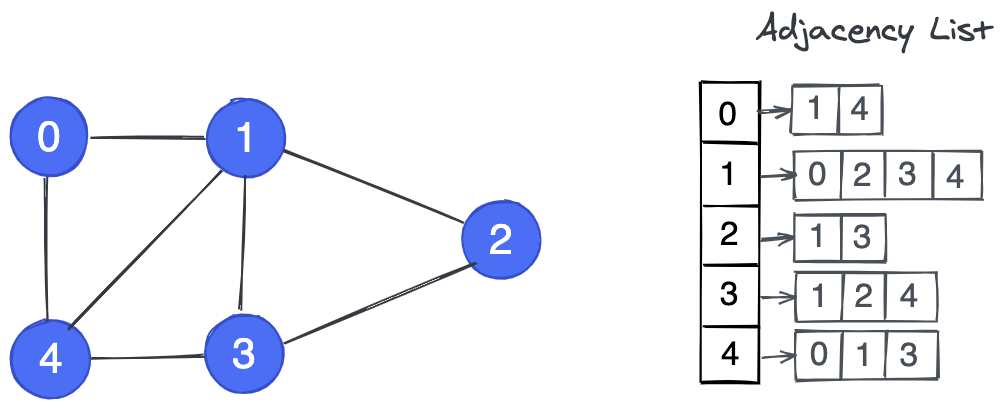

**Question: Create a class to represent a graph as an adjacency list in Python**


we have to create a list having 5 empty lists inside it

In [1]:
num_nodes = 5
edges = [(0, 1), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (3, 4)]

In [2]:
num_nodes = 5

##WRONG WAY TO DEFINE THE EMPTY LISTS INSIDE A LIST

l1 = []
l1 = [[]]*num_nodes

l1[0] += [0]

In [3]:
#RIGHT WAY
l1 = [[] for _ in range(num_nodes)]

In [4]:
l1

[[], [], [], [], []]

In [5]:
for n1, n2 in edges:
    print("n1 :",  n1, 'n2 :',  n2)

n1 : 0 n2 : 1
n1 : 0 n2 : 4
n1 : 1 n2 : 2
n1 : 1 n2 : 3
n1 : 1 n2 : 4
n1 : 2 n2 : 3
n1 : 3 n2 : 4


# Representing a graph in the form of a adjacency list

In [6]:
class Graph_list:
    def __init__(self, num_nodes, edges):
        self.num_nodes = num_nodes
        self.data = [[] for _ in range(num_nodes)]
        
        for n1, n2 in edges:
            #insert into the right lists
            self.data[n1].append(n2)
            self.data[n2].append(n1)
            
    def __repr__(self):
        return "\n".join(["{} : {}".format(n, neighbors) for n, neighbors in enumerate(self.data)])

    
    def __str__(self):
        return self.__repr__()

In [7]:
graph1 = Graph_list(num_nodes, edges)

In [8]:
graph1

0 : [1, 4]
1 : [0, 2, 3, 4]
2 : [1, 3]
3 : [1, 2, 4]
4 : [0, 1, 3]

In [9]:
for i, value in enumerate([5, 2, 5, 6, 7]):
    print(i, value)

0 5
1 2
2 5
3 6
4 7


In [10]:
for i, value in enumerate(graph1.data):
    print(i, value)

0 [1, 4]
1 [0, 2, 3, 4]
2 [1, 3]
3 [1, 2, 4]
4 [0, 1, 3]


In [11]:
["{} : {}".format(n, neighbors) for n, neighbors in enumerate(graph1.data)]

['0 : [1, 4]',
 '1 : [0, 2, 3, 4]',
 '2 : [1, 3]',
 '3 : [1, 2, 4]',
 '4 : [0, 1, 3]']

# Representing a graph in the form of a adjacency matrix

In [12]:
class Graph_matrix:
    
    def __init__(self, num_nodes, edges):
        self.num_nodes = num_nodes
        self.data = [[0 for _ in range(num_nodes)] for _ in range(num_nodes)]
        
        for n1, n2 in edges:
            self.data[n1][n2] = 1
            self.data[n2][n1] = 1

In [13]:
graph2 = Graph_matrix(num_nodes, edges)

In [14]:
graph2.data

[[0, 1, 0, 0, 1],
 [1, 0, 1, 1, 1],
 [0, 1, 0, 1, 0],
 [0, 1, 1, 0, 1],
 [1, 1, 0, 1, 0]]

# Breadth First Search on Graphs

## Graph Traversal


### Breadth-First Search

A real-world graph:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/MapGermanyGraph.svg/500px-MapGermanyGraph.svg.png)

Breadth-fist search tree (starting from Frankfurt):

![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/GermanyBFS.svg/500px-GermanyBFS.svg.png)

> **Question**: Implement breadth-first search given a source node in a graph using Python.


<img src="https://i.imgur.com/E2Up1Pk.png" width="400">

BFS pseudocode (Wikipedia):

```
 1  procedure BFS(G, root) is
 2      let Q be a queue
 3      label root as discovered
 4      Q.enqueue(root)
 5      while Q is not empty do
 6          v := Q.dequeue()
 7          if v is the goal then
 8              return v
 9          for all edges from v to w in G.adjacentEdges(v) do
10              if w is not labeled as discovered then
11                  label w as discovered
12                  Q.enqueue(w)
```


**Given a root node of a graph perform the BFS on it**

In [15]:
graph1

0 : [1, 4]
1 : [0, 2, 3, 4]
2 : [1, 3]
3 : [1, 2, 4]
4 : [0, 1, 3]

In [16]:
def Bfs(graph, root):
    queue = [root]
    discovered = [False]*len(graph.data)
    distance = [None]*len(graph.data)
    parent = [None]*len(graph.data)
    discovered[root] = True
    distance[root] = 0
    idx = 0
    
    while idx < len(queue):
        #deque operation using idx
        current = queue[idx]
        idx += 1
        
        #putting all the nodes connected to current 
        for node in graph.data[current]:
            if not discovered[node]:
                discovered[node] = True
                queue.append(node)
                parent[node] = current
                distance[node] = 1 + distance[current]
                
    return ("Queue : {}, Node_discovered : {}, Distance_from_root_node : {}, parent_node : {}".format(queue, discovered,  distance,  parent)) 

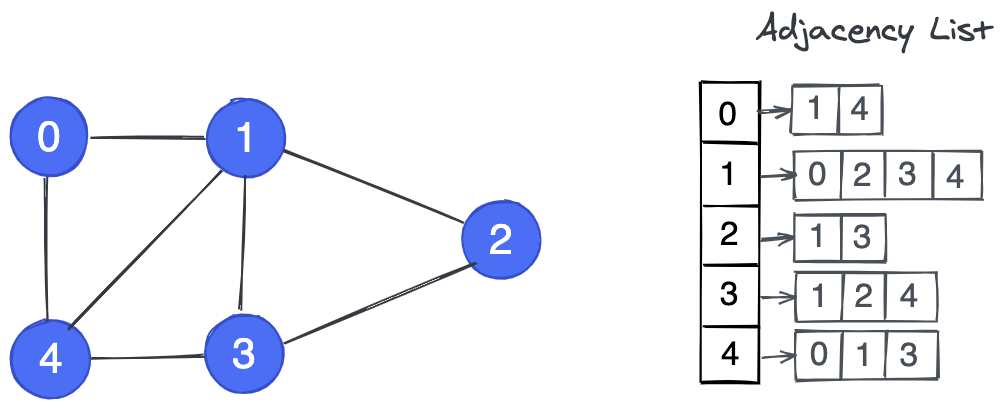

In [17]:
Bfs(graph1, 3)

'Queue : [3, 1, 2, 4, 0], Node_discovered : [True, True, True, True, True], Distance_from_root_node : [2, 1, 1, 0, 1], parent_node : [1, 3, 3, None, 3]'

**Q : Write a program to check if all the nodes in a graph are connected**

**Q : distance between two nodes of a graph**

**Q : Find the number of connected components in a graph**
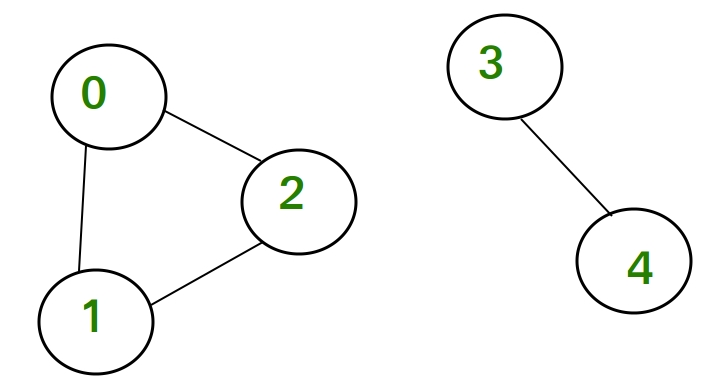

In [18]:
edges1 = [(0, 1), (0, 2), (1, 2), (3, 4)]
no_nodes = 5

In [19]:
graph2 = Graph_list(5, edges1)

In [20]:
graph2

0 : [1, 2]
1 : [0, 2]
2 : [0, 1]
3 : [4]
4 : [3]

In [21]:
# Write a program to check if all the nodes in a graph are connected

#ANS = after performing BFS if the length of output queue is less than the legth of nodes then all the nodes are not connected

Bfs(graph2, 0)

'Queue : [0, 1, 2], Node_discovered : [True, True, True, False, False], Distance_from_root_node : [0, 1, 1, None, None], parent_node : [None, 0, 0, None, None]'

In [22]:
# here we see that in this the nodes that are not part of this component are not discovered 
# the legth of queue is less than total number of nodes, hence we can say that all the nodes are not connected and there exists another component

In [23]:
def BFs(graph, root):
    
    queue = [root]
    discovered = [False]*len(graph.data)
    discovered[root] = True
    idx = 0
    
    while idx < len(queue):
        current = queue[idx]
        idx += 1
        
        for node in graph.data[current]:
            if not discovered[node]:
                discovered[node] = True
                queue.append(node)
    
    return queue


In [24]:
def BFs(graph, root):
    
    queue = [root]
    discovered = [False]*len(graph.data)
    discovered[root] = True
    idx = 0
    
    while idx < len(queue):
        current = queue[idx]
        idx += 1
        
        for node in graph.data[current]:
            if not discovered[node]:
                discovered[node] = True
                queue.append(node)
    
    return queue


def NoComponents(graph, list_nodes):
    ans = 0
    ll1 = list_nodes.copy()
    set1 = set()
    while len(ll1) > 0 :
        ans += 1
        root = ll1[0]
        bfs_list = BFs(graph, root)

        for items in bfs_list:
            set1.add(items)

        rest_arr = []
        for item in ll1:
            if item not in set1:
                rest_arr += [item]
        ll1[:] = rest_arr
    return ans

In [25]:
graph2

0 : [1, 2]
1 : [0, 2]
2 : [0, 1]
3 : [4]
4 : [3]

In [26]:
BFs(graph2, 0)

[0, 1, 2]

# Graph 3

In [27]:
num_nodes3 = 9
edges3 = [(0, 1), (0, 3), (1, 2), (2, 3), (4, 5), (4, 6), (5, 6), (7, 8)]

In [28]:
graph3 = Graph_list(num_nodes3, edges3)

In [29]:
graph3

0 : [1, 3]
1 : [0, 2]
2 : [1, 3]
3 : [0, 2]
4 : [5, 6]
5 : [4, 6]
6 : [4, 5]
7 : [8]
8 : [7]

In [30]:
list_nodes3 = [0, 1, 2, 3, 4, 5, 6, 7, 8]

**Q : Find whether all the nodes are connected in the graph 3**

In [31]:
res_nodes = BFs(graph3, list_nodes3[0])
res_nodes

[0, 1, 3, 2]

In [32]:
if len(res_nodes) < num_nodes3 :
    print("All the nodes of the graph are not connected and hence it is a disconnected graph")
elif len(res_nodes) == num_nodes3 :
    print("All the nodes of the graph are connected and hence it is a Connected graph")

All the nodes of the graph are not connected and hence it is a disconnected graph


**Q : Find total number of coponents in the graph 3**

In [33]:
ans = NoComponents(graph3, list_nodes3)
ans

3

# Depth First Search

## Depth-first search

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7f/Depth-First-Search.gif/440px-Depth-First-Search.gif)


> **Question**: Implement depth first search from a given node in a graph using Python.

<img src="https://i.imgur.com/E2Up1Pk.png" width="400">

DFS pseudocode (Wikipedia):

```
procedure DFS_iterative(G, v) is
    let S be a stack
    S.push(v)
    while S is not empty do
        v = S.pop()
        if v is not labeled as discovered then
            label v as discovered
            for all edges from v to w in G.adjacentEdges(v) do 
                S.push(w)
```



In [34]:
#Function to perform Depth first search
def DFs(graph, root):
    discovered = [False]*len(graph.data)
    stack = [root]
    ans = []
    while len(stack) > 0 :
        current = stack.pop()
        if not discovered[current]:
            discovered[current] = True
            ans += [current]
            
            for i in range(len(graph.data[current])-1, -1, -1):
                stack.append(graph.data[current][i])
            
    return ans

In [35]:
graph1.data = [[2, 3, 1], [0], [0, 4], [0], [2], []]

In [36]:
DFs(graph1, 0)

[0, 2, 4, 3, 1]

In [37]:
BFs(graph1, 0)

[0, 2, 3, 1, 4]

In [38]:
DFs(graph1, 0)

[0, 2, 4, 3, 1]

In [39]:
BFs(graph1, 0)

[0, 2, 3, 1, 4]

**Q : Write a function to detect cycles in a graph**

In [40]:
#Function to perform Depth first search

def CycleDetect(graph, root):
    discovered = [False]*len(graph.data)
    stack = [root]
    ans = []
    while len(stack) > 0 :
        current = stack.pop()
        if not discovered[current]:
            discovered[current] = True,
            ans += [current]
            for node in graph.data[current]:
                stack.append(node)
        elif discovered[current]:
            return "Yes"
    return 'No'

In [41]:
CycleDetect(graph1, 1)

'Yes'

In [42]:
graph3

0 : [1, 3]
1 : [0, 2]
2 : [1, 3]
3 : [0, 2]
4 : [5, 6]
5 : [4, 6]
6 : [4, 5]
7 : [8]
8 : [7]

In [43]:
CycleDetect(graph3, 3)

'Yes'

In [44]:
CycleDetect(graph2, 3)

'Yes'

In [45]:
graph2

0 : [1, 2]
1 : [0, 2]
2 : [0, 1]
3 : [4]
4 : [3]

# Weighted and Directed graphs

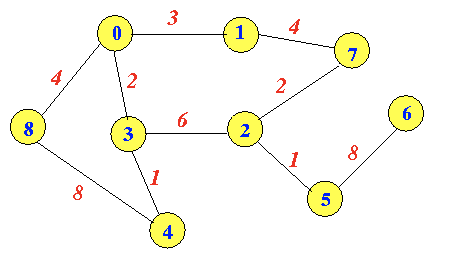

In [46]:
# Graph with weights
num_nodes5 = 9
edges5 = [(0, 1, 3), (0, 3, 2), (0, 8, 4), (1, 7, 4), (2, 7, 2), (2, 3, 6), 
          (2, 5, 1), (3, 4, 1), (4, 8, 8), (5, 6, 8)]
num_nodes5, len(edges5)

(9, 10)

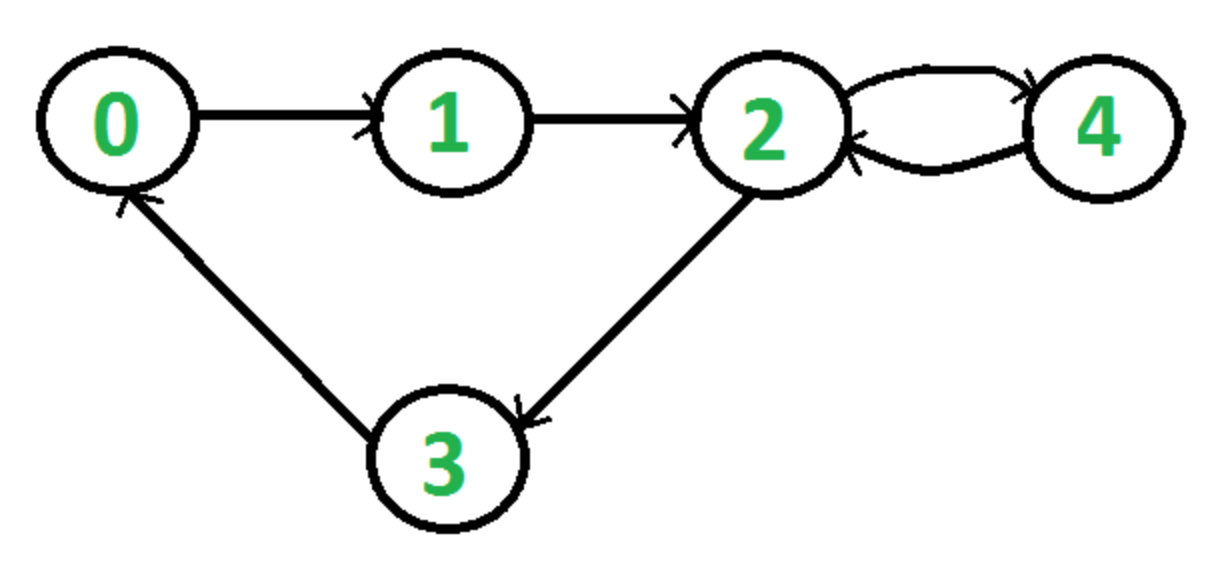

In [47]:
num_nodes6 = 5
edges6 = [(0, 1), (1, 2), (2, 3), (2, 4), (4, 2), (3, 0)]
directed6 = True
num_nodes6, len(edges6)

(5, 6)

**Q: Define a class to represent weighted and directed graphs in Python**

In [48]:
class DirectWeighted:
    
    def __init__(self, edges, num_nodes, directed = False, weighted = False):
        self.num_nodes = num_nodes
        self.directed = directed
        self.weighted = weighted
        self.data = [[] for _ in range(num_nodes)]
        self.weights = [[] for _ in range(num_nodes)]
        
        for edge in edges:
            if self.weighted:
                n1 = edge[0]
                n2 = edge[1]
                wt = edge[2]
                if self.directed:
                    self.data[n1] += [n2]
                    self.weights[n1] += [wt]
                else:
                    self.data[n1] += [n2]
                    self.data[n2] += [n1]
                    self.weights[n1] += [wt]
                    self.weights[n2] += [wt]
            else:
                n1 = edge[0]
                n2 = edge[1]
                if self.directed:
                    self.data[n1] += [n2]
                else:
                    self.data[n1] += [n2]
                    self.data[n2] += [n1]
    def __repr__(self):
        result = ""
        if self.weighted:
            for i, (nodes, weights) in enumerate(zip(self.data, self.weights)):
                result += "{} : {} \n".format(i, list(zip(nodes, weights)))
        else:
            for i, nodes in enumerate(self.data):
                result += "{}: {} \n".format(i, nodes)
        return result

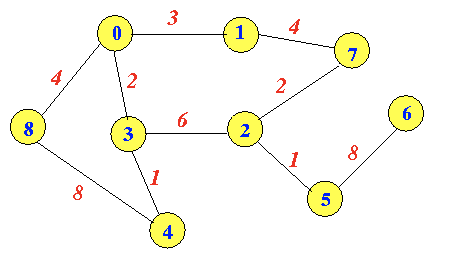

In [49]:
num_nodes5 = 9
edges5 = [(0, 1, 3), (0, 3, 2), (0, 8, 4), (1, 7, 4), (2, 7, 2), (2, 3, 6), 
          (2, 5, 1), (3, 4, 1), (4, 8, 8), (5, 6, 8)]

graph5 = DirectWeighted(edges5, num_nodes5, weighted = True)

graph5

0 : [(1, 3), (3, 2), (8, 4)] 
1 : [(0, 3), (7, 4)] 
2 : [(7, 2), (3, 6), (5, 1)] 
3 : [(0, 2), (2, 6), (4, 1)] 
4 : [(3, 1), (8, 8)] 
5 : [(2, 1), (6, 8)] 
6 : [(5, 8)] 
7 : [(1, 4), (2, 2)] 
8 : [(0, 4), (4, 8)] 

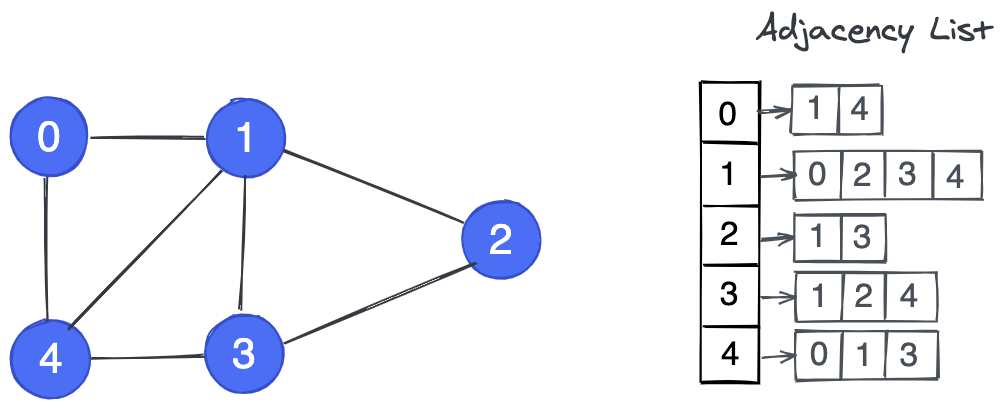

In [50]:
#Undirected and non-weighted graph
num_nodes = 5
edges = [(0, 1), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (3, 4)]

graph1 = DirectWeighted(edges, num_nodes)

graph1

0: [1, 4] 
1: [0, 2, 3, 4] 
2: [1, 3] 
3: [1, 2, 4] 
4: [0, 1, 3] 

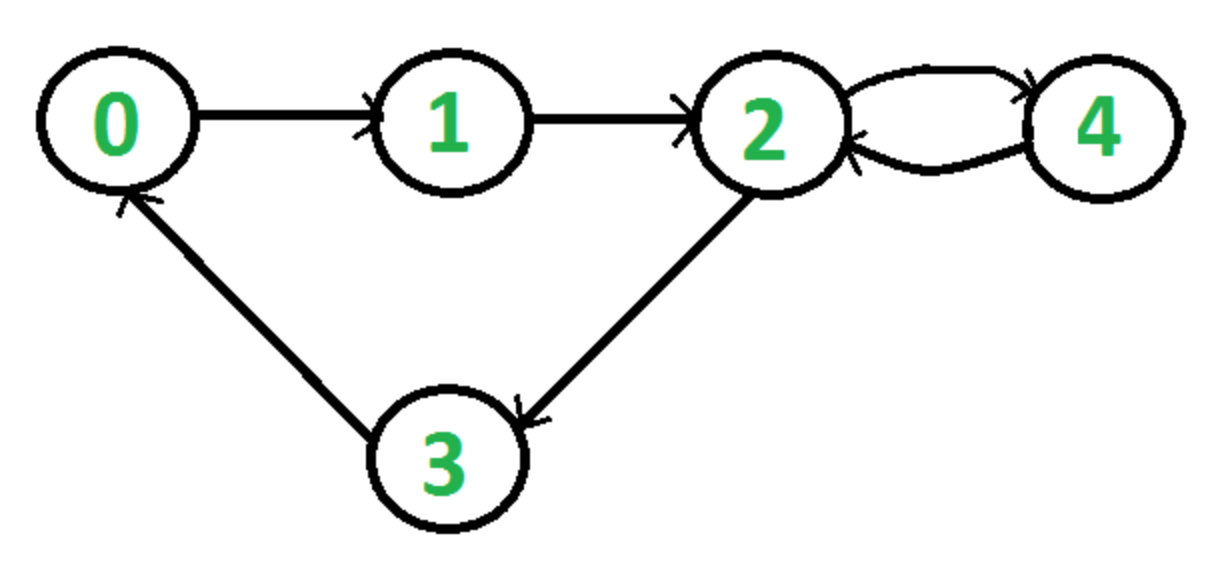

In [51]:
num_nodes6 = 5
edges6 = [(0, 1), (1, 2), (2, 3), (2, 4), (4, 2), (3, 0)]
directed6 = True
num_nodes6, len(edges6)
graph6 = DirectWeighted(edges6, num_nodes6, directed = True)

graph6

0: [1] 
1: [2] 
2: [3, 4] 
3: [0] 
4: [2] 

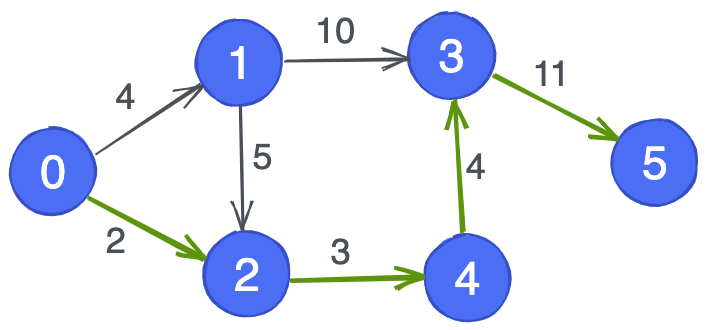

In [52]:
num_nodes7 = 6
edges7 = [(0, 1, 4), (0, 2, 2), (1, 2, 5), (1, 3, 10), (2, 4, 3), (4, 3, 4), (3, 5, 11)]
directed = True
weighted = True
graph7 = DirectWeighted(edges7, num_nodes7, weighted = True, directed = True)

graph7

0 : [(1, 4), (2, 2)] 
1 : [(2, 5), (3, 10)] 
2 : [(4, 3)] 
3 : [(5, 11)] 
4 : [(3, 4)] 
5 : [] 

**Q : Write a function to find the length of shortest path between two nodes in a weighted-directed graph**

## Shortest Paths


> **Question**: Write a function to find the length of the shortest path between two nodes in a weighted directed graph.

<img src="https://i.imgur.com/Zn5cUkO.png" width="480">


**Dijkstra's algorithm (Wikipedia)**:

![](https://upload.wikimedia.org/wikipedia/commons/5/57/Dijkstra_Animation.gif)

1. Mark all nodes unvisited. Create a set of all the unvisited nodes called the unvisited set.
2. Assign to every node a tentative distance value: set it to zero for our initial node and to infinity for all other nodes. Set the initial node as current.[16]
3. For the current node, consider all of its unvisited neighbours and calculate their tentative distances through the current node. Compare the newly calculated tentative distance to the current assigned value and assign the smaller one. For example, if the current node A is marked with a distance of 6, and the edge connecting it with a neighbour B has length 2, then the distance to B through A will be 6 + 2 = 8. If B was previously marked with a distance greater than 8 then change it to 8. Otherwise, the current value will be kept.
4. When we are done considering all of the unvisited neighbours of the current node, mark the current node as visited and remove it from the unvisited set. A visited node will never be checked again.
5. If the destination node has been marked visited (when planning a route between two specific nodes) or if the smallest tentative distance among the nodes in the unvisited set is infinity (when planning a complete traversal; occurs when there is no connection between the initial node and remaining unvisited nodes), then stop. The algorithm has finished.
6. Otherwise, select the unvisited node that is marked with the smallest tentative distance, set it as the new "current node", and go back to step 3.

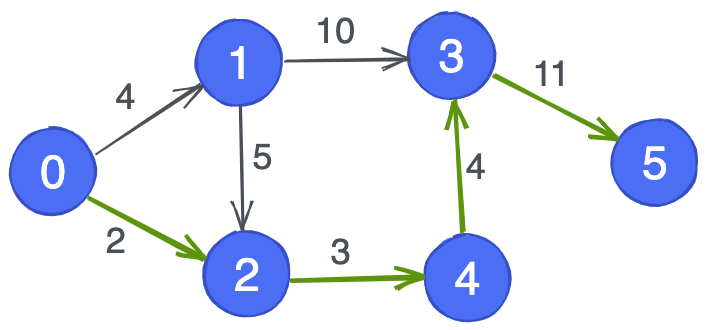

In [53]:
num_nodes7 = 6
edges7 = [(0, 1, 4), (0, 2, 2), (1, 2, 5), (1, 3, 10), (2, 4, 3), (4, 3, 4), (3, 5, 11)]
source = 0
target = 5

# Dijkstra'a Algorithm

**Finding length and the map of Shortest path using Dijkstra's algorithm**

In [54]:
def ShortestPath(graph, source, target):
    visited = [False]*len(graph.data)
    distance = [float('inf')]*len(graph.data)
    queue = [source]
    distance[source] = 0
    idx = 0
    
    while idx < len(queue) and not visited[target]:
        
        current = queue[idx]
        idx += 1
        visited[current] = True
        # update the neighbors distance 
        Update_distance(distance, graph, current)
        #find the first unvisited node with least optimal distance
        next_node = Pick_next_unvisited_node(distance, visited)
        
        if next_node:
            queue.append(next_node)
            
    return distance[target]

def Update_distance(distance, graph, current):
        neighbors = graph.data[current]
        weights = graph.weights[current]
        for i, neighbor in enumerate(neighbors):
            weight = weights[i]
            if distance[current] + weight < distance[neighbor]:
                distance[neighbor] = distance[current] + weight
                
def Pick_next_unvisited_node(distance, visited):
    min_dis = float('inf')
    min_node = None
    for node in range(len(distance)):
        if not visited[node] and distance[node] < min_dis :
            min_node = node
            min_dis = distance[node]
    return min_node

In [55]:
ShortestPath(graph7, 0, 3)

9

In [56]:
def shortest_path(graph, source, target):
    distance = [float('inf')]*len(graph.data)
    visited = [False]*len(graph.data)
    queue = [source]
    distance[source] = 0
    parent = [None]*len(graph.data)
    idx = 0
    
    while idx < len(queue):
        current = queue[idx]
        idx += 1
        visited[current] = True
        
        #updating the distance of nodes connected to current node 
        update_dist(graph, current, distance, parent)
        
        #pick the unvisited smalled distance node from source
        next_node = Pick_node(visited, distance)
        
        if next_node:
            queue.append(next_node)
            
    return distance[target], parent
    
def update_dist(graph, current, distance, parent):
    weights = graph.weights[current]
    neighbors = graph.data[current]
    
    for i, neighbor in enumerate(neighbors):
        weight = weights[i]
        if distance[current] + weight < distance[neighbor]:
            distance[neighbor] = distance[current] + weight
            if parent:
                parent[neighbor] = current


def Pick_node(visited, distance):
    min_dis = float('inf')
    min_node = None
    
    for node in range(len(distance)):
        if not visited[node] and distance[node] < min_dis:
            min_dis = distance[node]
            min_node = node
    
    return min_node

In [57]:
shortest_path(graph7, 0, 5)

(20, [None, 0, 0, 4, 2, 3])

# Binay Heaps

A heap in Python is a data structure based on a unique binary tree designed to efficiently access the smallest or largest element in a collection of items. It follows a complete binary tree's property and satisfies the heap property. Therefore, it is also known as a binary heap.

# Min Heaps and Max Heaps

**Properties of Binay Heaps:**
1. Every parent node can have atmost 2 children
2. Must be a complete tree, every level must be filled from left to right and every level must be full with the exception of last level not needing to be full
3. Min_Heap : Every parent key must be smaller than a children nodes
4. Max_heap : Every parent key must be greater than a children nodes

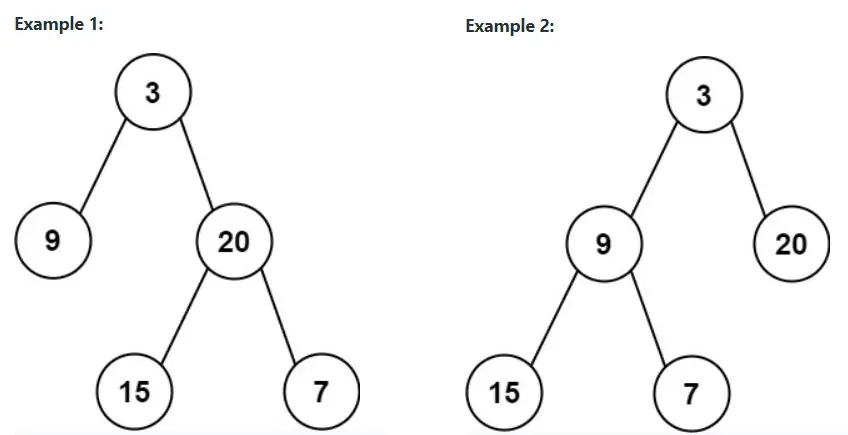
**Here**

**Example 1 is not a complete tree** as it has not been filled from left to right in level three but 

**Ex - 2 is a complete tree**(filled from left to right and have all the levels filled)



**Use of heap:**
Python uses the heap data structure as it is a highly efficient method of storing a collection of ordered elements. It is useful for keeping track of the largest and smallest elements in a collection, which is a common task in many algorithms and data structures. 

**Inserting data within the min heap :**

In [58]:

#HEAPIFY - adding elements and arranging at same time
#

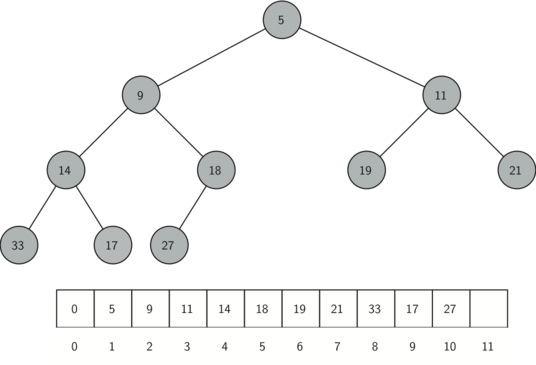

command : "import heapq"
1. heapify − This function converts a regular list to a heap. In the resulting heap the smallest element gets pushed to the index position 0. But rest of the data elements are not necessarily sorted.

2. heappush − This function adds an element to the heap without altering the current heap.

3. heappop − This function returns the smallest data element from the heap.

4. heapreplace − This function replaces the smallest data element with a new value supplied in the function.

# Building Max heap

https://favtutor.com/blogs/heap-in-python#:~:text=To%20create%20a%20heap%2C%20you,add%20elements%20to%20the%20heap.&text=According%20to%20Official%20Python%20Docs,as%20the%20priority%20queue%20algorithm.

In [59]:
def max_heapify(heap,  k):
    l = 2 * k + 1
    r = 2 * k + 2
    if l < len(heap) and heap[l] > heap[k]:
        largest = l
    else:
        largest = k
    if r < len(heap) and heap[r] > heap[largest]:
        largest = r
    if largest != k:
        heap[k], heap[largest] = heap[largest], heap[k]
        max_heapify(heap, largest)
    return heap

def build_max_heap(input_arr):
    n = int((len(input_arr)//2)-1)
    for k in range(n, -1, -1):
        input_arr = max_heapify(input_arr, k)
    return input_arr

In [60]:
A = [1, 4, 2, 6, 5, 11, 3]
heap1 = build_max_heap(A)
heap1

[11, 6, 3, 4, 5, 2, 1]

# Building Min heap

In [61]:
def HeapifyMin(arr, i):
    
    l = i*2 + 1
    r = l + 1
    
    if l < len(arr) and arr[l] < arr[i] :
        smallest = l
    else:
        smallest = i
    
    if r < len(arr) and arr[r] < arr[smallest]:
        smallest = r
    
    if smallest != i :
        arr[smallest], arr[i] = arr[i], arr[smallest]
        HeapifyMin(arr, smallest)
    return arr

def Build_min_heap(arr):
    n = int(len(arr)//2 - 1)
    
    for i in range(n, -1, -1):
        arr = HeapifyMin(arr, i)
        
    return arr

In [62]:
#Deleting root node from a heap --- so what we mostly do, is we take the first/root node out becoz it can only be the max/min node in a heap

def remove_ele(heap):
    n = len(heap)
    if  n == 1 :
        heap = []
    else:
        heap[0],  heap[n-1] = heap[n-1], heap[0]
        ele_removed = heap.pop()
    
    #if it was a min_heap - we will use min_heapify - as we just only need the root node
    if heap[0] > ele_removed :
        heap = HeapifyMin(heap, 0)
    #if it was a max_heap - we will use max_heapify - as we just only need the root node
    elif heap[0] <= ele_removed :
        heap = max_heapify(heap,  0)
    
    return heap, ele_removed

In [63]:
#Insertion of a node in a heap --- so what we mostly do, is we take the first/root node out becoz it can only be the max/min node in a heap



In [64]:
A = [1, 5, 2, 6, 4, 11, 3]
heap2 = Build_min_heap(A)
heap2

[1, 4, 2, 6, 5, 11, 3]

In [65]:
remove_ele(heap2)

([2, 4, 3, 6, 5, 11], 1)

In [66]:
remove_ele(heap1)

([6, 5, 3, 4, 1, 2], 11)

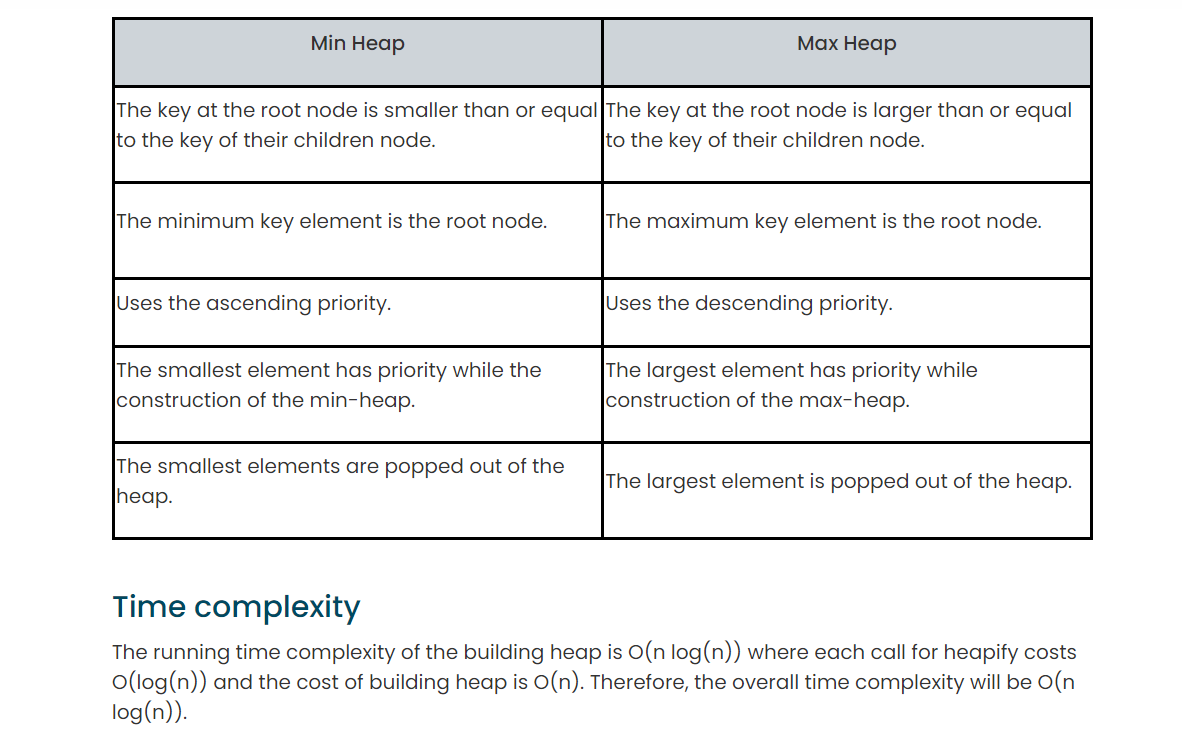

# ------------------Shortest Paths and Cycles in the Graphs----------------------

**Q : Implement the Dijkshtra shortest path algorithm using min heap  and max heap modules in python and what is the time complexiety of the algorithm ??**

In [67]:
def shortest_path_heap(graph, source, target):
    distance = [float('inf')]*len(graph.data)
    visited = [False]*len(graph.data)
    heap = [source]
    distance[source] = 0
    
    queue = [source]
    
    idx = 0
    
    while idx < len(queue) and not visited[target]:
        current = queue[idx]
        idx += 1
        visited[current] = True
        #updating the distance
        upd_dist(distance, current, graph)
        
        #picking the next node
        next_node = pick_next_node(distance, visited)
        
        if next_node:
            queue.append(next_node)
            
    return distance[target]
        
def upd_dist(distance, current, graph):
    neighbors = graph.data[current]
    weight = graph.weights[current]
    
    for i , neighbor in enumerate(neighbors):
        wt = weight[i]
        if distance[current] + wt < distance[neighbor]:
            distance[neighbor] = distance[current] + wt


def pick_next_node(distance, visited):
    min_node = None
    min_dist = float('inf')
    
    for node in range(len(distance)):
        if not visited[node] and distance[node] < min_dist :
            min_node = node
            min_dist = distance[node]
    
    return min_node

In [68]:
shortest_path_heap(graph7, 0, 5)

20

# Dijkstra's algorithm using binary heaps

In [69]:
import heapq
from collections import defaultdict

def dijkstra(graph, start, target):
    distances = {}  # Dictionary to store the shortest distances from the start node
    heap = [(0, start)]  # Priority queue to store nodes with their tentative distances
    heapq.heapify(heap)

    while heap:
        current_distance, current_node = heapq.heappop(heap)  # Get the node with the minimum distance
        if current_node in distances:  # Skip if the node has already been visited
            continue

        distances[current_node] = current_distance  # Update the shortest distance for the current node

        if current_node == target:  # Stop the algorithm if the end node is reached
            break
        neighbors = graph.data[current_node]
        weights = graph.weights[current_node]
        for i, neighbor in enumerate(neighbors):
            if neighbor not in distances:
                heapq.heappush(heap, (current_distance + weights[i], neighbor))  # Add neighbors to the heap

    if target in distances:
        return distances[target]  # Return the shortest distance to the end node
    
    else:
        return float('inf')  # Return infinity if there is no path from start to end

In [70]:
graph7

0 : [(1, 4), (2, 2)] 
1 : [(2, 5), (3, 10)] 
2 : [(4, 3)] 
3 : [(5, 11)] 
4 : [(3, 4)] 
5 : [] 

In [71]:
graph7.data

[[1, 2], [2, 3], [4], [5], [3], []]

In [72]:
graph7.weights

[[4, 2], [5, 10], [3], [11], [4], []]

In [73]:
shortest_distance = dijkstra(graph7, 0, 5)
shortest_distance 

20

**Q : Implement the Dijkshtra shortest path algorithm using min heap  and max heap modules in python and what is the time complexiety of the algorithm ??**

In [74]:
import heapq

def Shortest_path_heap(graph, source, target):
    distance = {}
    parents = {}
    heap = [(0, source)]
    heapq.heapify(heap)
    
    while heap:
        current_dist, current_node = heapq.heappop(heap)        
        distance[current_node] = current_dist
        
        if current_node == target:
            break             
        neighbors = graph.data[current_node]
        weights = graph.weights[current_node]
        
        for i, neighbor in enumerate(neighbors):
            
            if neighbor not in distance:
                heapq.heappush(heap, (current_dist + weights[i], neighbor))
                parents[neighbor] = current_node
    if target not in distance:
        return float('inf')
    
    # Reconstruct the shortest path
    path = []
    current = target
    while current != source:
        path.insert(0, current)
        current = parents[current]
    path.insert(0, source)

    return distance[target], path

In [75]:
 Shortest_path_heap(graph7, 1, 5)

(21, [1, 2, 4, 3, 5])

In [76]:
graph7

0 : [(1, 4), (2, 2)] 
1 : [(2, 5), (3, 10)] 
2 : [(4, 3)] 
3 : [(5, 11)] 
4 : [(3, 4)] 
5 : [] 

# Detection of cycle using BFS in a undirected graph

In [77]:
from collections import deque

def is_cyclic_bfs(graph):
    visited = set()     # Set to store visited nodes
    parent = {}         # Dictionary to store parent of each visited node

    for node in range(len(graph.data)):  # Iterate over all nodes in the graph
        if node not in visited:  # Check if node is unvisited
            if bfs(graph, node, visited, parent):  # Call BFS on unvisited node
                return True  # If a cycle is detected, return True

    return False  # No cycle detected, return False


def bfs(graph, start, visited, parent):
    queue = deque([(start, None)])  # Queue to store nodes to be processed

    while queue:  # Process nodes in the queue
        node, parent_node = queue.popleft()  # Dequeue a node from the queue
        visited.add(node)  # Mark the current node as visited
        parent[node] = parent_node  # Set the parent of current node

        for neighbor in graph.data[node]:  # Iterate over the neighbors of current node
            if neighbor not in visited:  # If the neighbor is unvisited
                queue.append((neighbor, node))  # Enqueue the neighbor along with its parent
            elif parent_node != neighbor:  # If the neighbor is visited but not the parent
                return True  # A cycle is detected, return True

    return False  # No cycle detected, return False

In [78]:
is_cyclic_bfs(graph7)

True

In [79]:
queue = deque([0, 1, 2, 4, 6])

In [80]:
queue1 = [0, 1, 2, 4, 6]
queue1.pop(0)

0

In [81]:
queue.pop()

6

In [82]:
queue.popleft()

0

# Detection of cycle using DFS in a undirected graph

In [83]:
def is_cyclic_dfs(graph):
    visited = set()
    parent = {}
    
    # it is to check cycle in multiple components of a graph
    for node in range(len(graph.data)):
        if node not in visited:
            if dfs(graph, node, visited, parent, None):
                return parent, True
    
    return parent, False, 


def dfs(graph, node, visited, parent, parent_node):
    visited.add(node)
    parent[node] = parent_node    

    for neighbor in graph.data[node]:
        if neighbor not in visited:
            if dfs(graph, neighbor, visited, parent, node):
                return True
        elif neighbor != parent_node:
            return True

    return False

In [84]:
is_cyclic_dfs(graph7)

({0: None, 1: 0, 2: 1, 4: 2, 3: 4, 5: 3}, True)

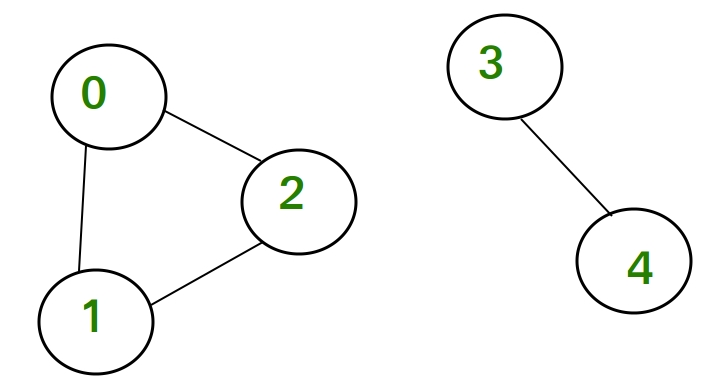

In [85]:
edges8 = [(0, 1), (0, 2), (1, 2), (3, 4)]
num_nodes8 = 5

In [86]:
graph8 = DirectWeighted(edges8, num_nodes8)

In [87]:
graph8

0: [1, 2] 
1: [0, 2] 
2: [0, 1] 
3: [4] 
4: [3] 

In [88]:
is_cyclic_bfs(graph8)

True

In [89]:
edges9 = [(0, 0), (1, 2), (2, 3)]
num_nodes9 = 4

In [90]:
graph9 = DirectWeighted(edges9, num_nodes9)

In [91]:
graph9

0: [0, 0] 
1: [2] 
2: [1, 3] 
3: [2] 

In [92]:
graph9.data = [[], [2], [1, 3], [2]]

In [93]:
is_cyclic_bfs(graph9)

False

In [94]:
graph9

0: [] 
1: [2] 
2: [1, 3] 
3: [2] 

# Detecting cycle in a directed graph

In [95]:
## Using DFS

def is_cyclic(graph):
    visited = set()
    recursion_stack = set() # it keep track of nodes encountered in current DFS path

    for node in range(len(graph.data)):
        if node not in visited:
            if dfs(node, visited, recursion_stack, graph):
                return True

    return False


def dfs(node, visited, recursion_stack, graph):
    visited.add(node)
    recursion_stack.add(node)

    for neighbor in graph.data[node]:
        if neighbor not in visited:
            if dfs(neighbor, visited, recursion_stack, graph):
                return True
        elif neighbor in recursion_stack:
            return True

    recursion_stack.remove(node)
    return False


In [96]:
### using BSF

from collections import deque

class Solution:
    def isCyclic(self, V, adj):
        # Initialize an array to track in-degrees of nodes
        in_degree = [0] * V
        
        # Calculate in-degrees of all nodes by iterating through the adjacency list
        for i in range(V):
            for j in adj[i]:
                in_degree[j] += 1

        # Create a queue for topological sorting
        queue = deque()
        
        # Enqueue nodes with in-degree 0, indicating they have no dependencies
        for i in range(V):
            if in_degree[i] == 0:
                queue.append(i)

        cnt = 0  # Initialize a count to track processed nodes

        # Process nodes in a topological order
        while queue:
            node = queue.popleft()
            cnt += 1

            # Iterate through neighbors of the processed node
            for neighbor in adj[node]:
                in_degree[neighbor] -= 1
                
                # If the in-degree of a neighbor becomes 0, enqueue it
                if in_degree[neighbor] == 0:
                    queue.append(neighbor)

        # If the count of processed nodes is equal to the number of nodes (V),
        # there is no cycle, so return False. Otherwise, return True.
        return cnt != V


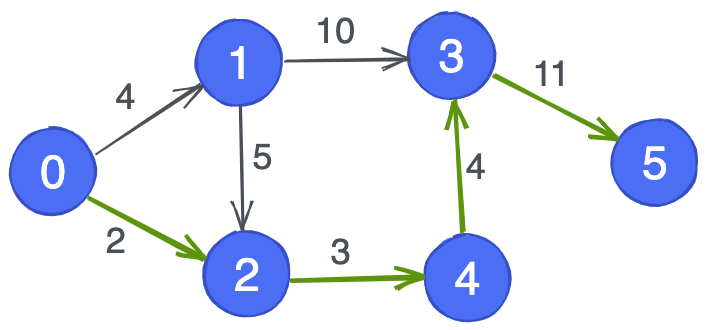

In [97]:
graph7

0 : [(1, 4), (2, 2)] 
1 : [(2, 5), (3, 10)] 
2 : [(4, 3)] 
3 : [(5, 11)] 
4 : [(3, 4)] 
5 : [] 

In [98]:
graph7 = DirectWeighted(edges7, num_nodes7, directed = True, weighted = True)

In [99]:
is_cyclic(graph7)

False

In [100]:
graph7

0 : [(1, 4), (2, 2)] 
1 : [(2, 5), (3, 10)] 
2 : [(4, 3)] 
3 : [(5, 11)] 
4 : [(3, 4)] 
5 : [] 

# Bellman Ford Algorithm in graph
**It helps to detect the negative cycle in a graph and also find the shortest paths from a source to all vertices in the given graph. The graph may contain negative weight edges. The graph can be directed or non-directed but it should be weighted**

1. This step initializes distances from the source to all vertices as infinite and distance to the source itself as 0. Create an array dist[] of size |V| with all values as infinite except dist[src] where src is source vertex.
2. This step calculates shortest distances. Do following |V|-1 times where |V| is the number of vertices in given graph. Do following for each edge u-v 
3. If dist[v] > dist[u] + weight of edge uv, then update dist[v] to
dist[v] = dist[u] + weight of edge uv
4. This step reports if there is a negative weight cycle in the graph. Again traverse every edge and do following for each edge u-v 
……If dist[v] > dist[u] + weight of edge uv, then “Graph contains negative weight cycle” 
5. The idea of step 3 is, step 2 guarantees the shortest distances if the graph doesn’t contain a negative weight cycle. If we iterate through all edges one more time and get a shorter path for any vertex, then there is a negative weight cycle




**Detailed explanation stepwise**

Step 1: Initialize the distance and predecessor arrays.
- Create an array `distance` of size n, where n is the number of vertices in the graph. Initialize the distance of the source vertex to 0 and set the distance of all other vertices to infinity. Create another array `predecessor` of size n to keep track of the shortest path tree.

Step 2: Relax edges repeatedly.
- Repeat the relaxation process n-1 times, where n is the number of vertices in the graph. In each iteration, iterate over all edges in the graph and relax them.

Step 3: Relax an edge.
- For each edge (u, v) with weight w in the graph, check if the distance to vertex u plus the weight of the edge is less than the current distance to vertex v. If it is, update the distance of vertex v to be the sum of the distance to vertex u and the weight of the edge, and set the predecessor of vertex v to vertex u.

Step 4: Check for negative weight cycles (optional).
- After the n-1 iterations in step 2, you can optionally check for the presence of negative weight cycles. Repeat the relaxation process once more, and if any distances get updated, it indicates the presence of a negative weight cycle in the graph.

Step 5: Output the shortest paths.
- The `distance` array obtained after the iterations holds the shortest distances from the source vertex to all other vertices. To obtain the shortest path from the source vertex to any other vertex, you can follow the `predecessor` array backwards from the destination vertex to the source vertex.

The Bellman-Ford algorithm calculates the shortest paths from a single source vertex to all other vertices in a graph. It can handle graphs with both positive and negative edge weights but is mainly used when there are negative edge weights or the possibility of negative weight cycles.

By iteratively relaxing the edges and updating the distances, the algorithm gradually improves the estimates of the shortest paths until it reaches the optimal solution. The number of iterations required is determined by the longest possible path in the graph, which is n-1, where n is the number of vertices.

Note that the presence of a negative weight cycle can cause the algorithm to run indefinitely. Hence, the optional step 4 is included to check for negative weight cycles after the n-1 iterations.


![](https://upload.wikimedia.org/wikipedia/commons/7/77/Bellman%E2%80%93Ford_algorithm_example.gif)

**Bellman Ford detects whether there is a cycle present in the graph having negative sum of cycle edges involved(weights of edges)**

**Pseudo Code**

def BellmanFord(graph, source):
      
    for item in range(len(graph.data)):
        distances[item] = 0 #// Distance from source to source is 0
    
        for each vertex v in graph:
            if v ≠ source:
                distances[v] = infinity  #// Set initial distance to all other vertices as infinity

        # Relax edges repeatedly
        for i from 1 to |V| - 1:   # |V| is the number of vertices in the graph
            for each edge (u, v) with weight w in graph:
                if distances[u] + w < distances[v]:
                    distances[v] = distances[u] + w   #// Update distance if shorter path found

        #// Check for negative weight cycles
        for each edge (u, v) with weight w in graph:
            if distances[u] + w < distances[v]:
                return "Graph contains a negative weight cycle"
    
    return distances  # // Return the distances from the source to all other vertices


In [101]:
def isNegativeWeightCycle(n, edges):
    #Code here
    ans = 0
    for root in range(n):
        ans = max(ans, BellmanFord(n, edges, root))
        if ans == 1 :
            break

    return ans

def BellmanFord(n, edges, root):
    distance = [float('inf')]*n  # n is total number of nodes
    distance[root] = 0   #// Distance from source to source is 0

    # Relax edges repeatedly
    for i in range(n-1):   # |V| is the number of vertices in the graph
        for u, v, w in edges:   # this step is running for V times and updating the nrighbors of the finite distance node if required
            if distance[u] + w < distance[v]:
                distance[v] = distance[u] + w   #// Update distance if shorter path found

    #// Check for negative weight cycles
    for u, v, w in edges:
        if distance[u] + w < distance[v]:
            return 1  #negative weight cycle in present

    return 0  # // negative weight cycle is not present

# Floyd Warshell Algorithm to find a negative weighted cycle in a graph
**NOTE** - Works for directed, undirected and weighted graphs

**The all pair shortest path algorithm is also known as Floyd-Warshall algorithm is used to find all pair shortest path problem from a given weighted graph.**


Step 1: Initialize the distance matrix.
- Create a 2D distance matrix of size n x n, where n is the number of vertices in the graph. Initialize all distances to infinity, except for the diagonal elements, which are set to zero. The distance matrix will represent the shortest distances between pairs of vertices in the graph.

Step 2: Initialize the matrix with direct edge weights.
- For each edge (u, v) with weight w in the graph, update the corresponding entry in the distance matrix as dist[u][v] = w. This step ensures that the distance matrix reflects the direct edge weights in the graph.

Step 3: Update the distance matrix iteratively.
- For each vertex k from 0 to n-1, consider it as an intermediate vertex in the path between all pairs of vertices (i, j). Then, for each pair of vertices (i, j), check if the path from i to j through vertex k has a shorter distance than the current distance stored in the distance matrix. If so, update the distance matrix entry as dist[i][j] = dist[i][k] + dist[k][j].

Step 4: Check for negative weight cycles (optional).
- After the iterative updates in step 3, you can optionally check for the presence of negative weight cycles. Iterate over the diagonal elements of the distance matrix (dist[i][i]) and if any of them are negative, it indicates the presence of a negative weight cycle in the graph.

Step 5: Output the distance matrix.
- After the iterations in step 3 are complete, the distance matrix will contain the shortest distances between all pairs of vertices in the graph. Each entry dist[i][j] represents the shortest distance from vertex i to vertex j.

The Floyd-Warshall algorithm computes the shortest distances between all pairs of vertices in a graph. It works by iteratively updating the distance matrix, considering each vertex as an intermediate vertex in the path between pairs of vertices. By the end of the algorithm, the distance matrix holds the shortest distances, and it can be used to find the shortest paths between any two vertices in the graph.

Note that the Floyd-Warshall algorithm can handle both positive and negative edge weights, but it does not handle negative weight cycles. The presence of negative weight cycles can lead to incorrect results in the distance matrix, which is why the optional step 4 is included to check for negative weight cycles.


**Pseudo Code**

function FloydWarshall(graph):

    n = number of vertices in the graph
    dist = 2D array of size n x n, initialized with infinity
    
    // Initialize the distance matrix with the direct edge weights
    for each edge (u, v) with weight w in graph:
        dist[u][v] = w
    
    // Update the distance matrix
    for k from 0 to n-1:
        for i from 0 to n-1:
            for j from 0 to n-1:
                if dist[i][k] + dist[k][j] < dist[i][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
    
    // Check for negative weighted cycles
    for i from 0 to n-1:
        if dist[i][i] < 0:
            return true  // Graph has a negative weighted cycle
    
    return false  // Graph does not have a negative weighted cycle


In [102]:
##The all pair shortest path algorithm is also known as Floyd-Warshall algorithm is used to find all pair shortest path problem from a given weighted graph.
def floydWarshell(n, edges):
    
    distance = [[float('inf') for _ in range(n)] for _ in range(n)]
    
    for u, v, w in edges:
        
        distance[u][v] = w
    
    for k in range(n):
        
        for i in range(n):
            
            for j in range(n):
                
                if distance[i][k] + distance[k][j] < distance[i][j]:
                    distance[i][j] =  distance[i][k] + distance[k][j]
                    
    for i in range(n):
        if distance[i][i] < 0 :
            return 1
    
    return 0

In [103]:
def isNegativeWeightCycle(self, n, edges):

    distance = [[float('inf') for _ in range(n)] for _ in range(n)]

    for u, v , w in edges :
        distance[u][v] = w


    for k in range(n):

        for i in range(n):

            for j in range(n):

                if distance[i][k] + distance[k][j] < distance[i][j] :
                    distance[i][j] = distance[i][k] + distance[k][j]


    for i in range(n):
        if distance[i][i] < 0 :
            return 1          #yes there is a negative weighted cycle present in the graph
    return 0                  #no there is not any negative weighted cycle present in the graph

# Johnson’s algorithm for All-pairs shortest paths of a graph



Step 1: Add a new vertex and connect it to all existing vertices with zero-weight edges.
   - In this step, a new vertex is added to the graph, and zero-weight edges are created to connect the new vertex to all existing vertices. This is done to avoid negative weight cycles during the subsequent steps of the algorithm.

Step 2: Run the Bellman-Ford algorithm from the newly added vertex.
   - The Bellman-Ford algorithm is applied to find the shortest distances from the newly added vertex to all other vertices in the graph. This step helps detect any negative weight cycles in the graph. The resulting distances are stored in the `dist` array.

Step 3: Update edge weights in the original graph based on the distances obtained from the Bellman-Ford algorithm.
   - In this step, the edge weights in the original graph are updated based on the distances computed by the Bellman-Ford algorithm. The updated edge weights ensure that all edge weights in the graph are non-negative.

Step 4: Initialize a shortest paths matrix.
   - A `shortest_paths` matrix is created as a 2D array of size n x n, where n is the number of vertices in the graph. This matrix will store the shortest paths between all pairs of vertices.

Step 5: Run Dijkstra's algorithm from each vertex to find the shortest paths.
   - For each vertex in the updated graph, Dijkstra's algorithm is applied to find the shortest paths from that vertex to all other vertices. The resulting shortest paths are stored in the `shortest_paths` matrix.

Finally, the algorithm returns the `shortest_paths` matrix, which contains the shortest paths between all pairs of vertices in the original graph.

Johnson's algorithm is designed to handle graphs with both positive and negative edge weights, including those with negative weight cycles. By adding a new vertex and running the Bellman-Ford algorithm, it transforms the original graph into a modified graph with non-negative edge weights. Then, it applies Dijkstra's algorithm from each vertex to find the shortest paths.

This algorithm is commonly used to solve the All-Pairs Shortest Path problem efficiently, even in the presence of negative edge weights or negative weight cycles.

function Johnson(graph):
    
    n = number of vertices in the graph
    
    // Step 1: Add a new vertex and connect it to all existing vertices with zero-weight edges
        
    graph = addNewVertex(graph)
    
    // Step 2: Run Bellman-Ford algorithm from the newly added vertex
        
    dist = BellmanFord(graph)
    
    // Step 3: Update edge weights in the original graph
        
    updated_graph = updateEdgeWeights(graph, dist)
    
    // Step 4: Initialize shortest paths matrix
        
    shortest_paths = 2D array of size n x n, initialized with infinity
    
    // Step 5: Run Dijkstra's algorithm from each vertex to find shortest paths
        
    for each vertex v in graph:
        
        shortest_paths[v] = Dijkstra(updated_graph, v)
    
    return shortest_paths


In [104]:
#Johnson's algorithm while we use bellman algorithm

In [105]:
def Johnsons(graph):
    
    #adding a new vertex and connecting to all other veteces with weight zero
    node = len(graph.data) #new-node based on zero indexing of nodes
    new_graph = add_vertex(graph, node)
    distance = [float('inf')]*len(new_graph.data)
    
    
    distance = bellman_ford(new_graph, distance)
    
    #method to check whether the negative weight cycle is present in the grpah or not
    
    
    #removing the added vertex and restoring the original graph
    graph = remove_vertex(graph, vertex)
    
    #initializing the shortest path matrix and finding shortest path for the nodes 
    shortest_paths = [[]]
    
    
    for v in graph:
        distances = Dijkstra(graph, v)
        shortest_paths[v] = distances
    
    
    return shortest_paths
    
    
    

    
def add_vertex(graph, node):
    
    return graph

def remove_vetex(graph, vertex):
    
    return graph

    
def bellman_ford(graph, distance):
    
    return distance
    
    
def Dijkstra(graph, node):
    
    return distance

#Johnson's algorithm while we use Floyd warshell algorithm

function Johnson(graph):

    n = number of vertices in the graph
    
    // Step 1: Add a new vertex and connect it to all existing vertices with zero-weight edges
    updated_graph = addNewVertex(graph)
    
    // Step 2: Run Floyd-Warshall algorithm to compute all-pairs shortest paths
    shortest_paths = FloydWarshall(updated_graph)
    
    // Step 3: Check for negative weight cycles
    if negativeWeightCycleExists(shortest_paths):
        return "Negative weight cycle detected. Johnson's algorithm cannot be applied."
    
    // Step 4: Remove the added vertex and restore the original graph
    graph = removeAddedVertex(updated_graph)
    
    return shortest_paths


# Disjoint Sets

In [106]:
# Union by rank and path compression O(4)

time complexity of the Union by Rank and Path Compression techniques used in the Union-Find (Disjoint Set) data structure.

1. Union by Rank:
   - The Union by Rank technique aims to optimize the Union operation in the Union-Find data structure. It ensures that the shorter tree is always attached to the root of the taller tree during the Union operation.
   - The time complexity of the Union operation with Union by Rank is O(log n), where n is the number of elements or nodes in the disjoint set.
   - The rank of a tree represents an upper bound on its height. By always attaching the shorter tree to the root of the taller tree, the overall height of the trees is limited, leading to efficient Union operations.

2. Path Compression:
   - Path Compression is a technique used to optimize the Find operation in the Union-Find data structure. It compresses the paths from each node to its root, making future Find operations faster by reducing the height of the tree.
   - The time complexity of the Find operation with Path Compression is nearly constant or amortized O(α(n)), where α(n) is the inverse Ackermann function. It grows very slowly and is considered almost constant for practical purposes.
   - The Path Compression technique ensures that subsequent Find operations on the same set of elements have significantly improved time complexity, as the paths are compressed to make the tree more balanced.

Combining Union by Rank and Path Compression techniques provides an efficient implementation of the Union-Find data structure. The overall time complexity for a sequence of M Union and Find operations on a disjoint set of N elements is nearly O(Mα(N)), where α(N) is the inverse Ackermann function.

Both Union by Rank and Path Compression techniques help optimize the Union-Find data structure, ensuring efficient operations and improved time complexity bounds.

**Method to follow to work on the disjoint set**

1. we create a parent array/given_array, then we assign every node as the parent of itself.
2. Then we also maintain an rank array where in the beginning the ranks for all nodes is set to zero.


3. Now we will be given two nodes (u, v) to perform union on u and v -- union means we have to attach component having u and component having v - both components.
4. So now we will check their ranks and parent elements(parent[u], parent[v], rank[u], rank[v])

5. So, we look and find the parent for both u, v and when we get the original parent of them such that the parent node is the parent of itself 
then we will start attaching and if the rank[u] = rank[v],
then we can attact the original_parent[u] to the original_parent[v] and we will increase rank of v by one

5. if rank[u] > rank[v], then we will have to attact the original_parent[v] to the original_parent[u], 
    we don't make any changes in the ranks here as they are different

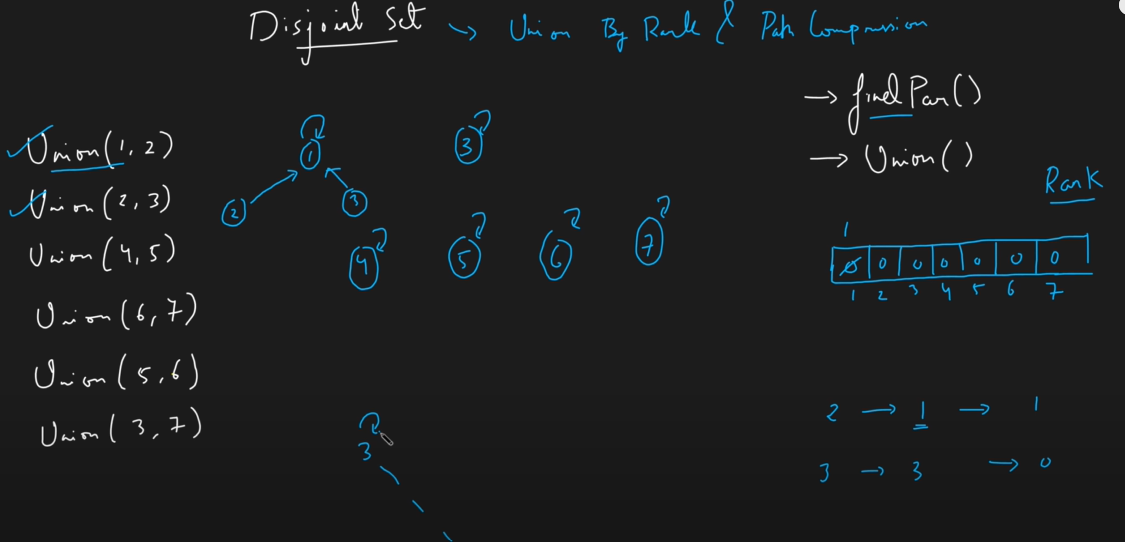

In [107]:
#if given nodes are nodes are starting from 1 based indexing or 1
n = 7 #assuming total number of nodes are seven(7)
parent = [_+1 for _ in range(n)]
rank = [0 for _ in range(n)]

def find_parent(parent, node):
    
    if parent[node] == node: 
        return node
    
    else: 
        parent[node] = find_parent(parent, parent[node]) #here we are directly attaching the sub_nodes to the root node and compressing path

def union(node1, node2, rank, parent):
    
    par1 = find_parent(parent, node1)
    par2 = find_parent(parent, node2)
    
    r1 = rank[par1]
    r2 = rank[par2]
    
    if r1 == r2 :
        parent[node1] = node2
        rank[node2] += 1
    else:
        # add the parent node of one node to the parent node of other which is having a larger rank
        if r1 > r2 :
            parent[node2] = node1
        else:
            parent[node1] = node2
    

**Q :**
Given an array A[] that stores all number from 1 to N (both inclusive and sorted) and K queries.

The task is to do the following operations on array elements :

1. UNION X Z : Perform union of X and Z i.e. parent of Z will become the parent of X.
2. FIND X: Find the parent of X and print it.

**Detecting cycle in a undirected graph using DSU**

In [108]:
class Solution:

    #Function to detect cycle using DSU in an undirected graph.
    def detectCycle(self, V, adj):

        parent = [i for i in range(V)] 

        for n1 in range(V):
            for n2 in adj[n1]:
                n1 = self.find_parent(parent, n1)
                n2 = self.find_parent(parent, n2)

                if n1 == n2 :
                     return 1
                    
                else:
                    self.dsu_union(parent, n1, n2)
        return 0


    def find_parent(self, parent, node):

        if parent[node] == node :
            return node

        else:

            return self.find_parent(parent, parent[node])


    def dsu_union(self, parent, node1, node2):

        par1 = self.find_parent(parent, node1)

        par2 = self.find_parent(parent, node2)

        parent[par1] = par2

# Dial’s Algorithm (Optimized Dijkstra for small range weights)

**APPLICABLE to Directed and undirected graphs**

The algorithm performs the following steps:

1. Initialize the distance array and dials array with appropriate sizes and initial values. Create a priority_queue to store vertices based on their distances.

2. Set the distance of the source vertex to 0 and insert it into the priority queue.

3. While the priority queue is not empty, perform the following steps:

   3.1 Extract the vertex with the minimum distance from the priority queue and assign it to current_vertex.
   
   3.2 For each outgoing edge from current_vertex to neighbor in the graph, calculate the new distance by adding the weight of 
   the edge to distance[current_vertex]. If the new distance is smaller than the current distance of neighbor, update 
   distance[neighbor]. If neighbor has a dial value of 0, insert it into the priority queue. If neighbor has a non-zero dial 
   value, increment its dial value.
4. Perform the following steps to process vertices with non-zero dial values:

    While the priority queue is not empty, extract the vertex with the minimum distance and assign it to current_vertex.
    If current_vertex has a dial value of 0, perform the relaxation step for its outgoing edges. Calculate the new distance and 
    update it if a shorter path is found. If the destination vertex (neighbor) has a dial value of 0, insert it into the 
    priority queue. If neighbor has a non-zero dial value, increment its dial value.
5. Return the distance array, which contains the shortest distances from the source vertex to each vertex in the graph.

**Explanation of the above pseudocode**

**Step-1**
1. The DIALS function takes a graph and source vertex as input and returns the distance array.
2. The variable n is initialized to the number of vertices in the graph.
3. distance is an array of size n used to store the shortest distances from the source to each vertex. It is initially set to infinity.
4. dials is an array of size n used to keep track of the number of dials for each vertex. It is initially set to 0.
5. priority_queue_set1 and priority_queue_set2 are min-heap data structures used as priority queues to process vertices in sets 1 and 2.
6. The distance from the source to itself is set to 0, and the source vertex is inserted into priority_queue_set1 with a priority of 0.

**Step-2**

    
**Step-3**



The algorithm continues to process vertices until both priority_queue_set1 and priority_queue_set2 are empty, and finally returns the distance array containing the shortest distances from the source vertex to all other vertices in the graph.

In [109]:
def dials_shortest_paths(graph, source):
    
    INF = float('inf')
    
    n = len(graph.data) # no of verteces
    
    W = -9999999
    
    for node1 in range(n):
        for wt in graph.weights[node1]: 
            W = max(wt, W)
    
    distance = [[INF, None] for _ in range(n)] #distance matrix [distance_from_source, placeholder]
    distance[source][0] = 0  #distance of the source node from source
    
    #Defining a bucket to trace the nodes presrent at a particular distance
    bucket = [[] for _ in range(W*n + 1)]
    bucket[0].append(source)
    idx = 0 #iterator to iterate through different buckets
    
    while True:
        
        while  idx < W*n  and len(bucket[idx]) == 0:
            idx += 1
        
        if idx == W*n :
            break
        
        node1 = bucket[idx][0] #checking on firt filled bucket and accessing the first element of it
        bucket[idx].pop(0)
        
        weights = graph.weights[node1]
        neighbors = graph.data[node1]
        
        for i, node2 in enumerate(neighbors):
            
            wt = weights[i]
            dist1 = distance[node1][0]
            dist2 = distance[node2][0]
            
            if dist2 > dist1 + wt :
                
                if dist2 != INF:
                    bucket[dist2].remove(node2)
                
                distance[node2][0] = dist1 + wt
                dist2 = dist1 + wt
                
                bucket[dist2].append(node2)
                
                distance[node2][1] = len(bucket[dist2]) - 1
                
    return distance 

**The pop() function removes the last element or the element based on the index given. remove() function removes the first occurrence of the specified element.**

In [110]:
graph7

0 : [(1, 4), (2, 2)] 
1 : [(2, 5), (3, 10)] 
2 : [(4, 3)] 
3 : [(5, 11)] 
4 : [(3, 4)] 
5 : [] 

In [111]:
dials_shortest_paths(graph7, 0)

[[0, None], [4, 0], [2, 0], [9, 0], [5, 0], [20, 0]]

**ADVANTAGES AND DISADVANTAGES**
**Advantages:**

1. Dial’s algorithm can be much faster than Dijkstra’s algorithm for graphs with small range weights.
2. It has a time complexity of O(n*max_wt), where n is the number of nodes and m is the number of edges.
3. It is easy to implement and modify from Dijkstra’s algorithm.

**Disadvantages:**

1. Dial’s algorithm is only applicable when the range of the edge weights is small. For graphs with large range weights, Dijkstra’s algorithm may be faster.
2. The space complexity of Dial’s algorithm is O(nW), where W is the range of the edge weights. This can be a significant drawback for large values of W.

# Multistage Graphs(Directed Acyclic Graphs)

- Multistage graphs are directed acyclic graphs (DAGs) organized into multiple stages or layers.
- Vertices represent tasks, events, or decision points within each stage.
- Edges indicate the flow or transition between stages, representing dependencies or order of execution between tasks.
- Multistage graphs are used to model problems involving sequential decision-making, optimization, and dependency management.
- They find applications in project management, production planning, scheduling, resource allocation, network optimization, and dynamic programming.
- Edge weights can be incorporated to represent factors such as costs, durations, or probabilities associated with stage transitions.
- Multistage graphs can be solved using algorithms like topological sorting, dynamic programming, shortest path algorithms (e.g., Dijkstra's algorithm), and network flow algorithms (e.g., Ford-Fulkerson algorithm).
- Multistage graphs provide a powerful modeling framework for analyzing and solving complex problems involving sequential processes and optimization across multiple stages or layers.

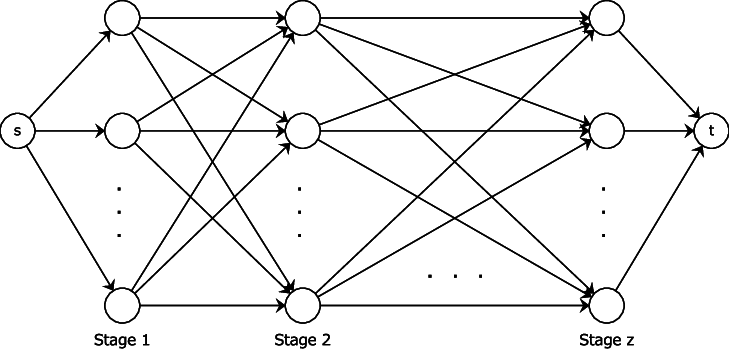 
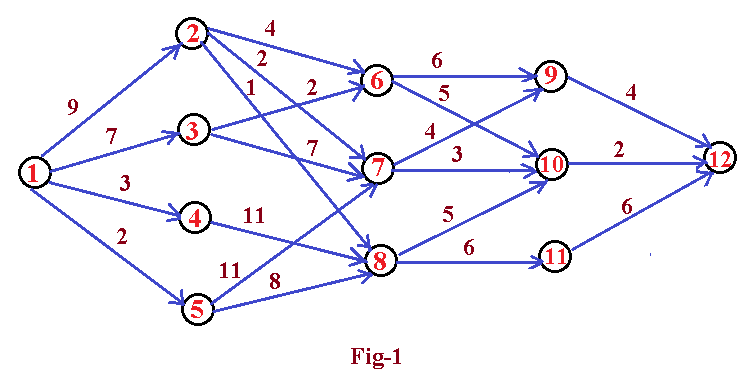

In [112]:
# Python3 program to find shortest
# distance in a multistage graph.

# Returns shortest distance from
# 0 to N-1.
def shortestDist(graph):
    global INF

    # dist[i] is going to store shortest
    # distance from node i to node N-1.
    dist = [0] * N

    dist[N - 1] = 0

    # Calculating shortest path
    # for rest of the nodes
    for i in range(N - 2, -1, -1):

        # Initialize distance from
        # i to destination (N-1)
        dist[i] = INF

        # Check all nodes of next stages
        # to find shortest distance from
        # i to N-1.
        for j in range(N):

            # Reject if no edge exists - no edge between i and j
            if graph[i][j] == INF:
                continue

            # We apply recursive equation to
            # distance to target through j.
            # and compare with minimum
            # distance so far.
            dist[i] = min(dist[i],
                        graph[i][j] + dist[j])

    return dist[0]

# Driver code
N = 8
INF = 999999999999

# Graph stored in the form of an
# adjacency Matrix
graph = [[INF, 1,  2,    5,  INF, INF, INF, INF],
        [INF, INF, INF, INF,  4,  11,  INF, INF],
        [INF, INF, INF, INF,  9,  5,  16,   INF],
        [INF, INF, INF, INF, INF, INF, 2,   INF],
        [INF, INF, INF, INF, INF, INF, INF,  18],
        [INF, INF, INF, INF, INF, INF, INF,  13],
        [INF, INF, INF, INF, INF, INF, INF,  2]]

print(shortestDist(graph))

# This code is contributed by PranchalK


9


# Shortest path length in Unweighted Graph

**Question:**
You are given an Undirected Graph having unit weight, Find the shortest path length from src to all the vertex and if it is unreachable to reach any vertex, then return -1 for that vertex.

In [113]:
def shortestPath(self, edges, n, m, src):
    data = [[] for _ in range(n)]
    INF = float('inf')
    for n1, n2 in edges :
        data[n1] += [n2]
        data[n2] += [n1]

    start = src
    graph = data
    # Create a queue and add the starting vertex to it
    queue = deque([start])

    # Create an array to keep track of the distances from the starting vertex to all other vertices
    distances = [INF] * len(graph)
    distances[start] = 0

    # Create a set to keep track of visited vertices
    visited = set()

    # Perform BFS
    while queue:
        # Dequeue the next vertex
        vertex = queue.popleft()
        visited.add(vertex)

        # Update the distances of neighbors
        for neighbor in graph[vertex]:
            if neighbor not in visited:
                if distances[neighbor] > distances[vertex] + 1 :
                    distances[neighbor] = distances[vertex] + 1
                    queue.append(neighbor)

    for i in range(n):
        if distances[i] == INF :
            distances[i] = -1
    return distances

# Strongly connected graph
**A directed graph is strongly connected if every node can be reached from every other node.**
**Strongly connected Graphs are always cyclic**

Formally, a graph G is said to be strongly connected if, for every pair of vertices u and v, there exists a directed path from u to v and a directed path from v to u. This property ensures that there is a way to reach any vertex from any other vertex in the graph, allowing for unrestricted movement and traversal between vertices.


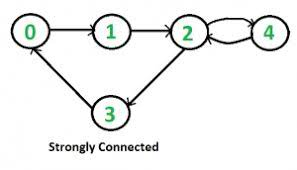

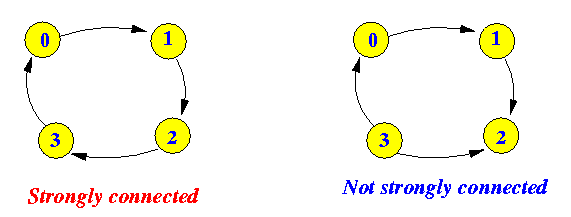
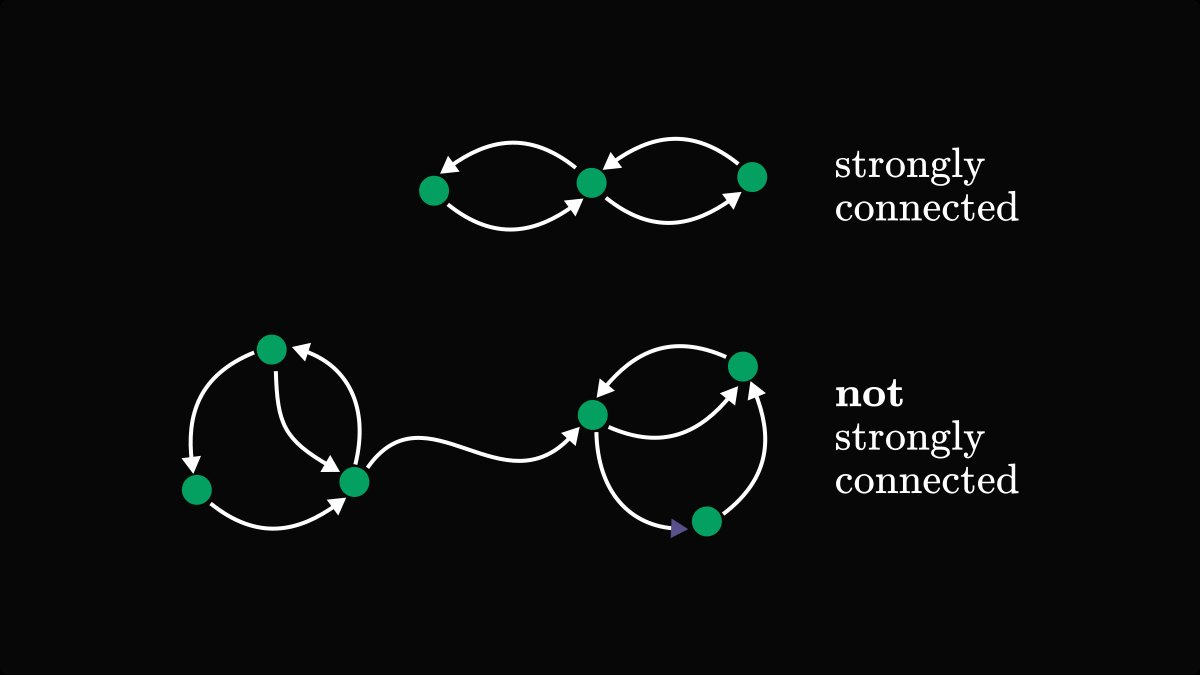

# Karp’s minimum mean (or average) weight cycle algorithm

**We will given a strongly connected graph**

**Question:** Given a directed and strongly connected graph with non-negative edge weights. We define the mean weight of a cycle as the summation of all the edge weights of the cycle divided by the no. of edges. Our task is to find the minimum mean weight among all the directed cycles of the graph.

**ANSWER**
1. Karp's algorithm has a time complexity of O(V * E^2), where V is the number of vertices and E is the number of edges in the graph. It can handle graphs with negative edge weights as long as there are no negative cycles.

Certainly! Here's an updated version of the pseudo-algorithm that includes explanations for the purpose of using the DP matrix and the second function:

1. Initialize variables:
   - Set `n` as the number of vertices in the graph.
   - Create a 2D array `dp` of size `(n+1) x n` and initialize all elements with infinity values. The DP matrix `dp` is used to store the shortest path distances from the source to each vertex using a certain number of edges.
   - Set `source` as the first vertex in the graph.

2. Compute shortest paths using dynamic programming:
   - Set the base case: `dp[0][v] = 0` for each vertex `v` in the graph. This represents the shortest path distance from the source vertex to itself with 0 edges, which is 0.
   - For `k` from 1 to `n`:
     - For each vertex `u` in the graph:
       - For each outgoing edge `(u, v)` from `u`:
         - Update `dp[k][u]` as the minimum of the current value of `dp[k][u]` and the shortest path distance from `source` to `u` with `k-1` edges plus the weight of edge `(u, v)`. This step fills up the DP table with the shortest path distances using `k` edges.

3. Calculate the maximum mean weight difference:
   - Initialize `max_mean_weight_diff` as infinity. This variable will store the minimum mean weight among all the directed cycles.
   - For `k` from 0 to `n-1`:
     - For each vertex `v` in the graph:
       - Calculate `mean_weight_diff` as the difference between the shortest path distance from `source` to `v` using `n` edges (i.e., `dp[n][v]`) and the shortest path distance from `source` to `v` using `k` edges (i.e., `dp[k][v]`), divided by the difference in the number of edges (`n - k`). This represents the mean weight of the cycle formed by the additional `n-k` edges.
       - Update `max_mean_weight_diff` as the minimum of the current value of `max_mean_weight_diff` and the calculated `mean_weight_diff`. This step helps in finding the minimum mean weight among all cycles.

4. Return the minimum mean weight:
   - Return `max_mean_weight_diff`, which represents the minimum mean weight among all the directed cycles in the graph.

The second function `shortest_paths` is responsible for calculating the shortest paths using dynamic programming. It takes the `graph` and `dp` matrix as inputs and fills up the `dp` matrix with the shortest path distances. It uses a nested loop structure to iterate over vertices and edges, updating the `dp` matrix with the minimum path distances.

The lines involved in the `shortest_paths` function perform the following tasks:
- Initialize the DP matrix with -1 values.
- Set the base case for the source vertex, which is 0.
- Iterate over the number of edges (from 1 to `V + 1`).
- Iterate over each vertex.
- Iterate over each outgoing edge from the current vertex.
- Check if the shortest path distance from the previous vertex (`edge.from_node`) is not -1.
- Calculate the current weight of the path and update the DP matrix if it is smaller than the previous value.

Overall, the purpose of using the DP matrix is to store and calculate the shortest path distances in a dynamic programming approach, which allows efficient computation of the minimum mean weight cycle in the given graph.

In [114]:
# Function to calculate the shortest paths using dynamic programming
def shortest_paths(graph, dp):
    V = len(graph.data)
    # Initializing all distances as -1
    for i in range(V + 1):
        for j in range(V):
            dp[i][j] = float('inf')

    # Shortest distance from the first vertex to itself with 0 edges is 0
    dp[0][0] = 0

    # Filling up the dp table
    for i in range(1, V + 1):
        for j in range(V):
            neighbors = graph.data[j]
            weights = graph.weights[j]
            idx = 0
            for edge in neighbors:
                wt = weights[idx]
                idx += 1
                if dp[i - 1][edge] != float('inf'): #checking whether the distance to that vertex from source using i-1 edges is finite
                    curr_wt = dp[i - 1][edge] + wt
                    if dp[i][j] == float('inf'):
                        dp[i][j] = curr_wt
                    else:
                        dp[i][j] = min(dp[i][j], curr_wt)

# Returns the minimum value of average weight of a cycle in the graph
def karps_min_avg_weight_cycle(graph):
    V = len(graph.data)
    dp = [[None] * V for _ in range(V + 1)]
    shortest_paths(graph, dp)

    # Array to store the average values
    avg = [-1] * V

    # Compute average values for all vertices using weights of shortest paths stored in dp
    for i in range(V):
        if dp[V][i] != float('inf'):
            for j in range(V):
                if dp[j][i] != float('inf'):
                    avg[i] = max(avg[i], (dp[V][i] - dp[j][i]) / (V - j))

    # Find the minimum value in avg[]
    result = avg[0]
    for i in range(V):
        if avg[i] != -1 and avg[i] < result:
            result = avg[i]

    return result


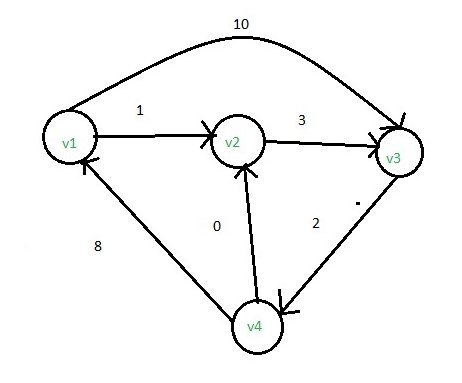

In [115]:
num_nodes10 = 4
edges10 = [(0, 1, 1), (0, 2, 10), (1, 2, 3), (2, 3, 2), (3, 1, 0), (3, 0, 8)]

edges = [[] for i in range(num_nodes10)]

for node1, node2, wt in edges10:
    edges[node1] += [[node2, wt]]

graph10 = DirectWeighted(edges10, num_nodes10, directed = True, weighted = True)

graph10

0 : [(1, 1), (2, 10)] 
1 : [(2, 3)] 
2 : [(3, 2)] 
3 : [(1, 0), (0, 8)] 

In [116]:
karps_min_avg_weight_cycle(graph10)

1.6666666666666667

In [117]:

import heapq


def dijkstra(adj, source):
    dist = [float('inf')] * graph.V
    dist[source] = 0
    min_heap = [(0, source)]

    while min_heap:
        d, u = heapq.heappop(min_heap)

        for v, w in adj[u]:
            if dist[u] + w < dist[v]:
                dist[v] = dist[u] + w
                heapq.heappush(min_heap, (dist[v], v))

    return dist

def min_avg_weight_cycle(edges, V):
    
    adj = [[] for _ in range(V)]
    
    for n1, n2, w in edges:
        adj[n1] += [(n2, w)]
    
    min_avg = float('inf')

    for start in range(V):
        dist = dijkstra(adj, start)

        for end in range(V):
            if start != end:
                for v, w in adj[end]:
                    avg_weight = dist[end] + w + dist[start]
                    if avg_weight < min_avg:
                        min_avg = avg_weight

    if min_avg == sys.maxsize:
        return "No cycle found"
    else:
        return min_avg

# Example usage:


result = min_avg_weight_cycle([(0, 1, 1), (0, 2, 10), (1, 2, 3), (2, 3, 2), (3, 1, 0), (3, 0, 8)], 4)
if type(result) == str:
    print(result)
else:
    print("Minimum Weight Average Cycle:", result)


AttributeError: 'list' object has no attribute 'V'

# Minimum Weight Cycle in a Undirected Graph

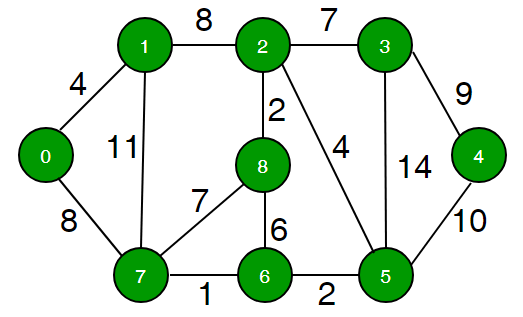

In [134]:
edges11 = [(0, 1, 4), (0, 7, 8), (1, 7, 11), (1, 2, 8), (7, 6, 1), (7, 8, 7), (2, 8, 2), (2, 3, 7), (2, 5, 4), (8, 6, 6), (6, 5, 2), (5, 3, 14), (5, 4, 10), (3, 4, 9)] 
num_nodes11 = 9
graph11 = DirectWeighted(edges11, num_nodes11, weighted = True)

In [135]:
graph11

0 : [(1, 4), (7, 8)] 
1 : [(0, 4), (7, 11), (2, 8)] 
2 : [(1, 8), (8, 2), (3, 7), (5, 4)] 
3 : [(2, 7), (5, 14), (4, 9)] 
4 : [(5, 10), (3, 9)] 
5 : [(2, 4), (6, 2), (3, 14), (4, 10)] 
6 : [(7, 1), (8, 6), (5, 2)] 
7 : [(0, 8), (1, 11), (6, 1), (8, 7)] 
8 : [(7, 7), (2, 2), (6, 6)] 

In [136]:
# Python3 program to find shortest weighted
# cycle in undirected graph
from sys import maxsize

INF = int(0x3f3f3f3f)

# Weighted undirected Graph
class Graph:
    # Function remove edge from undirected graph
    def removeEdge(self, u: int,v: int, w: int) -> None:
        self.adj[u].remove((v, w))
        self.adj[v].remove((u, w))

    # Find the shortest path from source to sink using Dijkstra’s shortest path algorithm [ Time complexity O(E logV )]
    def ShortestPath(self, u: int, v: int) -> int:

        # Create a set to store vertices that are being preprocessed
        setds = set()

        # Create a vector for distances and initialize all distances as infinite (INF)
        dist = [INF] * self.V

        # Insert source itself in Set and initialize its distance as 0.
        setds.add((0, u))
        dist[u] = 0

        # Looping till all shortest distance are finalized then setds will become empty
        while (setds):

            # The first vertex in Set is the minimum distance vertex, extract it from set.
            tmp = setds.pop()

            # Vertex label is stored in second of pair (it has to be done this way to keep the vertices sorted distance
            # (distance must be first item in pair)
            uu = tmp[1]

            # 'i' is used to get all adjacent vertices of a vertex
            for i in self.adj[uu]:

                # Get vertex label and weight of current adjacent of u.
                vv = i[0]
                weight = i[1]

                # If there is shorter path to v through u.
                if (dist[vv] > dist[uu] + weight):

                    # If the distance of v is not INF then
                    # it must be in our set, so removing it
                    # and inserting again with updated less
                    # distance. Note : We extract only those
                    # vertices from Set for which distance
                    # is finalized. So for them, we would
                    # never reach here.
                    if (dist[vv] != INF):
                        if ((dist[vv], vv) in setds):
                            setds.remove((dist[vv], vv))

                    # Updating distance of v
                    dist[vv] = dist[uu] + weight
                    setds.add((dist[vv], vv))

        # Return shortest path from
        # current source to sink
        return dist[v]

    # Function return minimum weighted cycle
    def FindMinimumCycle(self) -> int:

        min_cycle = maxsize
        E = len(self.edge)

        for i in range(E):

            # Current Edge information
            e = self.edge[i]

            # Get current edge vertices which we currently
            # remove from graph and then find shortest path
            # between these two vertex using Dijkstra’s
            # shortest path algorithm .
            self.removeEdge(e.u, e.v, e.weight)

            # Minimum distance between these two vertices
            distance = self.ShortestPath(e.u, e.v)

            # To make a cycle we have to add weight of
            # currently removed edge if this is the
            # shortest cycle then update min_cycle
            min_cycle = min(min_cycle,
                            distance + e.weight)

            # Add current edge back to the graph
            self.addEdge(e.u, e.v, e.weight)

        # Return shortest cycle
        return min_cycle

# 0-1 BFS (Shortest Path in a Binary Weight Graph)

**Given a graph where every edge has weight as either 0 or 1. A source vertex is also given in the graph. 
Find the shortest path from the source vertex to every other vertex.**

In [144]:
def binary_weight_shortest_path(graph, source):
    visited = set()
    n = len(graph.data)
    queue = [source]
    heapq.heapify(queue)
    idx = 0
    distance = [float('inf') for _ in range(n)]
    distance[source] = 0
    parent = [None for _ in range(n)]
    
    while len(queue) > 0 :
        curr_node = queue.pop(0)
        idx += 1
        visited.add(curr_node)
        
        neighbors = graph.data[curr_node]
        weights = graph.weights[curr_node]
        
        for i, neighbor in enumerate(neighbors):
            wt = weights[i]
            
            if neighbor not in visited:
                if distance[neighbor] > distance[curr_node] + wt :
                    heapq.heappush(queue, neighbor)
                    distance[neighbor] = distance[curr_node] + wt
                    parent[neighbor] = curr_node
    return distance, parent

In [145]:
binary_weight_shortest_path(graph11, 0)

([0, 4, 12, 19, 28, 16, 18, 8, 14], [None, 0, 1, 2, 3, 2, 5, 0, 2])

In [139]:
edges12 = [(0, 1, 0),(0, 7, 1), (1, 7, 1),(1, 2, 1),(2, 3, 0),(2, 5, 0),(2, 8, 1),(3, 4, 1),(3, 5, 1),(4, 5, 1),(5, 6, 1),(6, 7, 1),(7, 8, 1)]
num_nodes12 = 9

graph12 = DirectWeighted(edges12, num_nodes12, weighted = True)

In [140]:
binary_weight_shortest_path(graph12, 0)

[0, 0, 1, 1, 2, 1, 2, 1, 2]

In [141]:
graph12

0 : [(1, 0), (7, 1)] 
1 : [(0, 0), (7, 1), (2, 1)] 
2 : [(1, 1), (3, 0), (5, 0), (8, 1)] 
3 : [(2, 0), (4, 1), (5, 1)] 
4 : [(3, 1), (5, 1)] 
5 : [(2, 0), (3, 1), (4, 1), (6, 1)] 
6 : [(5, 1), (7, 1)] 
7 : [(0, 1), (1, 1), (6, 1), (8, 1)] 
8 : [(2, 1), (7, 1)] 

# Shortest Path in Weighted undirected graph
**We have given a graph, source and a target, we have to print the shortest path and shortest distance from the source to the target**

You are given a weighted undirected graph having n vertices numbered from 1 to n and m edges describing there are edges between a to b with some weight, find the shortest path between the vertex 1 and the vertex n and if path does not exist then return a list consisting of only -1.

In [157]:
import heapq
def shortestPath(n, m, edges, source, target):
    # Code here

    adj = [[] for _ in range(n+1)] 
    for n1, n2, wt in edges:
        
        adj[n1] += [(n2, wt)]
        adj[n2] += [(n1, wt)]        
    
    queue = [(0, source)]
    
    heapq.heapify(queue)

    parent = [None for _ in range(n+1)]
    
    visited = set()
    distance = [float('inf') for _ in range(n+1)]
    distance[source] = 0


    while queue:
        curr_dist, curr_node = heapq.heappop(queue)
        
        distance[curr_node] = curr_dist
        visited.add(curr_node)
        
        for item in adj[curr_node] :
            
            node2, wt = item
            if node2 not in visited: 
                heapq.heappush(queue, (curr_dist + wt, node2))
                parent[node2] = curr_node
                

    if distance[target] == float('inf'):
        return [-1]

    ans = []
    end = target
    while end != source:
        ans += [end]
        end = parent[end]                
    ans += [source]
    return ans[::-1], parent

In [158]:
edges13 = [(1, 2, 4),(1, 8, 1), (2, 8, 1),(2, 3, 1),(3, 4, 1),(3, 6, 2),(3, 9, 1),(4, 5, 1),(4, 6, 1),(5, 6, 1),(6, 7, 1),(7, 8, 1),(8, 9, 1)]
n = 9
m = len(edges13)
source = 1
target = 9
shortestPath(n, m, edges13, source, target)

([1, 8, 9], [None, None, 8, 9, 6, 4, 3, 8, 1, 8])

In [ ]:
import heapq

def Shortest_path_heap(graph, source, target):
    distance = {}
    parents = {}
    heap = [(0, source)]
    heapq.heapify(heap)
    
    while heap:
        current_dist, current_node = heapq.heappop(heap)        
        distance[current_node] = current_dist
        
        if current_node == target:
            break             
        neighbors = graph.data[current_node]
        weights = graph.weights[current_node]
        
        for i, neighbor in enumerate(neighbors):
            
            if neighbor not in distance:
                heapq.heappush(heap, (current_dist + weights[i], neighbor))
                parents[neighbor] = current_node
    if target not in distance:
        return float('inf')
    
    # Reconstruct the shortest path
    path = []
    current = target
    while current != source:
        path.insert(0, current)
        current = parents[current]
    path.insert(0, source)

    return distance[target], path

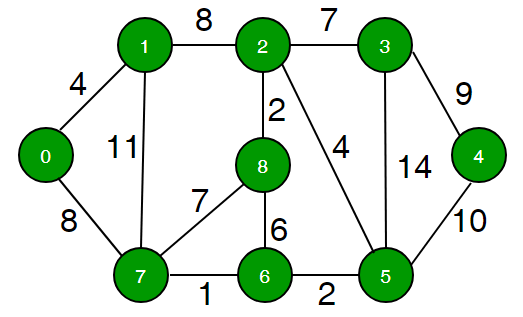

**in the edges the vertex are being counted from 1 as every vertex in graph is being incremented by 1**

edges11 = [(1, 2, 4), (1, 8, 8), (2, 8, 11), (2, 3, 8), (8, 7, 1), (8, 9, 7), (3, 9, 2), (3, 4, 7), (3, 6, 4), (9, 7, 6), (7, 6, 2), (6, 4, 14), (6, 5, 10), (4, 5, 9)] 


In [ ]:
edges11 = [(1, 2, 4), (1, 8, 8), (2, 8, 11), (2, 3, 8), (8, 7, 1), (8, 9, 7), (3, 9, 2), (3, 4, 7), (3, 6, 4), (9, 7, 6), (7, 6, 2), (6, 4, 14), (6, 5, 10), (4, 5, 9)] 
n = 9
m = len(edges11)

source = 1
target = 5
shortestPath(n, m, edges11, source, target)

# ---------------------Minimum Spanning Tree----------------------

**Properties of MST**
1. It is a tree: A minimum spanning tree is a connected acyclic graph that does not contain any cycles. It spans all the vertices of the original graph.

2. It connects all vertices: A minimum spanning tree includes all the vertices of the original graph, ensuring that there is a path between any two vertices in the tree.

3. It has minimum total weight: The sum of the edge weights in a minimum spanning tree is the minimum among all possible spanning trees of the graph. It selects edges with the lowest weights that still connect all the vertices.

#                         Spanning tree and Minimum Spanning Tree
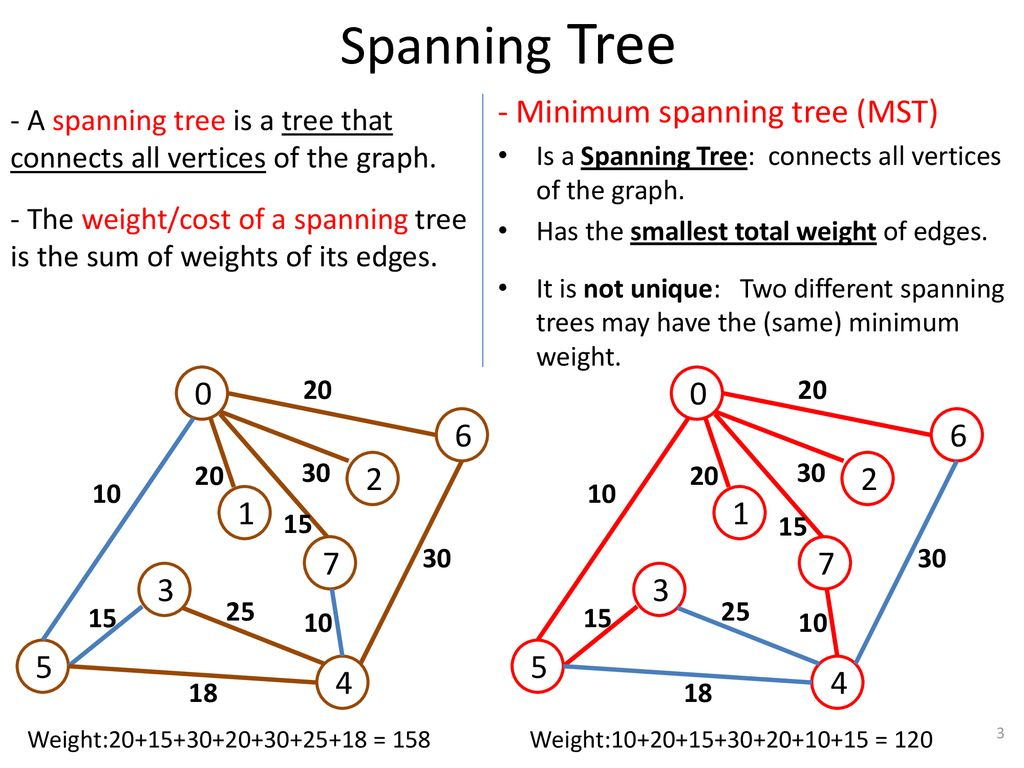

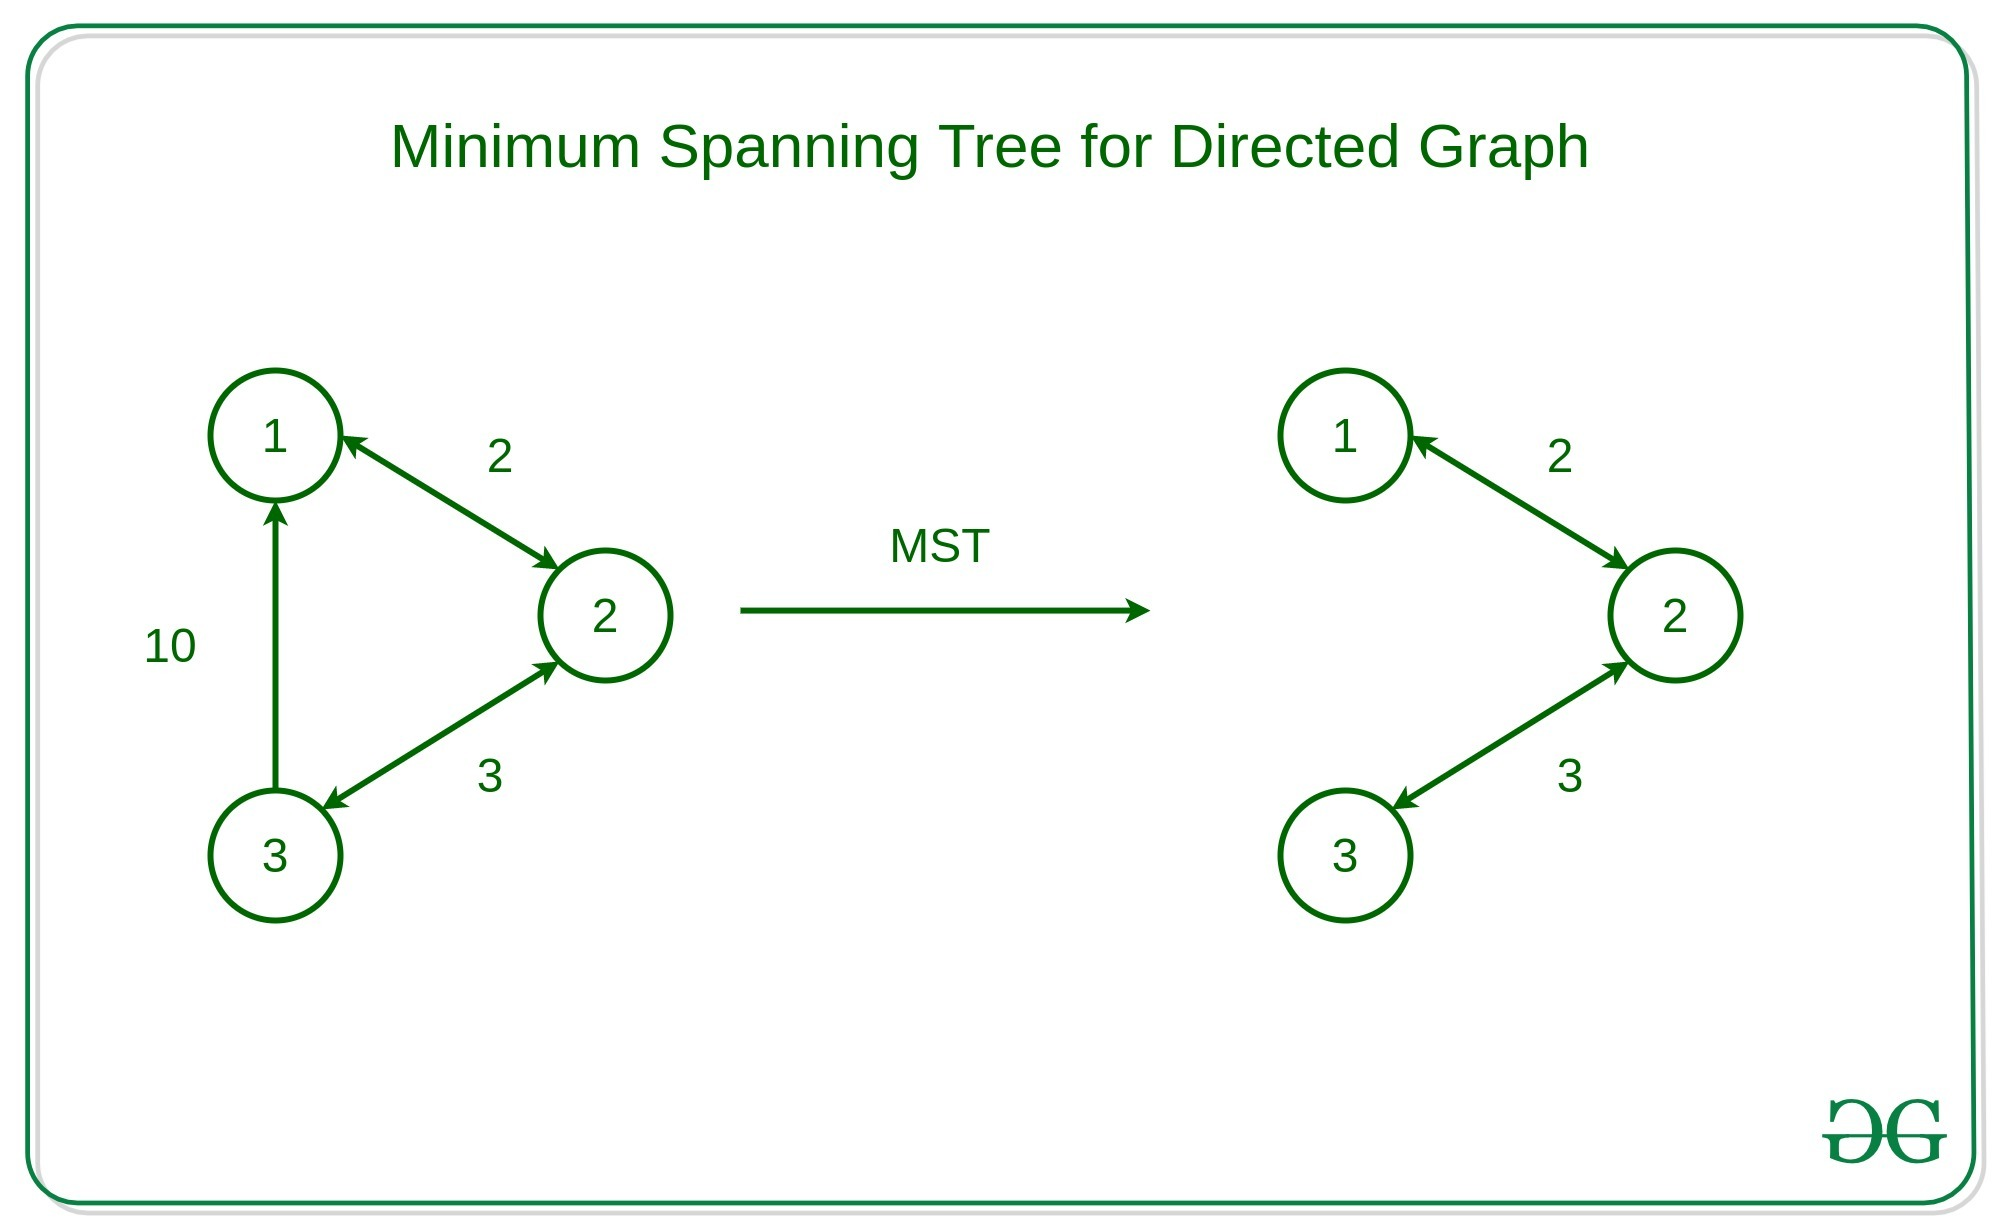

# Kruskal’s Minimum Spanning Tree (MST) Algorithm


1. Purpose: Kruskal's algorithm is used to find the Minimum Spanning Tree in a connected, weighted graph. The MST is a subset of the graph's edges that forms a tree, connecting all the vertices with the minimum total edge weight.

2. Properties: 
   - The algorithm builds the MST by greedily selecting edges with the smallest weights while avoiding cycles.
   - It starts with an empty set of edges and iteratively adds edges that do not create cycles until all vertices are connected.
   - Kruskal's algorithm does not depend on the starting vertex and works for both connected and disconnected graphs.

3. Algorithm Steps:
   - Sort all the edges of the graph in non-decreasing order of their weights.
   - Iterate through the sorted edges and add each edge to the MST if it does not create a cycle.
   - Track the set of connected components using a disjoint-set data structure (such as union-find).
   - Stop when all vertices are connected or when the desired number of edges is reached.

4. Time Complexity: 
   - Sorting the edges takes O(E log E) time, where E is the number of edges in the graph.
   - The disjoint-set operations have a time complexity of approximately O(log V), where V is the number of vertices.
   - Overall, the time complexity of Kruskal's algorithm is typically O(E log E) or O(E log V), depending on the graph's sparsity.


**Psudo Code to find MST**

KruskalMST(graph):
1. Create an empty set to store the MST edges.
2. Sort all the edges of the graph in non-decreasing order of their weights.
3. Create a disjoint-set data structure to track the connected components.
4. For each edge (u, v) in the sorted edges:
    - If adding the edge does not create a cycle in the MST:
        - Add the edge to the MST set.
        - Union the subsets containing vertices u and v.
    - If the MST set contains (V - 1) edges (V is the number of vertices), stop the algorithm.
5. Return the MST set of edges.

In [ ]:
def Krushkal_Mst(edges, n): #n is number of nodes
    parent = [i for i in range(n)]
    mst_set = set()
    edges = sorted(edges, key =  lambda x : x[2])
    
    for edge in edges:
        n1, n2, wt = edge
        par_n1 = find_parent(parent, n1)
        par_n2 = find_parent(parent, n2)
        
        if par_n1 != par_n2:
            union(parent, n1, n2)
            mst_set.add(edge)
            
        if len(mst_set) == n-1 :
            return mst_set
    
    return ("mst_set of a component", mst_set)
    
def find_parent(parent, node):
    if parent[node] == node :
        return node
    else:
        find_parent(parent, parent[node])
    

def union(parent, node1, node2):
    par1 = find_parent(parent, node1)
    par2 = find_parent(parent, node2)
    
    parent[par1] = par2

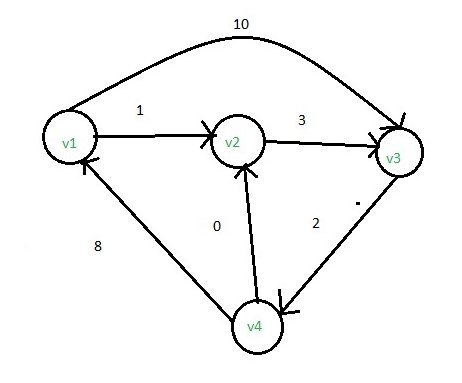


In [ ]:
num_nodes14 = 4
edges14 = [(0, 1, 1), (0, 2, 10), (1, 2, 3), (2, 3, 2), (3, 1, 0), (3, 0, 8)]
Krushkal_Mst(edges14, num_nodes14)

In [ ]:
num_nodes111 = 3
edges111 = [(0, 1, 5), (1, 2, 3), (0, 2, 1)]
Krushkal_Mst(edges111, num_nodes111)

# Prim’s Algorithm for Minimum Spanning Tree (MST)

Prim's algorithm is a greedy algorithm used to find the Minimum Spanning Tree (MST) of a weighted undirected graph. It starts with an arbitrary vertex and gradually builds the MST by adding the edge with the minimum weight that connects a vertex in the MST to a vertex outside the MST. Here's a high-level explanation of Prim's algorithm:

1. Choose an arbitrary vertex as the starting point.
2. Initialize an empty set to store the MST and a priority queue (min-heap) to store the edges.
3. Mark the starting vertex as visited.
4. Add all the edges connected to the starting vertex to the priority queue.
5. Repeat the following steps until all vertices are visited or the priority queue is empty:
   - Extract the edge with the minimum weight from the priority queue.
   - If the extracted edge connects a visited vertex to an unvisited vertex:
     - Add the edge to the MST.
     - Mark the unvisited vertex as visited.
     - Add all the edges connected to the newly visited vertex to the priority queue.
6. Return the MST.

Prim's algorithm is typically implemented using a priority queue to efficiently extract the edge with the minimum weight. The priority queue can be implemented using a binary heap or a Fibonacci heap to achieve better time complexity.

The time complexity of Prim's algorithm using a binary heap is O(E log V), where E is the number of edges and V is the number of vertices in the graph.

In [169]:
import heapq

def primMST(num_nodes, edges):
    graph = [[] for _ in range(num_nodes)]
    visited = set()
    mstSet = set()
    key = [float('inf')] * num_nodes
    parent = [-1] * num_nodes
    pq = []

    for n1, n2, wt in edges:
        graph[n1].append((n2, wt))
        graph[n2].append((n1, wt))

    src = 0  # Starting vertex
    key[src] = 0
    heapq.heappush(pq, (0, src))
    total = 0
    while pq:
        currentKey, currentVertex = heapq.heappop(pq)
        visited.add(currentVertex)
        mstSet.add((parent[currentVertex], currentVertex))

        for neighbor, weight in graph[currentVertex]:
            if neighbor not in visited and weight < key[neighbor]:
                key[neighbor] = weight
                heapq.heappush(pq, (weight, neighbor))
                parent[neighbor] = currentVertex
    print(mstSet)
    if len(mstSet) > 0 :
        mstSet.pop()
    print(key)
    return mstSet


In [170]:
num_nodes14 = 4
edges14 = [(0, 1, 1), (0, 2, 10), (1, 2, 3), (2, 3, 2), (3, 1, 0), (3, 0, 8)]
primMST(num_nodes14, edges14)

{(-1, 0), (3, 2), (1, 3), (0, 1)}
[0, 1, 2, 0]


{(0, 1), (1, 3), (3, 2)}

# Difference between Krukal's and Prim's Algorithms

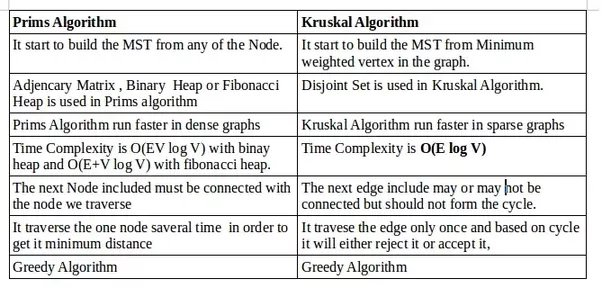

# Kirchoff's tree Matrix algorithm
# (Total Number Of Spanning Trees In A Graph)

1. Given a connected undirected graph with n vertices, 
2. construct an n x n matrix called the Laplacian matrix (also known as the Kirchhoff matrix or the degree matrix minus the adjacency matrix).
    
- The Laplacian matrix is defined as follows:
    - The diagonal elements of the matrix represent the degree of each vertex, which is the number of edges incident to that vertex.
    - The off-diagonal elements represent the adjacency between vertices. If two vertices are connected by an edge, the corresponding entry in the matrix is -1, else it is 0.
    - Subtract the degree matrix from the adjacency matrix to obtain the Laplacian matrix.

3. Now, remove the first row and the first column from the Laplacian matrix. The resulting matrix is a submatrix that represents the graph after removing any vertex (usually the first vertex).

4. Calculate the determinant of the submatrix. The determinant represents the total number of spanning trees in the original graph.

**Why the laplacian matrix (Kirchoff matrix) is able to find total no of sapanning trees**

1. The reason the determinant of the submatrix corresponds to the total number of spanning trees is due to the properties of the Laplacian matrix. 
2. The Laplacian matrix has some unique properties:

   - The sum of the entries in each row (except the first row) is always zero.
   - The Laplacian matrix is singular, meaning its determinant is zero.
   - The Laplacian matrix is positive semi-definite, meaning all its eigenvalues are non-negative.
3. When we remove the first row and the first column and calculate the determinant of the submatrix, the resulting value corresponds to the number of linearly independent equations in the Laplacian matrix. 
4. As a result, it represents the total number of spanning trees in the graph.

In [199]:
import numpy as np
def kirchoff_total_spanning(edes, n):

    matrix = [[0 for _ in range(n)] for _ in range(n)]
    
    for n1, n2 in edges:
        matrix[n1][n2] = -1
        matrix[n2][n1] = -1
    
    for i in range(n):
        count = 0
        for item in matrix[i]:
            if item == -1 :
                count += 1
        matrix[i][i] = count
    
    return calculate_determinant([row[1:] for row in matrix[1:]])

def calculate_determinant(mat):
    n = len(mat)
    temp = [0]*n # temporary array for storing row 
    total = 1
    det = 1 # initialize result 

    # loop for traversing the diagonal elements 
    for i in range(0, n): 
        index = i # initialize the index 

        # finding the index which has non zero value 
        while(index < n and mat[index][i] == 0): 
            index += 1

        if(index == n): # if there is non zero element 
            # the determinant of matrix as zero 
            continue

        if(index != i): 
            # loop for swapping the diagonal element row and index row 
            for j in range(0, n): 
                mat[index][j], mat[i][j] = mat[i][j], mat[index][j] 

            # determinant sign changes when we shift rows 
            # go through determinant properties 
            det = det*int(pow(-1, index-i)) 

        # storing the values of diagonal row elements 
        for j in range(0, n): 
            temp[j] = mat[i][j] 

        # traversing every row below the diagonal element 
        for j in range(i+1, n): 
            num1 = temp[i]	 # value of diagonal element 
            num2 = mat[j][i] # value of next row element 

            # traversing every column of row 
            # and multiplying to every row 
            for k in range(0, n): 
                # multiplying to make the diagonal 
                # element and next row element equal 

                mat[j][k] = (num1*mat[j][k]) - (num2*temp[k]) 

            total = total * num1 # Det(kA)=kDet(A); 

    # multiplying the diagonal elements to get determinant 
    for i in range(0, n): 
        det = det*mat[i][i] 

    return int(det/total) # Det(kA)/k=Det(A); 

In [202]:
def calculateDeterminant(matrix):
    if len(matrix) == 1:
        return matrix[0][0]

    determinant = 0

    for i in range(len(matrix)):
        subMatrix = [row[:i] + row[i+1:] for row in matrix[1:]]
        determinant += matrix[0][i] * calculateDeterminant(subMatrix) * ((-1) ** (i+2))

    return determinant

In [200]:
import numpy as np
mat = [[3, -1, -1, -1], [-1, 3, 0, -1], [-1, 0, 1, 0], [-1, -1, 0, 3]]
print(calculate_determinant(mat))


8


In [203]:
calculateDeterminant(mat)

8

In [201]:
import numpy as np
mat = [[3, -1, -1, -1], [-1, 3, 0, -1], [-1, 0, 1, 0], [-1, -1, 0, 3]]
np.linalg.det(mat)

8.000000000000002

# Minimum Product Spanning Tree

A minimum product spanning tree for a weighted, connected, and undirected graph is a spanning tree with a weight product less than or equal to the weight product of every other spanning tree. The weight product of a spanning tree is the product of weights corresponding to each edge of the spanning tree. All weights of the given graph will be positive for simplicity.
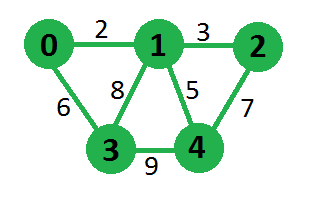

Minimum Product that we can obtain is 
180 for above graph by choosing edges 
0-1, 1-2, 0-3 and 1-4

**Here is the logic to solve this problem**
1. first converting the edges weights into log values, 
2. applying kruskals algorithm to find mst and 
3. then applying antilog on the sum of weights of the mst
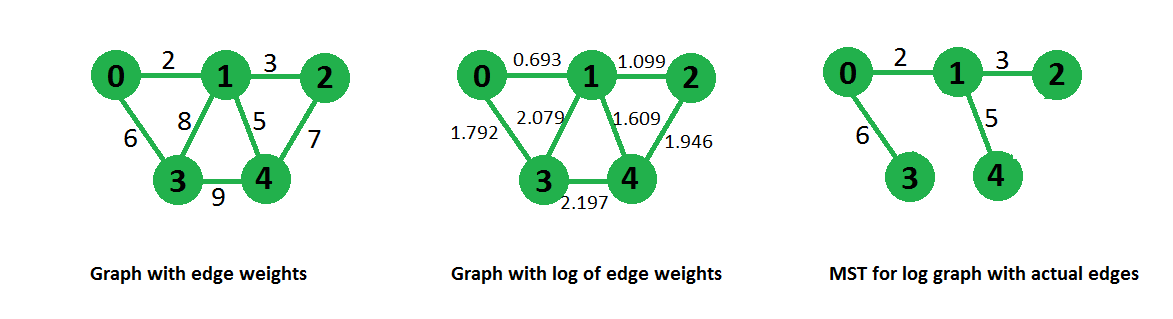

In [ ]:
import math
def min_prod_kruskal(edges, n):
    
    parent = [i for i in range(n)]
    mst_set = set()
    
    for i in range(len(edges)):
        edges[i][2] = math.log10(edges[i][2])
    
    edges = sorted(edges, key = lambda x : x[2])
    
    for edge in edges:
        n1, n2, wt = edge
        
        parn1 = find_parent(parent, n1)
        parn2 = find_parent(parent, n2)
        
        if parn1 != parn2 :
            mst_set.add((n1, n2, wt))
            union(parent, n1, n2)
        
    ans = 0
    for item in mst_set:
        ans += item[2]
        
    return round(math.pow(10, ans))
        
def find_parent(parent, node):
    if parent[node] == node: 
        return node
    return find_parent(parent, parent[node])

def union(parent, node1, node2):
    par1 = find_parent(parent, node1)
    par2 = find_parent(parent, node2)
    
    parent[par1] = par2

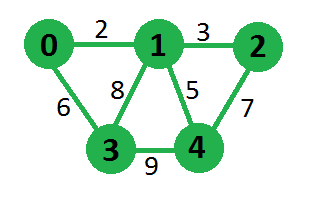

In [ ]:
edges = [[0, 1, 2], [0, 3, 6], [1, 2, 3], [1, 3, 8], [1, 4, 5], [3, 4, 9], [4, 2, 7]]
no_nodes = 5

min_prod_kruskal(edges, 5)

# Reverse Delete Algorithm for Minimum Spanning Tree

**Algorithm**

1. Sort the edges of the graph in decreasing order of their weights.
2. Initialize an empty set to store the MST.
3. Iterate over the edges in (starting from the edge with the highest weight):
   - Remove the current edge from the graph.
   - Check if the graph is still connected using a graph traversal algorithm (e.g., Depth-First Search or Breadth-First Search).
   - If the graph is still connected, add the current edge to the set of MST edges.
   - Otherwise, discard the current edge and move to the next edge.
4. The set of remaining edges after the iteration is the Minimum Spanning Tree.
5. Return the MST.

V = 4

E = 5

Arr = [0, 1, 10, 0, 2, 6, 0, 3, 5, 1, 3, 15, 2, 3, 4]


RevDelMST() 

which takes 2 Integers V, and E and an array of length 3*E where each triplet consists of two nodes u and v and weight of thir edge w as input and returns the Weight of the Minimum Spanning Tree.

In [ ]:
def RevDelMST(Arr, V, E):
    # code here 
    edges = set()
    mst_set = set()


    i = 0
    while i < len(Arr)-2:
        edges.add((Arr[i], Arr[i+1], Arr[i+2]))
        mst_set.add((Arr[i], Arr[i+1], Arr[i+2]))
        i += 3

    edges = sorted(edges, key = lambda x : x[2], reverse = True)


    idx = 0
    for edge in edges :

        mst_set.remove(edge)

        ans = BFS(mst_set, V)

        if ans != V :
            mst_set.add(edge)

    ans = 0
    for n1, n2, wt in mst_set :
        ans += wt

    return ans

def BFS(edges, n):

    adj = [[] for _ in range(n)]

    source = None
    for n1, n2, wt in edges:
        adj[n1] += [n2]
        adj[n2] += [n1]
        source = n1

    visited = set()

    if source != None :
        queue = [source]

        while queue:

            curr = queue.pop(0)
            visited.add(curr)

            for node2 in adj[curr] :

                if node2 not in visited:
                    queue.append(node2)

        return len(visited)

    return 0

# Boruvka’s algorithm

Boruvka's algorithm is a greedy algorithm used to find the Minimum Spanning Tree (MST) of a connected, weighted graph.

The algorithm works by iteratively merging components of the graph to form the MST. At each iteration, it considers each component of the graph and finds the cheapest outgoing edge from that component. These edges are then added to the MST. The process continues until there is only one component remaining, which represents the final MST.

The key idea of Boruvka's algorithm is to iteratively build the MST by repeatedly selecting the closest weight edges that connect different components. By merging components and adding the selected edges, it gradually constructs the MST until all vertices are included.

Approach/Methodology:

1. The Boruvka's algorithm aims to find the Minimum Spanning Tree (MST) of a connected, weighted, and undirected graph.

2. The algorithm uses the union-find data structure to keep track of connected components in the graph.

3. Initially, each vertex is considered as an individual component, and the parent array is initialized accordingly.

4. The MST is represented by the 'mst' list, which starts as empty.

5. The algorithm continues until there is only one connected component left, indicating that the MST is complete.

6. In each iteration, the algorithm performs the following steps for each component:
   - Initializes the 'closest' array to track the closest weight edge that connects the component to any other component.
   - Examines each edge in the graph and checks if it connects two different components.
   - If an edge connects two distinct components, it updates the 'closest' array for each component if the current edge has a smaller weight than the previously recorded closest edge.
  
7. After identifying the closest weight edges for each component, the algorithm proceeds to merge the components by adding the closest weight edges to the MST.
   - For each component, it retrieves the closest weight edge and the corresponding source and destination vertices.
   - It then checks if the source and destination vertices belong to different components.
   - If they do, the edge is added to the MST, and the union operation is performed to merge the two components.
   
8. The algorithm repeats steps 6 and 7 until there is only one connected component remaining, indicating the completion of the MST.

9. Finally, the algorithm returns the constructed MST.



**Pseudo Code for the Algorithm**
- Finding the MST

    **#Find function for union-find operation**

    function find(parent, i):
        if parent[i] == i:
            return i
        parent[i] = find(parent, parent[i])
        return parent[i]

    **#Union function for union-find operation**

    function union(parent, x, y):
        xroot = find(parent, x)
        yroot = find(parent, y)
        parent[xroot] = yroot

    **#Boruvka's algorithm to find Minimum Spanning Tree**


    function boruvkaMST(graph, vertices):

        parent = [i for i in range(vertices)]  # Initialize each vertex as an individual component

        mst = []  # Initialize MST as empty

        while len(set(parent)) > 1:  # While there are more than one component
            closest = [-1] * vertices  # Array to track closest weight edge for each component

            #Find the closest weight edge that connects each component to any other component
            for i in range(len(graph)):
                src, dest, weight = graph[i]
                set1 = find(parent, src)
                set2 = find(parent, dest)

                if set1 != set2:
                    # Update closest weight edge for component set1
                    if closest[set1] == -1 or closest[set1][2] > weight:
                        closest[set1] = (src, dest, weight)
                    # Update closest weight edge for component set2
                    if closest[set2] == -1 or closest[set2][2] > weight:
                        closest[set2] = (src, dest, weight)

            # Merge components by adding the closest weight edge to the MST
            for node in range(vertices):
                if closest[node] != -1:
                    src, dest, weight = closest[node]
                    set1 = find(parent, src)
                    set2 = find(parent, dest)

                    if set1 != set2:
                        mst.append((src, dest, weight))
                        union(parent, set1, set2)

        return mst  # Return the Minimum Spanning Tree (MST)


In [204]:

def find(parent, i):
    if parent[i] == i:
        return i
    parent[i] = find(parent, parent[i])
    return parent[i]

def union(parent, x, y):
    xroot = find(parent, x)
    yroot = find(parent, y)
    parent[xroot] = yroot


def boruvkaMST(graph, vertices):
    parent = [i for i in range(vertices)]
    mst = []
    
    while len(set(parent)) > 1:
        closest = [-1] * vertices
        
        for i in range(len(graph)):
            src, dest, weight = graph[i]
            set1 = find(parent, src)
            set2 = find(parent, dest)
            
            if set1 != set2:
                if closest[set1] == -1 or closest[set1][2] > weight:
                    closest[set1] = (src, dest, weight)
                if closest[set2] == -1 or closest[set2][2] > weight:
                    closest[set2] = (src, dest, weight)
        
        for node in range(vertices):
            if closest[node] != -1:
                src, dest, weight = closest[node]
                set1 = find(parent, src)
                set2 = find(parent, dest)
                
                if set1 != set2:
                    mst.append((src, dest, weight))
                    union(parent, set1, set2)
    
    return mst


# Example usage:
graph = [(0, 1, 1), (0, 2, 10), (1, 2, 3), (2, 3, 2), (3, 1, 0), (3, 0, 8)]
vertices = 4

mst = boruvkaMST(graph, vertices)
#print("Weight of Minimum Spanning Tree:", mst_weight)
print("Minimum Spanning Tree:", mst)


Minimum Spanning Tree: [(0, 1, 1), (3, 1, 0), (2, 3, 2)]


#        -------------------Topological Sorting------------------------

Topological sorting for Directed Acyclic Graph (DAG) is a linear ordering of vertices such that for every directed edge u v, vertex u comes before v in the ordering.

**NOTE :** Topological Sorting for a graph is not possible if the graph is not a DAG(Directed Acyclic Graph).
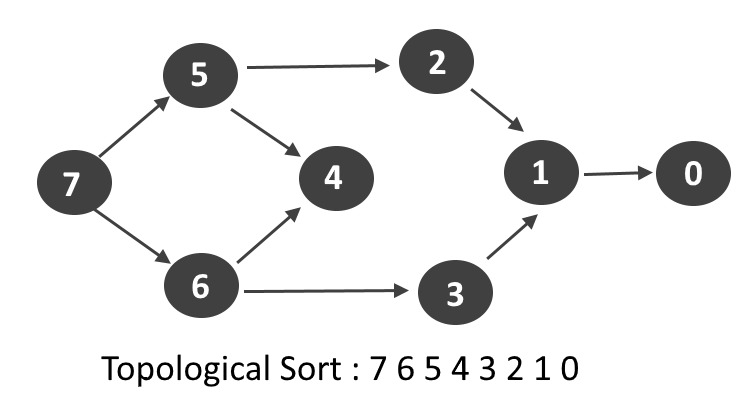
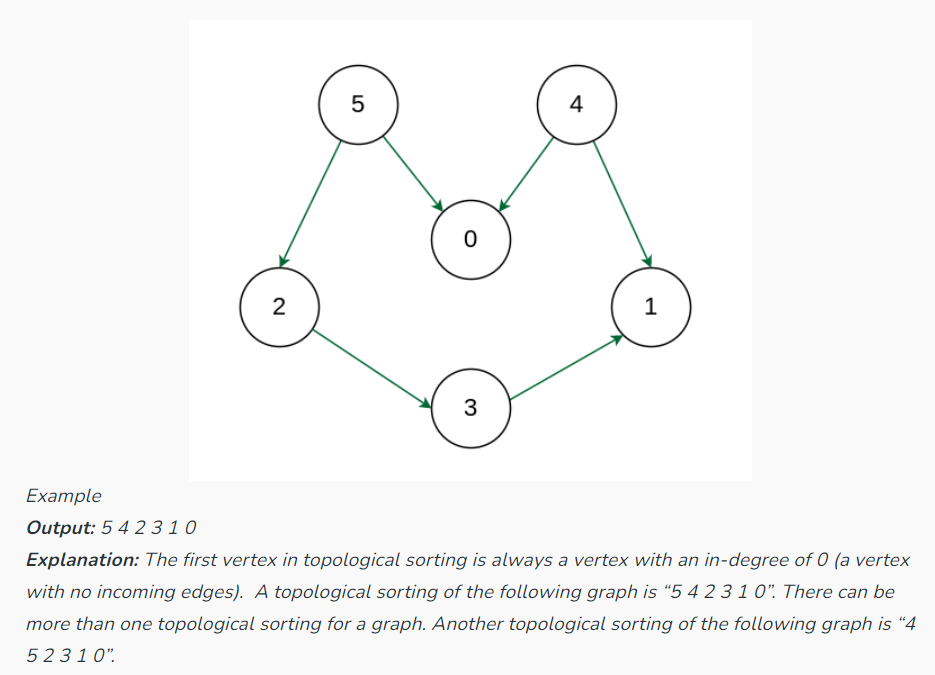
**Applications of topological sort**
1. Task Scheduling: Determines the order of tasks considering dependencies.
2. Course Prerequisite Planning: Helps plan course schedules based on prerequisite requirements.
3. Dependency Resolution: Resolves dependencies between modules or packages.
4. Event Scheduling: Orders events based on dependencies or constraints.
5. Workflow Management: Organizes and optimizes workflow by defining task execution order.


**Algorithm**

1. The algorithm begins by initializing an empty stack, a set to keep track of visited nodes, and a result list to store the topological sort.

2. The function `topologicalSort` takes the graph as input and iterates over each node in the graph.

3. For each unvisited node, the algorithm calls the `dfs` function to perform a Depth-First Search traversal.

4. The `dfs` function takes a node, the stack, and the visited set as parameters. It marks the current node as visited by adding it to the visited set.

5. Next, it iterates over the neighbors of the current node and recursively calls the `dfs` function on any unvisited neighbors.

6. The DFS traversal ensures that all the neighbors of a node are visited before the node itself is pushed onto the stack. This guarantees the reverse topological order.

7. After the DFS traversal is complete for a node, it pushes the node onto the stack.

8. Once all the nodes have been visited and processed, the algorithm enters a while loop to pop nodes from the stack.

9. It pops nodes one by one from the stack and appends them to the result list. Since the stack contains nodes in reverse order, popping them yields the topological sort in the correct order.

10. Finally, the algorithm returns the result list, which contains the topological sort of the graph.

In summary, the algorithm performs a Depth-First Search on the graph, visiting each node and exploring its neighbors recursively. It uses a stack to keep track of nodes in reverse topological order. After the traversal, it pops nodes from the stack to obtain the topological sort of the graph.

In [205]:
def topological_sort(edges, n):
    adj = [[] for _ in range(n)]
    for n1, n2 in edges:
        adj[n1] += [n2]
    
    visited = set()
    stack = []
    
    for node in range(n):
        if node not in visited:
            dfs(node, stack, visited, adj)
    
    top_sort = []
    for item in stack:
        top_sort += [item]
    
    return top_sort[::-1]

def dfs(node, stack, visited, adj):
    visited.add(node)
    
    for neighbor in adj[node]:
        if neighbor not in visited:
            dfs(neighbor, stack, visited, adj)
    stack.append(node)

In [206]:
edges = [(1, 0), (2, 0), (3, 0)]
n = 4
topological_sort(edges, 4)

[3, 2, 1, 0]


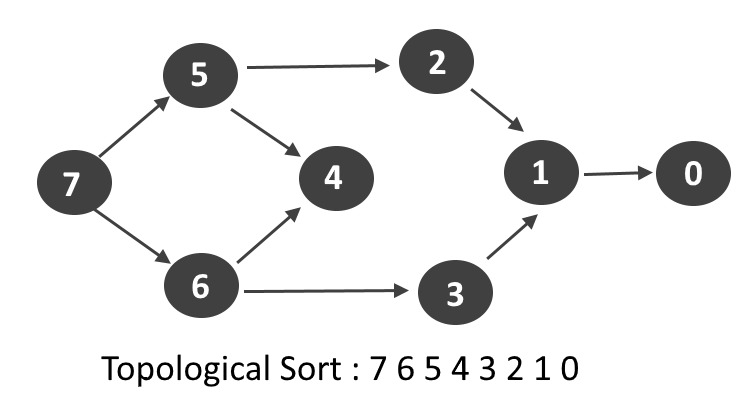
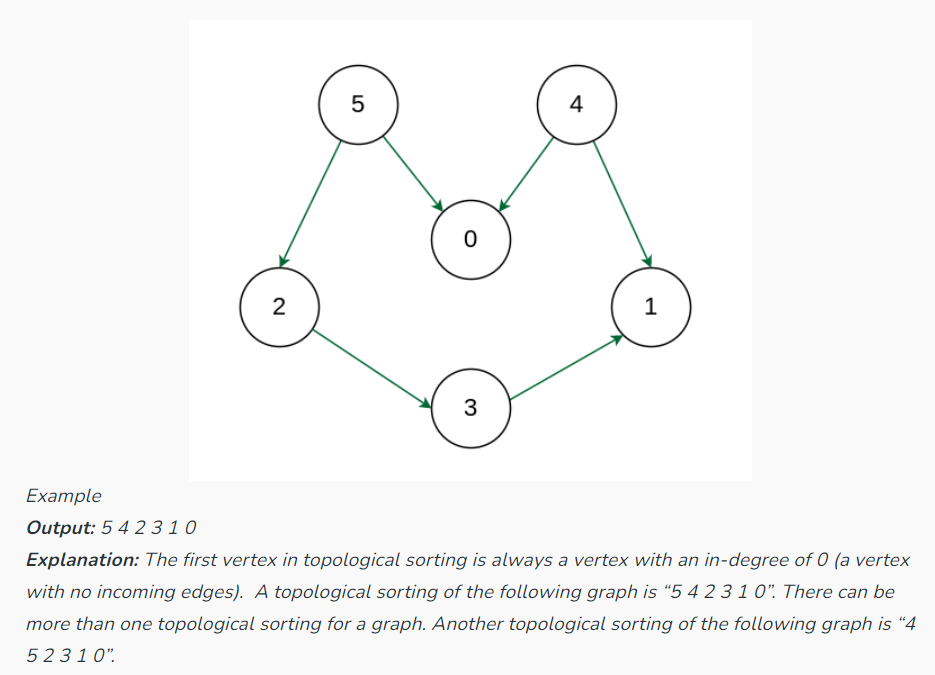


# Finding all the possible topological sort of a DAG(directed acyclic graph)

In [297]:
# TLE - UNOPTIMIZED Approach
from itertools import permutations

def findAllTopologicalOrders(edges, N):
    # Create adjacency list and in-degree list
    adjList = [[] for _ in range(N)]

    for (src, dest) in edges:
        adjList[src].append(dest)

    # Function to check if a sequence is a valid topological order
    def isTopologicalOrder(seq):
        for i in range(len(seq)):
            v = seq[i]
            for u in adjList[v]:    # for ex sequence is correct topological is  5, 4, 2, 3, 1, 0
                if u not in seq[i+1:]:  # here we taking edge 2------>3,v = 2 and u = 3, condition is true so the sequence 
                    return False
        return True

    # Generate all permutations of the nodes
    all_sequences = permutations(range(N))

    # Filter and print valid topological orders
    ans = []
    for sequence in all_sequences :
        sequence = sequence[::-1]
        if isTopologicalOrder(sequence):
            ans += [list(sequence)]

    print(ans)
    
edges = [(1, 0), (2, 0), (3, 0)]
N = 4
findAllTopologicalOrders(edges, N)

[[3, 2, 1, 0], [2, 3, 1, 0], [3, 1, 2, 0], [1, 3, 2, 0], [2, 1, 3, 0], [1, 2, 3, 0]]


In [298]:
edges = [(5, 0), (5, 2), (4, 0), (4, 1), (2, 3), (3, 1)]
N = 6
findAllTopologicalOrders(edges, N)

[[5, 4, 2, 3, 1, 0], [4, 5, 2, 3, 1, 0], [5, 2, 4, 3, 1, 0], [5, 2, 3, 4, 1, 0], [5, 4, 2, 3, 0, 1], [4, 5, 2, 3, 0, 1], [5, 2, 4, 3, 0, 1], [5, 2, 3, 4, 0, 1], [5, 4, 2, 0, 3, 1], [4, 5, 2, 0, 3, 1], [5, 2, 4, 0, 3, 1], [5, 4, 0, 2, 3, 1], [4, 5, 0, 2, 3, 1]]


In [313]:
def allTopological(edges, n):
    
    indeg = [0 for _ in range(n)]
    adj = [[] for _ in range(n)]
    for n1, n2 in edges :
        adj[n1].append(n2)  # Use append instead of +=
        indeg[n2] += 1

    visited = [False for _ in range(n)]
    path = []

    findAll(path, visited, n, adj, indeg)
             
    return

def findAll(path, visited, N, adj, indeg):

    # Base case: If the path contains all vertices, print it
    if len(path) == N:
        print(path)
        return

    for v in range(N):
        if indeg[v] == 0 and not visited[v]:

            # Remove the node from consideration
            visited[v] = True
            path.append(v)

            # Update the in-degrees of adjacent nodes
            for u in adj[v]:
                indeg[u] -= 1

            # Recur for the remaining graph
            findAll(path, visited, N, adj, indeg)

            # Backtrack
            visited[v] = False
            path.pop()
            for u in adj[v]:
                indeg[u] += 1

# Example usage:
edges = [(5, 2), (5, 0), (4, 0), (4, 1), (2, 3), (3, 1)]
N = 6
allTopological(edges, N)


[4, 5, 0, 2, 3, 1]
[4, 5, 2, 0, 3, 1]
[4, 5, 2, 3, 0, 1]
[4, 5, 2, 3, 1, 0]
[5, 2, 3, 4, 0, 1]
[5, 2, 3, 4, 1, 0]
[5, 2, 4, 0, 3, 1]
[5, 2, 4, 3, 0, 1]
[5, 2, 4, 3, 1, 0]
[5, 4, 0, 2, 3, 1]
[5, 4, 2, 0, 3, 1]
[5, 4, 2, 3, 0, 1]
[5, 4, 2, 3, 1, 0]


# Kahn’s algorithm for Topological Sorting
**Used to find the topological order of the DAG graph**

**Algorithm**

1. Create an empty stack to store the topologically sorted nodes.
2. Create an empty list to store the final topological ordering.
3. Create an array called "indegree" of size V (number of vertices) and initialize all elements to 0.
   - This array will store the indegree (number of incoming edges) for each node in the graph.
4. Calculate the indegree for each node:
   - Iterate over each node in the range from 0 to V.
   - For each node, iterate over its neighbors in the adjacency list.
   - Increment the indegree of each neighbor by 1.
5. Find all nodes with an indegree of 0 and add them to the stack:
   - Iterate over each node in the range from 0 to V.
   - If the indegree of a node is 0, push it onto the stack.
6. Perform the topological sorting using the Kahn's Algorithm:
   - While the stack is not empty:
     - Pop a node from the stack and add it to the final topological ordering.
     - Iterate over each neighbor of the popped node.
     - Decrement the indegree of each neighbor by 1.
     - If the indegree of a neighbor becomes 0, push it onto the stack.
7. Return the final topological ordering.

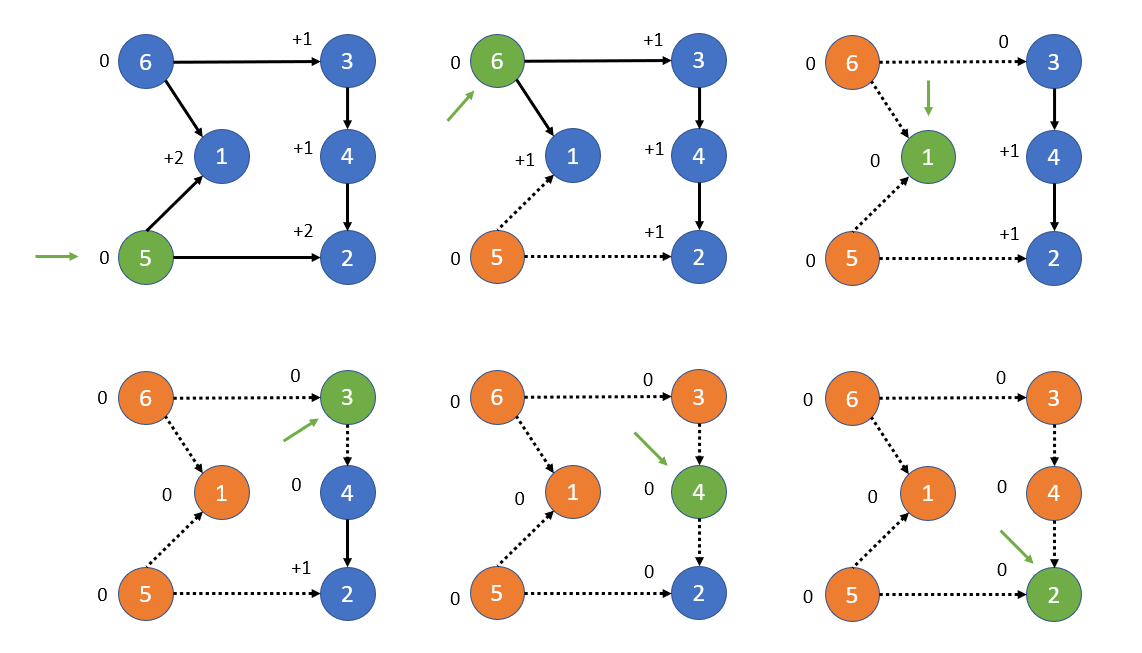

In [276]:
def kanhs_topo_sort(edges, n):
    indegree = [0 for _ in range(n)]
    adj = [[] for _ in range(n)]
    stack = []
    ans = []
    
    for edge in edges:
        n1, n2  = edge
        adj[n1] += [n2]
        indegree[n2] += 1
    
    for idx in range(n):
        if indegree[idx] == 0:
            indegree[idx] = float('inf')
            stack.append(idx)
    idx = 0 
    while stack:
        node = stack.pop(0)
        idx += 1
        ans += [node]
        
        for neighbor in adj[node]:
            indegree[neighbor] -= 1
            if indegree[neighbor] == 0 :
                stack.append(neighbor)
                
    return ans

In [277]:
edges = [(5, 2), (5, 0), (4, 0), (4, 1), (2, 3), (3, 1)]
N = 6
kanhs_topo_sort(edges, 6)

[4, 5, 2, 0, 3, 1]

In [278]:
edges = [(1, 0), (2, 0), (3, 0)]
n = 4
kanhs_topo_sort(edges, 4)

[1, 2, 3, 0]

# Maximum edges that can be added to DAG so that it remains DAG
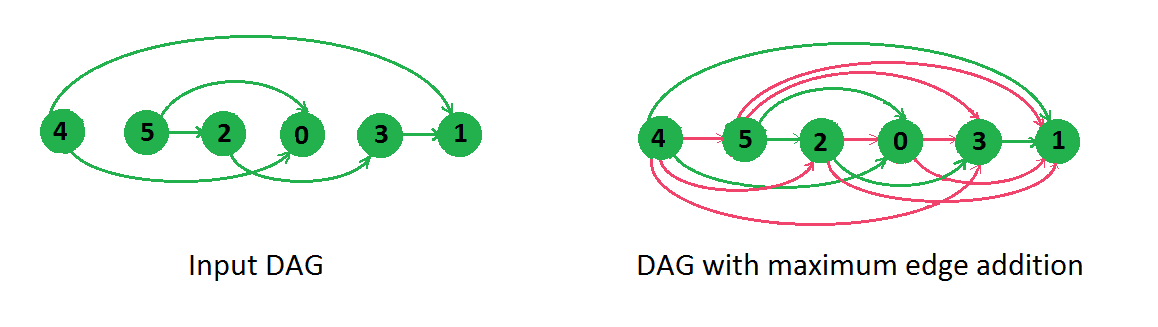

approach:
1. Count the number of nodes in the given DAG. Let's say the count is V.
2. Calculate the maximum possible edges in a DAG with V nodes.
   - The maximum possible edges in a DAG with V nodes is V*(V-1)/2. This is achieved when each node is connected to every other node except itself.
3. Count the existing edges in the given DAG. Let's say the count is E.
4. Calculate the difference between the maximum possible edges and the existing edges.
   - AdditionalEdges = (V*(V-1)/2) - E
5. The value of AdditionalEdges represents the maximum number of edges that can be added to the given DAG while maintaining its acyclic property.

In [ ]:
def max_add_DAG(edges, n):
    E = len(edges)
    ans = n*(n-1)//2 - E
    return ans

In [ ]:
edges = [(4, 1), (5, 0), (4, 0), (2, 3)]
n = 6
max_add_DAG(edges, 6)

# Longest Path in a Directed Acyclic Graph
**Given a Weighted Directed Acyclic Graph (DAG) and a source vertex s in it, find the longest distances from s to all other vertices in the given graph.**

In [315]:
def maximumDistance(v : int, e : int, src : int, edges):
    # code here
    adj = [[] for _ in range(v)]

    for n1 , n2 , wt in edges:
        adj[n1] += [(n2, wt)]

    INT_MIN = -float('inf')
    distance = [INT_MIN]*v
    distance[src] = 0 
    queue = [(src, 0)]

    idx = 0
    while idx < len(queue):

        curr, dist = queue[idx]
        idx += 1

        for neighbor , wt in adj[curr]:

            if distance[neighbor] < dist + wt:
                queue.append((neighbor, dist + wt ))
                distance[neighbor] = dist + wt

    for idx in range(v):
        if distance[idx] == INT_MIN:
            distance[idx] = 'INF'
    return distance

# Pre/start/arrival and Post/end/departure visited times in Graph

In [ ]:
def pre_post_time(edges, n, source):
    adj = [[] for _ in range(n)]
    pre = [[0 for _ in range(2)] for _ in range(n)]

    for n1, n2 in edges:
        adj[n1] += [n2]
    
    visited = set()
    pre_time = 0
    node = source
    pre_time = dfs(node, visited, adj, pre_time, pre)
    
    #adding the column if still other component or unvisited node is left
    for node in range(n):
        if node not in visited:
            pre_time = dfs(node, visited, adj, pre_time, pre)
    
    return pre

def dfs(node, visited, adj, pre_time, pre):
    visited.add(node)
    pre[node][0] = pre_time
    pre_time += 1
    for neighbor in adj[node]:
        if neighbor not in visited:
            pre_time = dfs(neighbor, visited, adj, pre_time, pre)
    pre[node][1] = pre_time
    pre_time += 1
    return pre_time
    

In [ ]:
edges = [(5, 2), (5, 0), (4, 0), (4, 1), (2, 3), (3, 1)]
n = 6
pre_post_time(edges, n, 5)

In [ ]:
edges = [(0, 3), (0, 1), (1, 2), (3, 2), (3, 4)]
n = 5
source = 0
pre_post_time(edges, n, source)

In [ ]:
def dfs(node, adj_list, timings, clock):
    timings[node]["pre"] = clock
    clock += 1

    for neighbor in adj_list[node]:
        if timings[neighbor]["pre"] == 0:
            clock = dfs(neighbor, adj_list, timings, clock)

    timings[node]["post"] = clock
    clock += 1

    return clock

def calculateTimings(edges, num_nodes, source):
    adj_list = [[] for _ in range(num_nodes)]
    timings = {}

    # Create adjacency list
    for edge in edges:
        src, dest = edge
        adj_list[src].append(dest)

    # Initialize timings dictionary
    for node in range(num_nodes):
        timings[node] = {"pre": 0, "post": 0}

    clock = 0
    dfs(source, adj_list, timings, clock)

    return timings

In [ ]:
edges = [(0, 3), (0, 1), (1, 2), (3, 2), (3, 4)]
n = 5
source = 0
calculateTimings(edges, n, source)

# Minimum time taken by each job to be completed given by a Directed Acyclic Graph

Given a Directed Acyclic Graph having V vertices and E edges, where each edge {U, V} represents the Jobs U and V such that Job V can only be started only after completion of Job U. The task is to determine the minimum time taken by each job to be completed where each Job takes unit time to get completed.

Meaning when all the parent nodes of a current nodes finished their work then only the curr node can do it's work


In [ ]:
def minimumTime(n : int,m : int, edges):
    # code here
    indegree = [0]*(n+1)
    adj = [[] for _ in range(n+1)]
    for n1, n2 in edges:
        adj[n1] += [n2]
        indegree[n2] += 1

    stack = []
    ans = [None]*(n+1)

    for idx in range(1, n+1):
        if indegree[idx] == 0 :
            stack.append(idx)
            ans[idx] = 1

    while stack:
        curr = stack.pop(0)

        for neighbor in adj[curr]:
            indegree[neighbor] -= 1 
            if indegree[neighbor] == 0:
                stack.append(neighbor)
                ans[neighbor] = ans[curr] + 1
    ans.pop(0)
    return ans

In [118]:
n=10
m=13
edges = [{1,3},{1,4},{1,5},{2,3},{2,8},{2,9},{3,6},{4,6},{4,8},{5,8},{6,7},{7,8},{8,10}]

minimumTime(n ,m , edges)

NameError: name 'minimumTime' is not defined

# --------------------------Connectivity-------------------------

# Bridge/Cut-edge/Critical Connections in the Graphs - Tarjan's Algorithm
The edge or edges whose removal from graph leads to break down the graph in two components 

A bridge, also known as a **cut edge**, is an edge in an undirected graph whose removal increases the number of connected components. In simpler terms, removing a bridge from a graph would result in splitting the graph into two or more disconnected parts.

To determine if an edge is a bridge, we typically use graph traversal algorithms like Depth-First Search (DFS) or Breadth-First Search (BFS). During the traversal, we keep track of the discovery time and low value of each vertex. If the low value of a vertex v is greater than the discovery time of its adjacent vertex u, then the edge (u, v) is a bridge.

In [119]:
def criticalConnections(V, adj):
    # code here
    visit_time = [0 for _ in range(V)]
    low = [float('inf') for _ in range(V)]
    visited = set()

    bridges = set()
    time = 1
    source = 0
    parent = 0
    dfs(adj, source, parent, low, visit_time, bridges, visited, time)

    bridges = list(bridges)
    bridges.sort()
    return bridges

def dfs(adj, node, parent, low, visit_time, bridges, visited, time):
    visited.add(node)
    visit_time[node] = time
    low[node] = time

    for neighbor in adj[node]:

        if neighbor == parent:
            continue

        if neighbor not in visited:
            time += 1
            dfs(adj, neighbor, node, low, visit_time, bridges, visited, time)
            low[node] = min(low[node], low[neighbor])
            # is bridge node <-----> neighbor
            if low[neighbor] > visit_time[node] :
                #sorting the lements and taking into the bridge set
                first = min(neighbor, node)
                second = max(neighbor, node)
                bridges.add((first, second))

        else:
            low[node] = min(low[node], low[neighbor])

# Articulation Points (or Cut Vertices) in a Graph

In graph theory, an articulation point (or cut vertex) is a vertex in a connected graph whose removal increases the number of connected components in the graph. In other words, an articulation point is a vertex that, if removed along with its incident edges, would disconnect the graph or split it into multiple disconnected components.

Articulation points play a crucial role in graph connectivity. They represent critical points in a graph that, when removed, can drastically change the structure and connectivity of the graph. Articulation points are often associated with important nodes or vulnerabilities in a network.

**Important**

The concept of articulation points is applicable to both directed and undirected graphs. It is independent of whether the graph is weighted or not. Articulation points can be present in graphs with or without edge weights.

**TLE -Approach**
1. try removing every node and then count number of components every time 
2. whenever the no of components goes more than one then 
3. we count the removed point as articulation point, store the point
4. return the points 

In [120]:
# MY Answer first approach - try removing every node and then count number of components every time 
# whenever the no of components goes more than one then we count the removed point as articulation point
def articulationPoints(V, adj):
    # code here
    adj1 = [[] for _ in range(V)]  #declaring the new adjacency list that is the filter part of adj
    
    #removing the wrong edges such as(2, 2), (node, node), as it's a undirectional graph so this edge has no sense to be there
    for i in range(V):
        for item in adj[i]:
            if item != i:
                adj1[i] += [item]

    adj[:] = adj1 #inplace replacement

    if V <= 2 :  #if the vertices in the graph are just 2 or less than that then there would be no articulation point
        return [-1]

    points = []   #declaring the list variable that will store the articulation points   
    for node in range(V):
        # if there are multiple components in the graph after removing the node "node", then we say it's an articulation point
        if no_components(adj, V, node):  #try removing the one node at a time from the graph and rest all will be there
            points += [node]
    return points

def no_components(adj, V, nod):

    visited = set()

    source = adj[0][0]  
    idx = 0
 
    #first finding a source node that is present in the graph after removing node "nod"
    while source == nod and idx < V:
        source = adj[idx][0]
        idx += 1
    #passing the source node from where the dfs will start traversing and "nod" for dfs to avoid this node and it's edges
    dfs(source, adj, visited, nod)

    if len(visited) < V-1:  #if we are not able to reach to all the nodes from source then there exists more than one components in the graph
        return True

    return False

def dfs(node, adj, visited, nod):
    visited.add(node)

    for neighbor in adj[node]:
        if neighbor not in visited and neighbor != nod:
            dfs(neighbor, adj, visited, nod)

**Correct and time efficient Approach**
1. Start the articulationPoints function with inputs V (number of nodes) and adj (adjacency list of the graph).
2. Initialize an empty set called visited to track visited nodes.
3. Create an array called low of size V and initialize each element to a high value (99999 in this case).
   This array will store the low values of nodes.
4. Initialize a variable called time to 1. This variable will track the discovery time of nodes.
5. Create an array called vist of size V and initialize each element to a high value (99999 in this case).
   This array will store the discovery time of nodes.
6. Initialize an empty set called points to store the articulation points.
7. Set the parent variable to -1, indicating the starting node has no parent in the DFS traversal.
8. Iterate over each node from 0 to V-1:
     - If the node is not in the visited set:
       - Call the dfs function with the current node, parent, adj, visited, low, vist, time, and points as arguments.
9. If the length of points is 0:
     - Return [-1] to indicate that there are no articulation points.
10. Convert the points set to a sorted list called art_points.
11. Return art_points as the final result.

12. The dfs function takes a node, parent, adj, visited, low, vist, time, and points as arguments.
13. Add the current node to the visited set.
14. Set the low value of the current node to the current time.
15. Set the discovery time of the current node to the current time.
16. Increment the time by 1.
17. Initialize a variable called child to 0 to track the number of children of the current node.
18. Iterate over each neighbor of the current node from the adjacency list adj[node]:
     - If the neighbor is the parent node, continue to the next iteration.
     - If the neighbor is not visited:
       - Increment the child counter by 1.
       - Recursively call the dfs function with the neighbor as the new node, current node as the new parent,
         and the remaining arguments.
       - Update the low value of the current node to the minimum of its current value and the low value of the neighbor.
       - If the low value of the neighbor is greater than or equal to the discovery time of the current node,
         and the current node is not the root of the DFS tree (parent != -1), add the current node to the points set.
     - If the neighbor is visited, update the low value of the current node to the minimum of its current value
       and the discovery time of the neighbor.
19. If the child counter is greater than 1 and the parent node is the root of the DFS tree (parent == -1),
    add the current node to the points set as it is an articulation point.

20. Return the points set.


In [121]:
# Coorect answer using approach of maximum reachability likewe have a node and one it's neighbor, 
#if the neighbor can reach to some other node that is getting visited earlier than the node, then definitely the node is not an articulation point
#if the neighbor can't reach to the node that is getting visited before parent then we would say if we remove node then the neighbor will not be a part of the parent graph
def articulation_Points(V, adj):
    visited = set()  # Set to track visited nodes
    low = [99999 for _ in range(V)]  # Array to store the low values of nodes - storing the lowest node where a node can reach to
    time = 1  # Variable to track the discovery time of nodes
    vist = [99999 for _ in range(V)]  # Array to store the discovery time of nodes
    points = set()  # Set to store the articulation points

    parent = -1  # Parent node in the DFS traversal

    for node in range(V):
        if node not in visited:
            dfss(node, parent, adj, visited, low, vist, time, points)

    if len(points) == 0:
        return [-1]

    art_points = list(points)
    art_points.sort()
    return art_points

def dfss(node, parent, adj, visited, low, vist, time, points):
    visited.add(node)

    low[node] = time  # Set the low value of the current node to the discovery time
    vist[node] = time  # Set the discovery time of the current node
    time += 1

    child = 0  # Counter to track the number of children of the current node
    
    for neighbor in adj[node]:
        if neighbor == parent:
            continue
        if neighbor not in visited:  # If the neighbor is not visited, recursively visit it
            child += 1
            dfss(neighbor, node, adj, visited, low, vist, time, points)

            low[node] = min(low[node], low[neighbor])  # Update the low value of the current node

            if low[neighbor] >= vist[node] and parent != -1:
                # If the low value of the neighbor is greater than or equal to the discovery time of the current node
                # and the current node is not the root of the DFS tree, it is an articulation point
                points.add(node)
        else:
            low[node] = min(low[node], vist[neighbor])  # Update the low value of the current node based on the neighbor
            
    #child is just to deal with the parent/source node of the traversal
    if child > 1 and parent == -1:
        # If the current node is the root of the DFS tree and has more than one child,
        # it is an articulation point
        points.add(node)


In [122]:
V = 3
adj = [[0, 0, 2], [2], [2, 2, 0, 1]]
ans2 = articulationPoints(V, adj) #My function
ans1 = articulation_Points(V, adj)  #chat-gpt answer
ans1, ans2

([2], [2])

# Eulerian path and circuit for undirected graph

**NOTE : If Euler circuit exits in a graph, only then the graph is called EULERIAN graph**
*IT IS IMPOSSIBLE TO HAVE BOTH(CIRCUIT, PATH) IN ONE GRAPH



**An Eulerian path is a path in a graph that visits every edge exactly once. In other words, it is a sequence of edges that starts at one vertex, passes through all other vertices, and ends at a different vertex. However, it is possible for the starting and ending vertices of an Eulerian path to be the same, in which case it is called an Eulerian circuit.**

To determine if an undirected graph has an Eulerian path or circuit, we need to consider the degrees of its vertices. The degree of a vertex is the number of edges connected to it. For a graph to have an Eulerian path or circuit, it must meet the following conditions:

1. If the graph has more than two vertices with odd degrees, it cannot have an Eulerian path or circuit. This is because in an undirected graph, each time we enter a vertex through an edge, we must leave it through another edge, except for the starting and ending vertices of an Eulerian path.

2. If the graph has zero vertices with odd degrees, it has an Eulerian circuit. This is because we can start at any vertex, traverse all edges exactly once, and return to the starting vertex.

3. If the graph has exactly two vertices with odd degrees, it has an Eulerian path. In this case, we can start at one of the vertices with an odd degree, traverse all edges exactly once, and end at the other vertex with an odd degree.

It's important to note that an Eulerian path or circuit may not exist if the above conditions are not met.

In summary, an Eulerian path is a path in an undirected graph that visits every edge exactly once, while an Eulerian circuit is an Eulerian path that starts and ends at the same vertex. The existence of an Eulerian path or circuit depends on the degrees of the vertices in the graph.

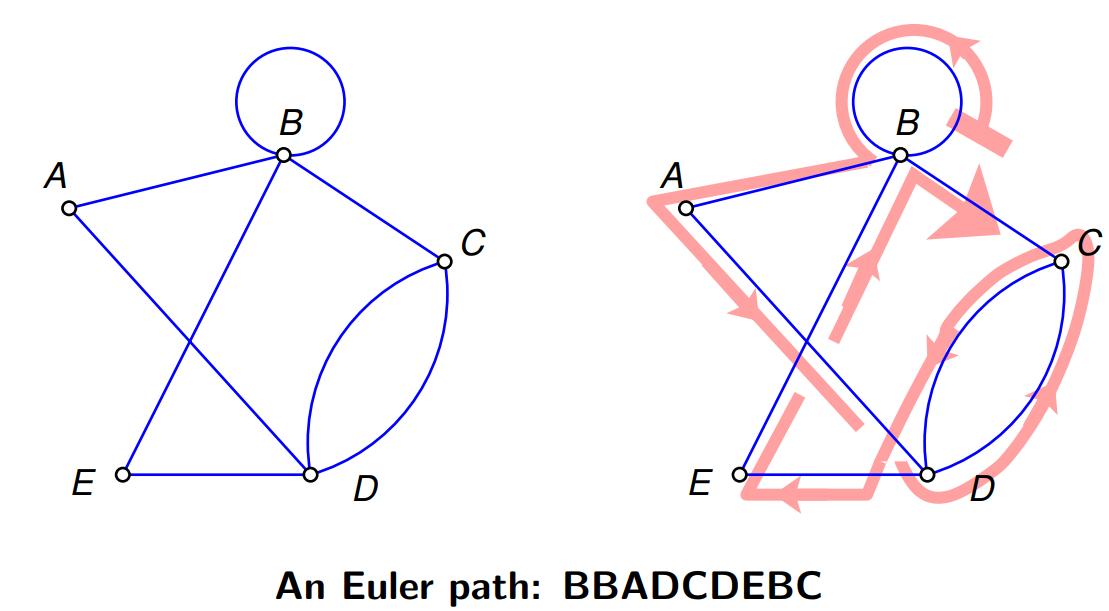

# Fleury’s Algorithm for printing Eulerian Path or circuits in an undirected graph. 

**Detection of existence of the Euler circuit and euler path in the graph**
**NOTE-**
1. For an Euler path to exist, there should be exactly two vertices with odd degrees, representing the start and end points of the path.
2. For an Euler circuit to exist, all vertices should have even degrees since the circuit starts and ends at the same vertex.


**Approach to determine the path/circuit**

1. Initialize variables:
    - Create an empty list path to store the vertices of the Euler path or circuit.
    - Create an empty stack stack to keep track of vertices during traversal.
    - Set the starting vertex as the first vertex in the graph (start_vertex = list(graph[0])[0]).
    - Set the current vertex as the starting vertex (current_vertex = start_vertex).
2. Perform the traversal:

    - Enter a while True loop to traverse the graph until explicitly broken.
    - Check if the current vertex has no remaining neighbors (len(graph[current_vertex]) == 0).
        - If true, it means all edges incident to the current vertex have been traversed.
        - Append the current vertex to the path list.
        - Check if the stack is empty (len(stack) == 0), indicating the end of traversal.
            - If true, break the loop.
            - If false, pop a vertex from the stack and assign it as the new current vertex to backtrack.
    - If the current vertex has remaining neighbors, select the first neighbor from the adjacency list (neighbor = graph[current_vertex][0]).
    - Push the current vertex onto the stack for backtracking (stack.append(current_vertex)).
    - Remove the edge between the current vertex and the neighbor from the graph by removing them from their respective adjacency lists.
    - Update the current vertex to be the neighbor, indicating the traversal to the next vertex.
3. Reverse and return the path:

    - After the traversal ends, reverse the path list (path[::-1]) to obtain the correct order of vertices.
    - Return the reversed path list.

In [123]:
#Function to detect the euler path
def euler_path_or_circuit(adj):
    n = len(adj)
    degrees = [0 for _ in range(n)]
    
    for node in range(n):
        degrees[node] = len(adj[node])
        
    odd_deg_vert = 0
    
    for items in degrees:
        if items%2 != 0 :
            odd_deg_vert += 1
    
    if odd_deg_vert == 2 :
        print("Euler_path")
        return print_euler(graph, n)
    
    elif odd_deg_vert == 0 :
        print("Euler_circuit")
        return print_euler(graph, n)
    return "Neither circuit not path"

#It will determine circuit if it exists, if path then it will give path
def print_euler(adj):
    path_cir = []  # Initialize an empty list to store the vertices of the Euler path/circuit
    stack = []  # Initialize an empty stack to keep track of vertices during traversal
    start_vertex = adj[0][0]  # Select the starting vertex as the first vertex in the graph
    current_vertex = start_vertex  # Set the current vertex as the starting vertex
#    euler_type = None  # Initialize a variable to store the type of Euler path/circuit

    while True:
        if len(adj[current_vertex]) == 0:  # Check if the current vertex has no remaining neighbors
            path_cir.append(current_vertex)  # Add the current vertex to the path/circuit list
            if len(stack) == 0:  # If the stack is empty, indicating the end of traversal
                break  # Break the loop
            current_vertex = stack.pop()  # Pop a vertex from the stack and backtrack to the previous vertex
        else:
            neighbor = adj[current_vertex][0]  # Select the first neighbor of the current vertex
            stack.append(current_vertex)  # Push the current vertex to the stack for backtracking
            adj[current_vertex].remove(neighbor)  # Remove the edge between the current vertex and the neighbor
            adj[neighbor].remove(current_vertex)  # Remove the edge between the neighbor and the current vertex
            current_vertex = neighbor  # Move to the neighbor vertex for the next traversal step
    #here after traversal if len(stack) == 0 then it is a circuit elif len(stack) == 2 then it is path else nothing exists like path/circuit
    return path_cir[::-1]  # Reverse the path/circuit list and return it


# Hierholzer's algorithm to detect the euler pth or circuit

# Strongly connected components in a directed graph - Kosaraju's Algorithm
**NOTE: Strongly Connected Components are only valid for Directed Graphs**

A directed graph is strongly connected if there is a path between all pairs of vertices. A strongly connected component (SCC) of a directed graph is a maximal strongly connected subgraph. For example, **there are 3 SCCs in the following graph.**
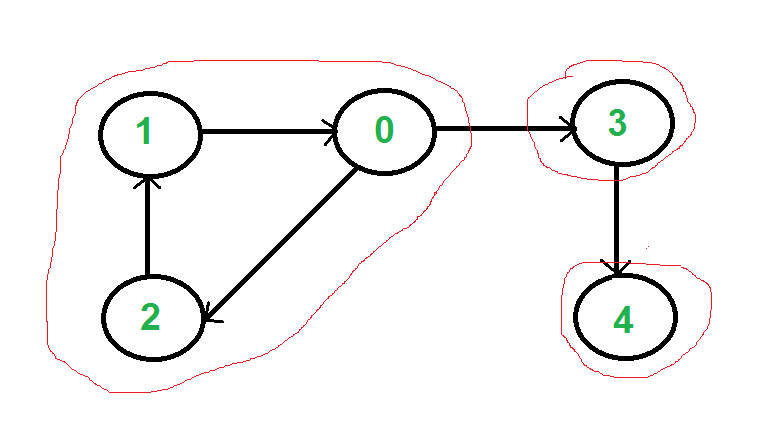
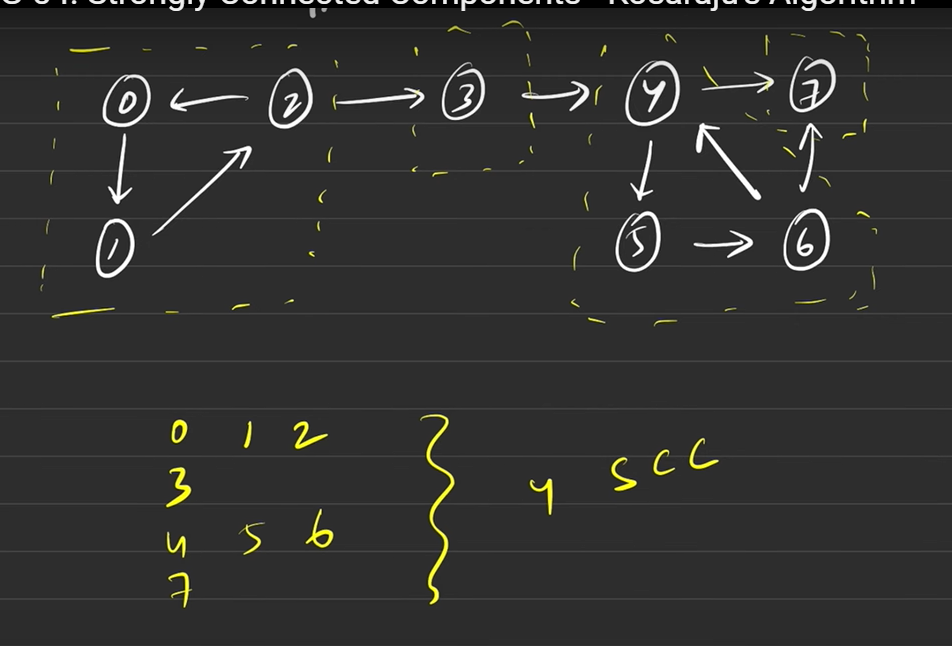

# Kosaraju's algorithm
1. Sort all the edges according to the finishing time
    - It is the step, where we are storing all the nodes according to the dfs traversal to keep their order as it is for later
2. Reverse the edges/graph like the directions of edges
    - Let say there exists a SCC, but in the beginning we can reach to other SCC during dfs traversal, so if we reverse the edges
    directions, it will not affect the SCC but it will stop us to move into the next SCC, like (0, 1, 2) ----->3---->(4, 5, 6)--->7, here we see we can reach to 7 in one only one dfs traversal
    but if we reverse the directions (0, 1, 2) <-----3<----(4, 5, 6)<---7, 
    -now we will have to run 4 different dfs traversals as we can't reach from 0 to 7 directly also during passing the nodes to dfs we have to pass the nodes which we stored during dfs traversal, to count the SCC.
    -like dfs(0)--it will mark the 0, 1, 2 as visited then we will pass 3 like that only we have stored in the first step
3. Traverse using DFS traversal
    - again dfs raversal here we can store the nodes that we are visiting at a time and can store them as single SCC

In [124]:
#Code

def SCCs(n, adj):
    visited = set()
    
    #Step-1 : storing the dfs traversal order
    dfs_seq = []
    for node in range(n):
        if node not in visited:
            dfs_sequ(adj, node, visited, dfs_seq)
    
    #Step-2: Reversing the edges
    adj_new = [[] for _ in range(n)]
    for node in range(n):
        for item in adj[node]:
            adj_new[item] += [node]
            
    #Step-3 : storing the SCCs present
    SCCs = dict()
    scc_count = 0
    visited = set()
    # In dfs_seq the first node is being stored in the last so we will iterate through last in dfs_seq
    i = 0
    for node in dfs_seq[::-1]:
        scc = set()
        if node not in visited:
            dfs_scc(node, visited, scc, adj_new)
            SCCs[i] = scc
            i += 1
            scc_count += 1

    return SCCs, scc_count
#function to store the dfs traversing order ---the node that gets ended stored first    
def dfs_sequ(adj, node, visited, dfs_seq):
    visited.add(node)
    
    for neighbor in adj[node]:
        if neighbor not in visited:
            dfs_sequ(adj, neighbor, visited, dfs_seq)
    dfs_seq += [node]    #storing the nodes from where the dfs is ending, like all the adjacents has been visited, can't go further

    #function to store and count the sccs
def dfs_scc(node, visited, scc,  adj_new):
    visited.add(node)
    scc.add(node)
    
    for neighbor in adj_new[node]:
        if neighbor not in visited:
            dfs_scc(neighbor, visited, scc, adj_new)

# Tarjan's Algorithm to find SCCs in a directed graph

**Approach:**
1. During traversal what's the lowest node where a node can reach(back edge is available), if the back edge is not available then we will mark it as a separate SCC
2. there are three types of edge present in a graph, parent-child edge, back edge, cross edge
3. so in this we avoid the cross edge(because cross edges are path to other SCCs)
4. to identify a back edge...the value of the second node will be present in the traversing stack, but for the croos edge the second edge value will not be preent in stack

**Start**

**Initialization**
1. Initialize a visited array for dfs traversal
2. Initialize a discovery arrat Disctime to store the time a node is getting discovered
3. Initializa an array to store the lowest node possible from one node
4. Initialize a timer that will help in filling the discovery time and low
5. Initialize a stack to store the nodes that are not finished
6. Initialize an boolean array Instack to keep track whether the nodes is present in stack or not

**DFS traversal**
1. Traverse through the node and mark it as visited, so we don't need to run dfs again on the same node
2. store the discovery time and low time from timer 
3. add the node into stack and mark the instack for that node as true
4. node go to the adjacents of this node and check if already visited or not .....
   - if not visited then we can run dfs traversal again on it and update the low time of the node if the adjacent can reach lower node of the curr_node
   - if visited then we can just check if it is an back edge or cross edge 
   - if it is a back edge then we can update the low reach value of node from the discovery time of the back edge end(it can be lower than the discovery/low_reach time of the curr node)
5. Now we check if the low current node is equal to discovery time of the node then it means this node is a head of the SCC.
   - declare a scc
   - add the components in a scc till the current node is popped out from the stack
   - update the Instack for all the item that we are removing from stack as 0/(not present)
6. Store that scc in the total SCCs variable
7. traverse for all the nodes and then return the total SCCs 

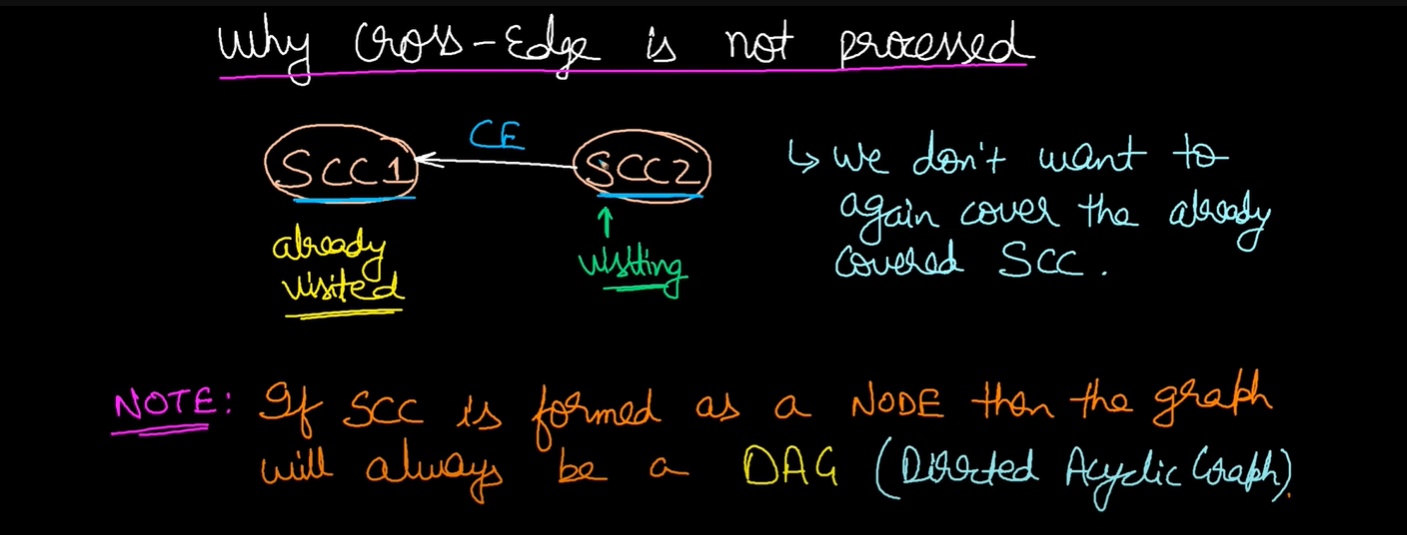
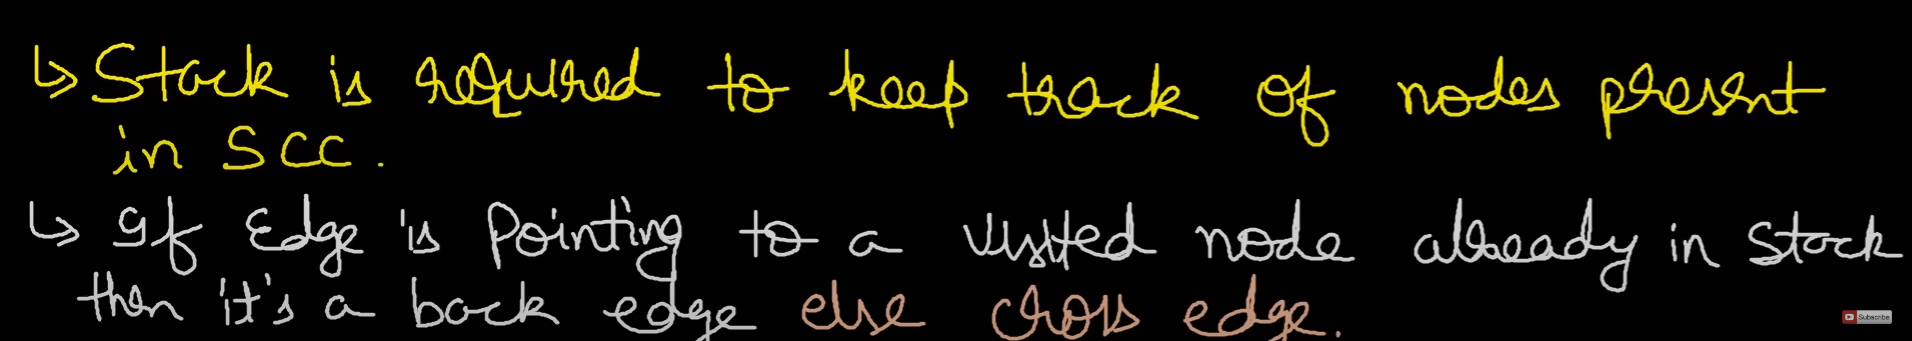
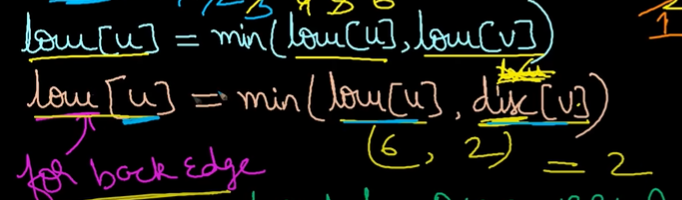
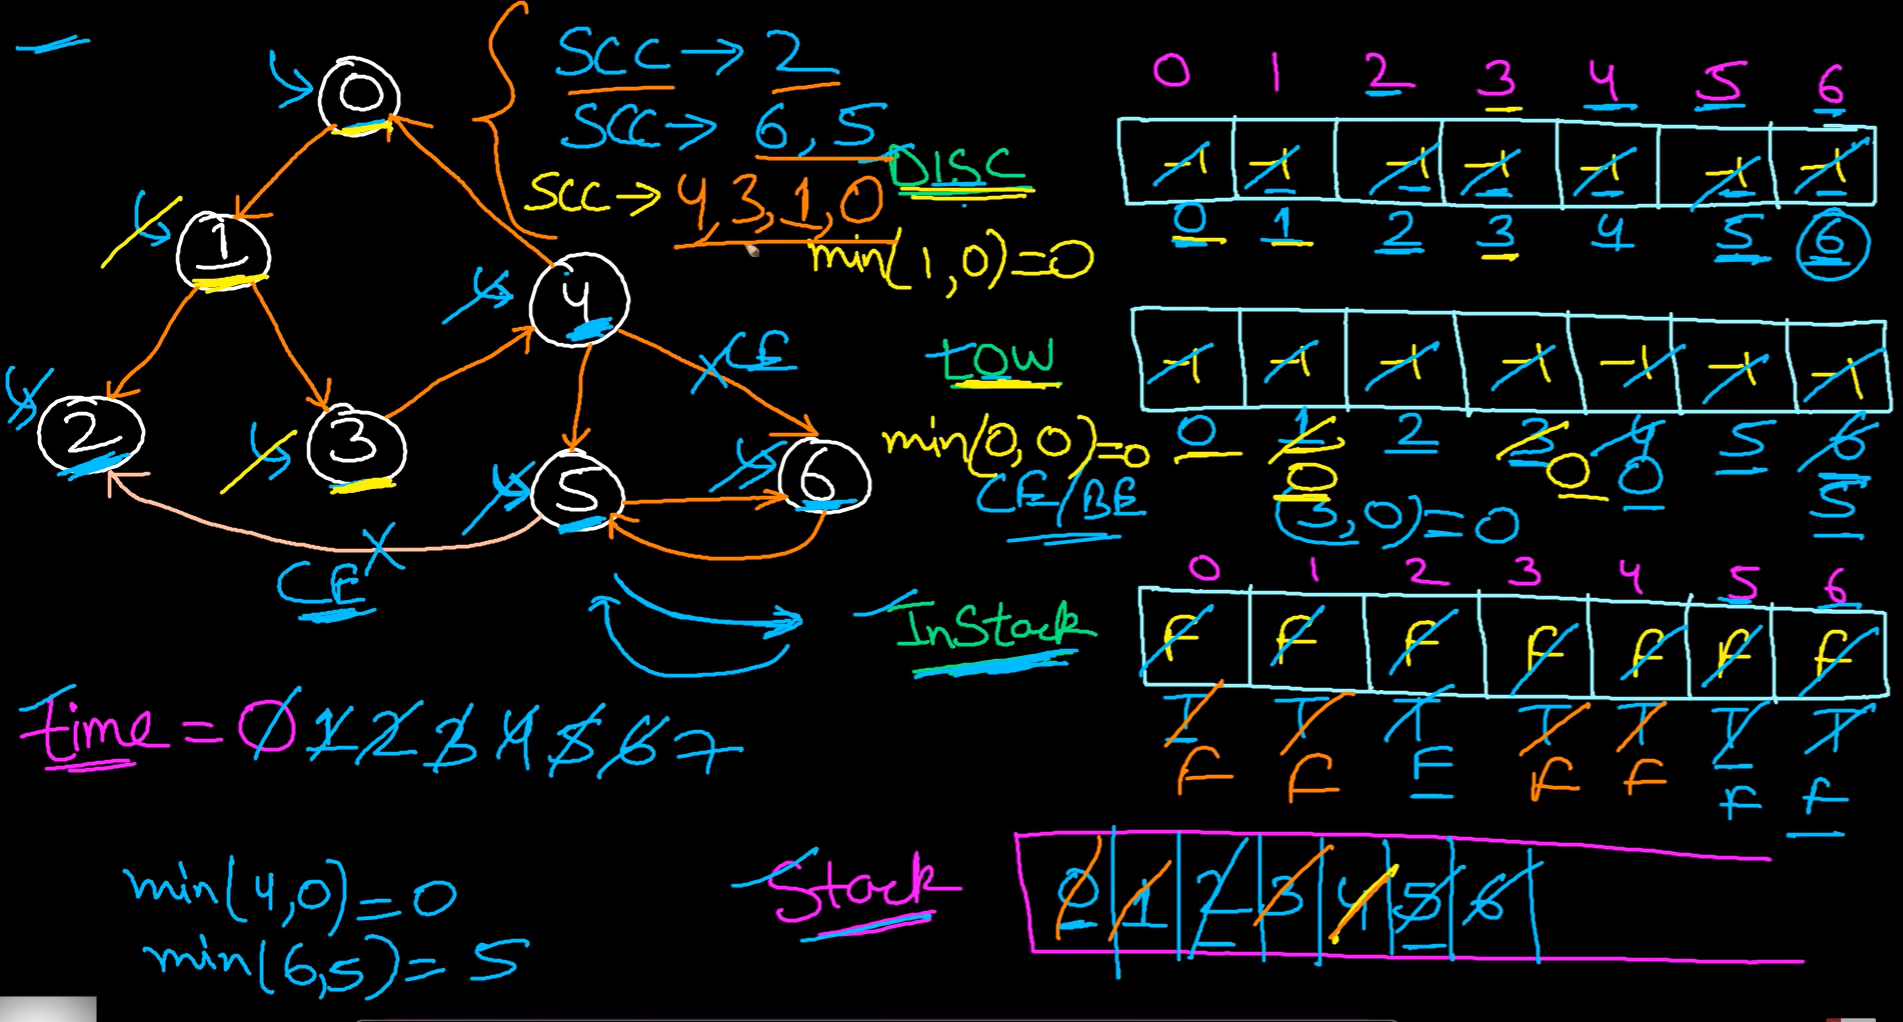

In [125]:
def tarjans_algo_sccs(adj, n):
    visited = set()
    low = [i for i in range(n)]
    disctime = [i for i in range(n)]
    Instack = [False for _ in range(n)]
    stack = []
    SCCs = []
    timer = 0
    
    for node in range(n):
        if node not in visited:
            timer = dfs(node, adj, visited, low, disctime, stack, Instack, timer, SCCs)
    
    SCCs.sort()
    
    return SCCs
    
def dfs(node, adj, visited, low, disctime, stack, Instack, timer, SCCs):
    
    visited.add(node)
    disctime[node] = timer
    low[node] = timer
    timer += 1
    
    stack.append(node)
    Instack[node] = True
    
    for neighbor in adj[node]:
        if neighbor not in visited:
            timer = dfs(neighbor, adj, visited, low, disctime, stack, Instack, timer, SCCs)
            low[node] = min(low[node], low[neighbor])
            
        elif Instack[neighbor]:
            low[node] = min(low[node], disctime[neighbor])
            
    if disctime[node] == low[node]:
        scc = []
        item = stack.pop()
        Instack[item] = False
        scc += [item]
        
        while item != node and len(stack) > 0:
            item = stack.pop()
            Instack[item] = False
            scc += [item]
        
        if len(scc) > 0 :
            scc.sort()
            SCCs.append(scc)
    return timer
    
    

# Possible paths : Count all possible walks from a source to a destination with exactly k edges

In [126]:
def MinimumWalk(graph, u, v, k):
    # Code here

    # Memoization table to store computed results
    memo = [[[-1 for _ in range(k+1)] for _ in range(len(graph))] for _ in range(len(graph))]  #IMPO

    # Call the recursive function with memoization
    return countwalks(graph, u, v, k, memo)

def countwalks(graph, u, v, k, memo):
    # A memoized recursive function to count walks from u to v with k edges

    # Base cases
    if k == 0 and u == v:
        return 1  # Reached destination with exactly k edges
    if k <= 0:
        return 0  # Used more edges than allowed
    if memo[u][v][k] != -1:
        return memo[u][v][k]  # Return precomputed result if available

    # Initialize the count
    count = 0

    # Traverse all adjacent vertices of u
    for i in range(len(graph)):
        if graph[u][i] > 0:
            # Recur for remaining edges with adjacent vertex i  ( let say if there are three adjacents of u then there is a possibility of three paths from u to v )
            count += countwalks(graph, i, v, k - 1, memo)

    memo[u][v][k] = count  # Store the computed count in the memoization table(no of paths from u---->v with only k edges)

    return count % (10**9 + 7)  # Return the count modulo (10^9 + 7)

# Word Ladder - I (Length of shortest chain to reach a target word)

**Approach:**
1. first take the start word and assign the level as 1 and store in a queue
2. assign a answer variable that will help us to get the answer
3. now run bfs using the queue and take the first value(word, level) everytime
   - try all the possible combinations of the current word popped from the queue
   - like first replace the first character and go from a to z and check that word is present in the wordlist or not, if preent then consider it for next level(curr_lvl + 1) and add into queue, like that for every character of the curr_word
   - if the curr_word is equal to the target word then store it's level as answer
4. return answer

In [127]:
def wordLadderLength(startWord, targetWord, wordList):
    #Code here

    wordset = set(wordList)

    queue = [(startWord, 1)]

    ans = 999999

    if startWord == targetWord: #if we need to reach to the same word then we don't need any path
        return 0


    while queue:
        curr_word, curr_lvl = queue.pop(0)

        if curr_word == targetWord :
            ans = min(ans, curr_lvl)

        idx = 0

        for x in range(len(curr_word)):
            arr = [item for item in curr_word]
            for c in range(ord('a'), ord('z')+1):
                arr[x] = chr(c) 
                new_word = str("".join(arr))
                if str(new_word) in wordset:
                    queue.append((new_word, curr_lvl + 1))
                    wordset.remove(new_word)

    if ans == 999999 : #it means the target word is not present in the wordlist
        return 0
    return ans

# Word Ladder II (print all the shortest chains to reach a target word)

Word Ladder II is an extension of the Word Ladder problem where, instead of finding the length of the shortest chain, we need to find all the shortest transformation sequences from a given starting word to a target word.

**Example:**

startWord = "der", targetWord = "dfs",

wordList = {"des","der","dfr","dgt","dfs"}

Output:

der dfr dfs
der des dfs

Explanation:

The length of the smallest transformation is 3.

And the following are the only two ways to get

to targetWord:-

"der" -> "des" -> "dfs"

"der" -> "dfr" -> "dfs"


Create a graph where each word is a node, and there is an edge between two words if they differ by exactly one character. This graph will be used to build the transformation sequences.

Start with the initial word as the source node and perform a breadth-first search (BFS) on the graph. Maintain a queue to store the nodes being visited.

During the BFS, for each word in the queue, generate all possible words that can be formed by changing one letter at a time. If any of these generated words are in the word list and have not been visited before, add them to the queue, mark them as visited, and keep track of their parent nodes.

Continue the BFS until the target word is reached or there are no more words to explore in the queue.

Once the BFS is completed, you will have a graph with parent-child relationships between words. This graph represents all possible transformation sequences.

Use a backtracking algorithm to construct all the transformation sequences from the graph. Start with the target word and recursively find its parent words until reaching the initial word. Maintain a list of the current sequence during the backtracking process.

Return all the transformation sequences obtained from the backtracking algorithm.

# Circle of strings

"""
Approach:
Certainly! I'll explain the approach in simpler terms:

1. First, we build a graph using the given strings `A`. Each string represents an edge in the graph. We keep track of the in-degree and out-degree of each node in the graph.

2. We need to check if the graph has a valid Eulerian cycle. To do that, we perform the following checks:
   - The graph should be strongly connected, meaning that there is a path from any node to any other node in the graph.
   - Each node in the graph should have equal in-degree and out-degree.

3. If the graph passes the Eulerian cycle checks, we proceed with finding an Eulerian cycle using Hierholzer's algorithm. This algorithm is a depth-first search (DFS) based algorithm that finds a cycle that visits each edge exactly once.

4. Once we have the Eulerian cycle, we check if the resulting path forms a valid circular arrangement. We check if the path visits all strings exactly once and returns to the starting node.

5. Finally, we return 1 if the circular arrangement is valid, and 0 otherwise.


"""

In [128]:
from collections import defaultdict

class Solution:
    def isCircle(self, N, A):
        # Create an empty graph to store the connections between nodes
        graph = defaultdict(list)

        # Create dictionaries to store the in-degree and out-degree of each node
        in_degree = defaultdict(int)
        out_degree = defaultdict(int)

        # Build the graph and calculate in-degree and out-degree of each node
        for word in A:
            start, end = word[0], word[-1]
            graph[start].append(end)  # Add the connection from start to end in the graph
            out_degree[start] += 1  # Increment the out-degree of the start node
            in_degree[end] += 1  # Increment the in-degree of the end node

        # Check if the graph has a valid Eulerian cycle
        # The graph should be strongly connected and each node should have equal in-degree and out-degree
        start_node = A[0][0]  # Get the starting node from the first word in the input list
        if not self.isStronglyConnected(graph, start_node) or not self.hasEqualDegrees(in_degree, out_degree):
            return 0  # Return 0 if the graph does not satisfy the conditions for a valid Eulerian cycle

        # Perform Hierholzer's algorithm to find an Eulerian cycle
        path = []
        self.dfs(start_node, graph, path)  # Start the depth-first search from the starting node

        # Check if the path forms a valid circular arrangement
        if len(path) == len(A) + 1 and path[0] == path[-1]:
            return 1  # Return 1 if the path forms a valid circular arrangement

        return 0  # Return 0 if the path does not form a valid circular arrangement

    def isStronglyConnected(self, graph, start_node):
        visited = set()
        self.dfsVisit(start_node, graph, visited)  # Perform a depth-first search to visit all nodes

        return len(visited) == len(graph)  # Return True if all nodes have been visited

    def dfsVisit(self, node, graph, visited):
        visited.add(node)  # Mark the current node as visited

        if node in graph:  # Check if the current node has any outgoing connections
            for neighbor in graph[node]:  # Iterate over the neighbors of the current node
                if neighbor not in visited:  # Check if the neighbor has not been visited
                    self.dfsVisit(neighbor, graph, visited)  # Recursively visit the neighbor

    def hasEqualDegrees(self, in_degree, out_degree):
        for node in in_degree:  # Iterate over the nodes in the in-degree dictionary
            if in_degree[node] != out_degree[node]:  # Check if the in-degree and out-degree are not equal
                return False  # Return False if the degrees are not equal for any node

        return True  # Return True if the degrees are equal for all nodes

    def dfs(self, node, graph, path):
        while graph[node]:  # Continue until the current node has no outgoing connections
            neighbor = graph[node].pop(0)  # Remove the first neighbor from the list of outgoing connections
            self.dfs(neighbor, graph, path)  # Recursively visit the neighbor
        path.append(node)  # Append the current node to the path


# Dynamic Connectivity

Dynamic connectivity is a data structure that dynamically maintains the information about the connected components of graph. In simple words suppose there is a graph G(V, E) in which no. of vertices V is constant but no. of edges E is variable. There are three ways in which we can change the number of edges

1. Incremental Connectivity : Edges are only added to the graph.
2. Decremental Connectivity : Edges are only deleted from the graph.
3. Fully Dynamic Connectivity : Edges can both be deleted and added to the graph.

#  -------------------Maximum Flow-------------------------------

# Ford-Fulkerson Algorithm


**Every edge have two values x/y here, x shows the capacity that has been filled and y shows the maximum capacity limit of that particular edge**

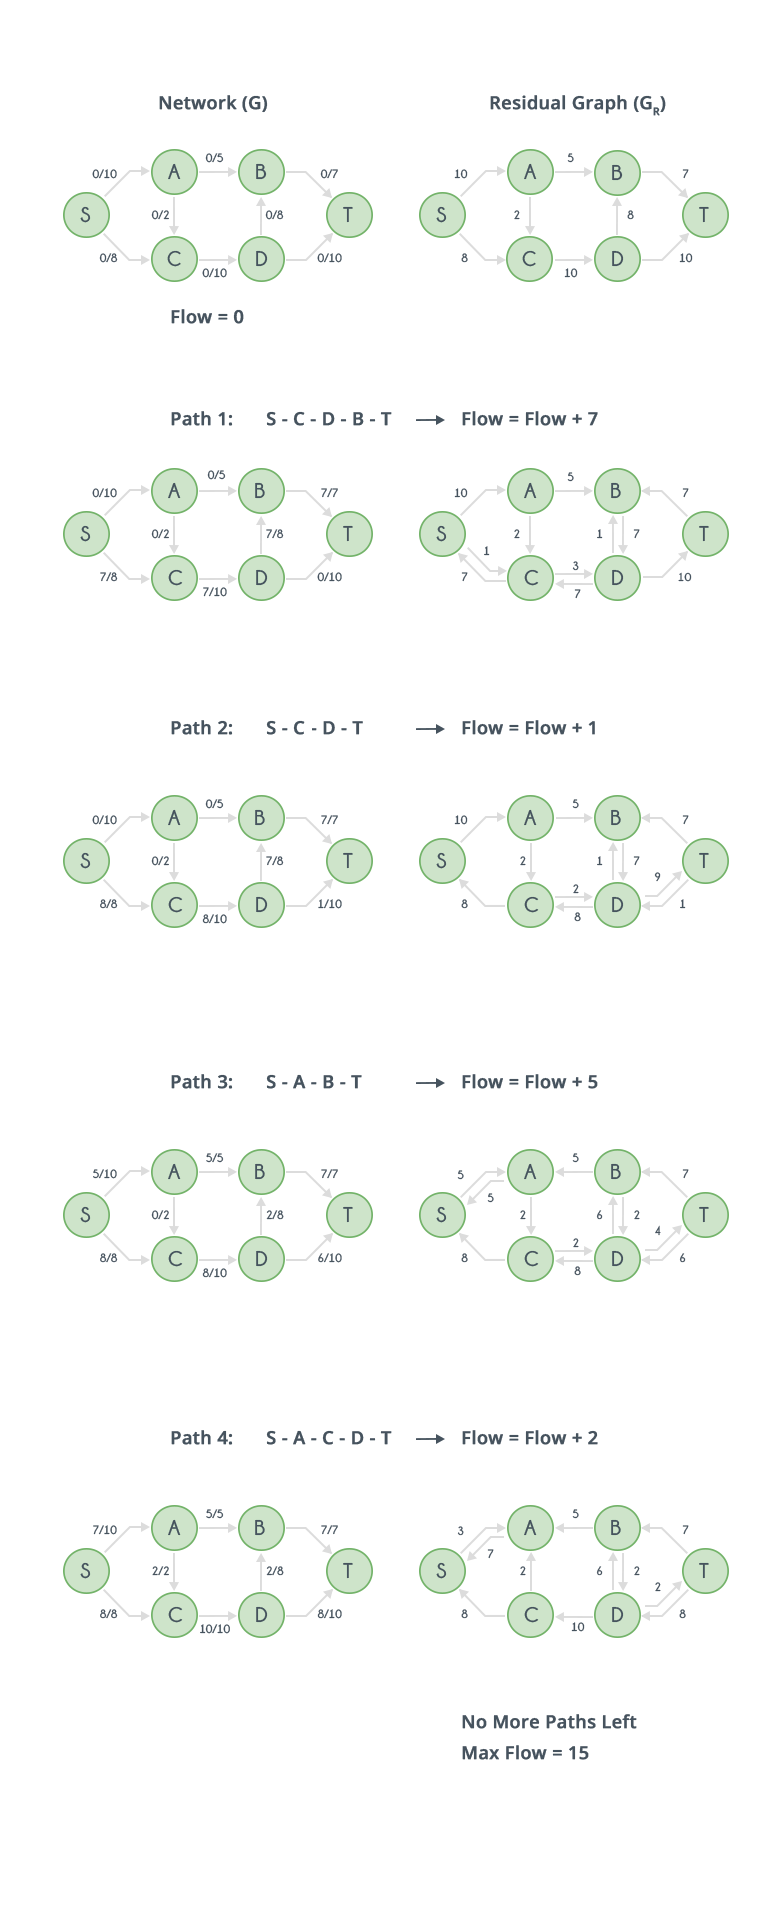

**Approach:**
1. Create an empty graph with N+1 nodes and initialize all capacities to 0.
2. Build the graph by adding capacities to the corresponding edges based on the input edges.
3. Initialize the maximum flow as 0 and create a parent array for tracking augmenting paths.
4. Use the Breadth-First Search (BFS) algorithm to find augmenting paths from the source (node 1) to the sink (node N).
   - Initialize a queue with the source node (1) and a visited array to track visited nodes.
   - Perform BFS to explore the graph and find a path from the source to the sink.
   - Update the parent array during BFS to keep track of the path.
   - If a path is found, return True; otherwise, return False.
5. While there is an augmenting path from the source to the sink:
   - Find the minimum capacity along the augmenting path.
   - Update the maximum flow by adding the minimum capacity.
   - Update the residual capacities of the edges along the augmenting path.
6. Return the maximum flow as the result.

In [129]:

# code is written based on 1 based idexing not
# here assuming source = 1
# assuming sink = N

def findMaxFlow(N, M, Edges): #N - no of nodes, M - no of edges
    # Create an empty graph with N+1 nodes and all capacities set to 0
    graph = [[0 for _ in range(N+1)] for  _ in range(N+1)]


    # Build the graph by adding capacities to the corresponding edges
    for edge in Edges:
        graph[edge[0]][edge[1]] += edge[2]
        graph[edge[1]][edge[0]] += edge[2]

    # Initialize the maximum flow as 0 and create a parent array for tracking augmenting paths
    max_flow = 0
    parent = [None] * (N + 1)

    # Continue finding augmenting paths until there is no path from source to sink
    while bfs(graph, N, parent):
        # Find the minimum capacity along the augmenting path
        v = N
        flow = float('inf')
        while v != 1:
            flow = min(flow, graph[parent[v]][v])
            v = parent[v]

        # Update the maximum flow with the minimum capacity found
        max_flow += flow

        # Update the residual capacities of the edges along the augmenting path
        v = N
        while v != 1:
            graph[parent[v]][v] -= flow
            graph[v][parent[v]] += flow
            v = parent[v]

    # Return the maximum flow
    return max_flow

def bfs(self, graph, N, parent):
    # Initialize a queue with the source node and a visited array to track visited nodes
    Q = [1]
    is_visited = [False] * (N+1)
    is_visited[1] = True

    # Perform BFS to find an augmenting path from source to sink
    while len(Q) != 0:
        u = Q.pop(0)

        # Traverse the neighbors of the current node
        for v in range(1, N+1):
            w = graph[u][v]
            if is_visited[v] == False and w > 0:
                # If the neighbor is not visited and there is residual capacity, update parent and mark it as visited
                parent[v] = u
                is_visited[v] = True
                Q.append(v)
                if v == N:
                    return True

    # If there is no augmenting path, return False
    return False


# Find maximum number of edge disjoint paths between two vertices

**Problem:**
Given a directed graph and two vertices in it, source ‘s’ and destination ‘t’, find out the maximum number of edge disjoint paths from s to t. Two paths are said edge disjoint if they don’t share any edge.

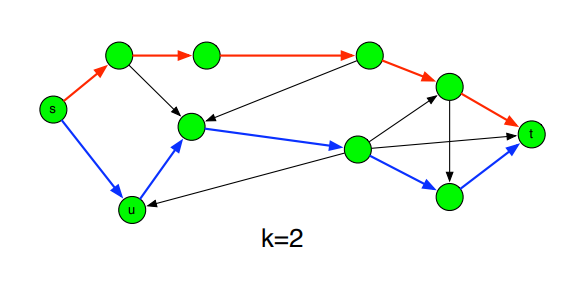

**Approach:**
1. Assign every edge weight as 1 
2. Apply the ford-fulkerson algorith and find the maximum flow 
3. maximum flow will be equal to edge disjoint paths as 
   - once we find the path, we are updating the weights of edges involved in path by decreasing them by 1 as they will become 0 and hence will behave like absent edge
4. return max_flow

In [130]:
#assuming weight of edge is 1 for every edge

def fordFulkerson(N, edges, source, target):
    graph = [[0 for _ in range(N)] for _ in range(N)]
    
    for edge in edges:
        n1, n2 = edge
        matrix[n1][n2] = 1
    
    parent = [None for _ in range(N)]
    paths_count = 0
    
    while bfs(source, target, visited, parent, graph):
        
        node = target
        while node != source :
            graph[parent[node]][node] -= 1
            node = parent[node]
        paths_count += 1

    return paths_count
    

def bfs(source, target, visited, parent, graph):
    
    queue = [source]
    parent[source] = source
    visited = [False for _ in range(N)]
    visited[source] = True
    
    while queue:
        
        curr = queue.pop(0)
        
        if not visited[curr]:
            visited[curr] = True
        
        for node in range(len(graph)):
            if matrix[curr][node] > 0 :
                if not visited[node]:
                    queue.append(node)
                    visited[node] = True
                    parent[node] = curr
                    if node == target:
                        return True
        return False

# Push Relabel Algorithm to find maximum flow 

**Differences with Ford Fulkerson**

1. Push-relabel algorithm works in a more localized. Rather than examining the entire residual network to find an augmenting path, push-relabel algorithms work on one vertex at a time.
2. In Ford-Fulkerson, net difference between total outflow and total inflow for every vertex (Except source and sink) is maintained 0. Push-Relabel algorithm allows inflow to exceed the outflow before reaching the final flow. In final flow, the net difference is 0 for all except source and sink.
3. Time complexity wise more efficient.

**Properties**
1. **Each vertex** has associated to it a **height variable** and a Excess Flow. Height is used to determine whether a vertex can push flow to an adjacent or not (A vertex can push flow only to a smaller height vertex). Excess flow is the difference of total flow coming into the vertex minus the total flow going out of the vertex.
    - Excess Flow of u = Total Inflow to u -  Total Outflow from u
2. Like Ford Fulkerson. each **edge has associated to it a flow** (which indicates current flow) and a **capacity**

**Algorithm**

1) Initialize PreFlow : Initialize Flows 
   and Heights 

2) While it is possible to perform a Push() or 
   Relabel() on a vertex
   // Or while there is a vertex that has excess flow
           Do Push() or Relabel()

// At this point all vertices have Excess Flow as 0 (Except source
// and sink)
3) Return flow.


**Algorithm**

1. Initialization:
    - Assign an initial preflow to the network, satisfying the capacity constraints and the flow conservation constraints, except for the source and sink nodes.
    - Set the height of the source node to the total number of nodes in the network (or the maximum height), and the height of all other nodes to 0.
    - Set the excess flow of the source node to infinity and 0 for all other nodes.
2. Push Operation:

    - Find an edge (u, v) in the residual graph, where u has excess flow (excess[u] > 0), and height[u] equals height[v] + 1.
    - Push the maximum possible flow (min(excess[u], residual_capacity(u, v))) from u to v.
    - Update the excess flow of nodes u and v accordingly.
3. Relabel Operation:

    - If no push operation is possible for a node u (i.e., no neighboring nodes have a height lower than height[u]), then relabel u.
    - Increase the height of node u to the minimum height of its neighbors + 1.
    - This ensures that there is a valid flow path from the source to the sink.
4. Termination:
    - Repeat steps 2 and 3 until no node has excess flow.
5. Result:
    - The excess flow at the sink node is the maximum flow in the network.




Three main operations in algorithm:
1. Initialize preflow():
   Preflow() 
        1) Initialize height and flow of every vertex as 0.
        2) Initialize height of source vertex equal to total 
           number of vertices in graph.
        3) Initialize flow of every edge as 0.
        4) For all vertices adjacent to source s, flow and  
           excess flow is equal to capacity initially.
2. Push() is used to make the flow from a node which has excess flow. If a vertex has excess flow and there is an adjacent with smaller height (in residual graph), we push the flow from the vertex to the adjacent with lower height. The amount of pushed flow through the pipe (edge) is equal to the minimum of excess flow and capacity of edge.

3. Relabel() operation is used when a vertex has excess flow and none of its adjacent is at lower height. We basically increase height of the vertex so that we can perform push(). To increase height, we pick the minimum height adjacent (in residual graph, i.e., an adjacent to whom we can add flow) and add 1 to it.


**Illustration:**
- We subtract the flow from capacity of edge from u to v. If capacity of an edge becomes 0, then the edge no longer exists in residual graph. 
- We add flow to the capacity of edge from v to u.



In [131]:
class Edge:
    def __init__(self, u, v, capacity):
        self.u = u
        self.v = v
        self.capacity = capacity
        self.flow = 0

class PushRelabel:
    def __init__(self, vertices):
        self.vertices = vertices
        self.graph = [[None] * vertices for _ in range(vertices)]

    def add_edge(self, u, v, capacity):
        # Create an edge from u to v with the given capacity
        edge = Edge(u, v, capacity)
        # Create a reverse edge from v to u with 0 capacity
        reverse_edge = Edge(v, u, 0)
        # Set the reverse_edge reference in the forward edge and vice versa
        edge.reverse_edge = reverse_edge
        reverse_edge.reverse_edge = edge
        # Add the edges to the graph adjacency matrix
        self.graph[u][v] = edge
        self.graph[v][u] = reverse_edge

    def push(self, u, v):
        # Compute the amount of flow that can be pushed from u to v
        delta = min(self.excess[u], self.graph[u][v].capacity - self.graph[u][v].flow)
        # Update the flow in the forward edge
        self.graph[u][v].flow += delta
        # Update the flow in the reverse edge (canceling the flow)
        self.graph[v][u].flow -= delta
        # Update the excess flow at u and v
        self.excess[u] -= delta
        self.excess[v] += delta

    def relabel(self, u):
        # Find the minimum height of neighboring nodes that can be reached from u
        min_height = float('inf')
        for v in range(self.vertices):
            if self.graph[u][v] and self.graph[u][v].capacity - self.graph[u][v].flow > 0:
                min_height = min(min_height, self.height[v])
        # Update the height of u
        self.height[u] = min_height + 1

    def discharge(self, u):
        while self.excess[u] > 0:
            if self.current[u] < self.vertices:
                v = self.current[u]
                if self.graph[u][v] and self.graph[u][v].capacity - self.graph[u][v].flow > 0 and self.height[u] > self.height[v]:
                    # Push flow from u to v
                    self.push(u, v)
                else:
                    # Try the next neighbor
                    self.current[u] += 1
            else:
                # Relabel u if no more neighbors to push flow to
                self.relabel(u)
                self.current[u] = 0

    def max_flow(self, source, sink):
        # Initialize height, excess flow, and current neighbors
        self.height = [0] * self.vertices
        self.excess = [0] * self.vertices
        self.excess[source] = float('inf')
        self.current = [0] * self.vertices

        # Set the height of the source to the maximum
        self.height[source] = self.vertices
        # Push flow from the source to its neighbors
        for v in range(self.vertices):
            if self.graph[source][v]:
                self.push(source, v)

        # Continue pushing and relabeling until there is excess flow at the sink
        while any(self.excess[u] > 0 for u in range(self.vertices)):
            u = self.excess.index(max(self.excess))
            if u != source and u != sink:
                # Discharge the excess flow at u
                self.discharge(u)

        # The value of excess flow at the sink is the maximum flow in the graph
        return self.excess[sink]

In [132]:
# Create a sample graph
edges = [(0, 1, 3), (0, 2, 5), (1, 2, 2), (1, 3, 3), (2, 3, 4)]
source = 0
sink = 3

# Determine the number of vertices in the graph
vertices = set()
for u, v, _ in edges:
    vertices.add(u)
    vertices.add(v)
num_vertices = len(vertices)

# Create an instance of the PushRelabel algorithm
pr = PushRelabel(num_vertices)

# Add edges to the graph
for u, v, capacity in edges:
    pr.add_edge(u, v, capacity)

# Compute the maximum flow
max_flow = pr.max_flow(source, sink)

# Print the maximum flow
print("Maximum Flow:", max_flow)

KeyboardInterrupt: 

# Dinic’s algorithm for Maximum Flow

In ford-Fulkerson algorithm, we use BFS to find an augmenting path and send flow across this path. In Dinic’s algorithm, we use BFS to check if more flow is possible and to construct level graph. In level graph, we assign levels to all nodes, level of a node is shortest distance (in terms of number of edges) of the node from source. Once level graph is constructed, we send multiple flows using this level graph. This is the reason it works better than Edmond Karp. In Edmond Karp, we send only flow that is send across the path found by BFS.

In [ ]:
from collections import deque

def addEdge(adj, u, v, C):
    # Forward edge: 0 flow and capacity C
    adj[u].append([v, 0, C, len(adj[v])])

    # Backward edge: 0 flow and capacity 0
    adj[v].append([u, 0, 0, len(adj[u])-1])

def BFS(adj, s, t, level):
    # Initialize level array to track the levels of vertices
    n = len(adj)
    for i in range(n):
        level[i] = -1

    # Assign level 0 to the source vertex
    level[s] = 0

    # Create a queue for Breadth First Search
    q = deque()
    q.append(s)

    # Perform Breadth First Search
    while q:
        u = q.popleft()

        # Explore all adjacent edges of vertex u
        for v, flow, capacity, _ in adj[u]:
            # If the vertex v is unvisited and there is available capacity
            if level[v] < 0 and flow < capacity:
                # Set the level of vertex v and enqueue it
                level[v] = level[u] + 1
                q.append(v)

    # If we can't reach the sink, return False; otherwise, return True
    return False if level[t] < 0 else True

def sendFlow(adj, u, flow, t, start, level):
    # If the current vertex is the sink, return the flow
    if u == t:
        return flow

    # Traverse all edges starting from u
    while start[u] < len(adj[u]):
        v, curr_flow, capacity, rev = adj[u][start[u]]

        # If the adjacent vertex v is the next level and there is available capacity
        if level[v] == level[u] + 1 and curr_flow < capacity:
            # Find the minimum of the remaining flow and available capacity
            min_flow = min(flow, capacity - curr_flow)

            # Recursively call sendFlow to push the flow from v to t
            temp_flow = sendFlow(adj, v, min_flow, t, start, level)

            # If a positive flow is found, update the flow values and return the flow
            if temp_flow and temp_flow > 0:
                adj[u][start[u]][1] += temp_flow
                adj[v][rev][1] -= temp_flow
                return temp_flow

        # Move to the next edge of vertex u
        start[u] += 1

    # If no more flow can be sent, return 0
    return 0

def DinicMaxflow(adj, s, t):
    # Get the total number of vertices in the graph
    n = len(adj)

    # If source and sink are the same, return -1
    if s == t:
        return -1

    # Initialize the total flow
    total = 0

    # Create a level array to store the levels of vertices during BFS
    level = [0] * n

    # Repeat the process until there is no augmenting path from source to sink
    while BFS(adj, s, t, level):
        # Create a start array to keep track of the explored edges of each vertex
        start = [0] * n

        # Continue sending flow from source to sink until no more flow can be sent
        while True:
            flow = sendFlow(adj, s, float('inf'), t, start, level)
            if not flow:
                break

            # Add the flow to the total flow
            total += flow

    # Return the maximum flow
    return total

# Create an empty adjacency list
n = 6
adj = [[] for _ in range(n)]

# Add edges to the adjacency list
addEdge(adj, 0, 1, 16)
addEdge(adj, 0, 2, 13)
addEdge(adj, 1, 2, 10)
addEdge(adj, 1, 3, 12)
addEdge(adj, 2, 1, 4)
addEdge(adj, 2, 4, 14)
addEdge(adj, 3, 2, 9)
addEdge(adj, 3, 5, 20)
addEdge(adj, 4, 3, 7)
addEdge(adj, 4, 5, 4)

# Find the maximum flow from vertex 0 to vertex 5
max_flow = DinicMaxflow(adj, 0, 5)

# Print the maximum flow
print("Maximum flow:", max_flow)


# Find minimum s-t cut in a flow network
**Problem** : Given a weighted graph of N vertices numbered from 0 to N-1 in the form of adjacency matrix A[ ][ ] and two integers S denoting the number of source vertex and T denoting the number of sink vertex. The task is to find minimum capacity s-t cut of the given network. An s-t cut is a cut that requires the source node ‘S’ and the sink node ‘T’ to be in different subsets, and it consists of edges going from the source’s side to the sink’s side. The capacity of an s-t cut is defined by the sum of the capacity of each edge in the cut-set. In other words, you have to find out all the edges which has to be removed to make it impossible to reach the sink node from source node, and the edges you select should have a minimum sum of weights. You have to return all the edges included in the minimum capacity s-t cut and if there are no edges in minimum capacity s-t cut, return "-1".

In [ ]:
from collections import deque

class Solution:
    def bfs(self, s, t, n, parent):
        # Initialize the parent array
        parent[:] = [-1] * n
        parent[s] = -2

        # Create a queue and enqueue the source vertex with maximum flow
        q = deque()
        q.append((s, 2 ** 31))

        while q:
            v, flow = q.popleft()

            # Explore all neighbors of the current vertex
            for w in range(n):
                # If the neighbor is already visited or the capacity is 0, skip it
                if parent[w] != -1 or self.capacity[v][w] == 0:
                    continue

                # Set the parent of the neighbor and update the new flow
                parent[w] = v
                nf = min(flow, self.capacity[v][w])

                # If the neighbor is the target vertex, return the new flow
                if w == t:
                    return nf

                # Enqueue the neighbor with the updated flow
                q.append((w, nf))

        # If no augmenting path is found, return 0
        return 0

    def minimumCut(self, A, S, T, N):
        # Create a 2D matrix to store the capacities
        self.capacity = [[e for e in a] for a in A]

        # Initialize the flow, parent array, and the new flow
        flow = 0
        parent = [-1] * N
        new_flow = self.bfs(S, T, N, parent)

        # While there is an augmenting path, update the flow and capacities
        while new_flow > 0:
            flow += new_flow
            curr = T

            # Backtrack from the target to the source and update the capacities
            while curr != S:
                prev = parent[curr]
                self.capacity[prev][curr] -= new_flow
                self.capacity[curr][prev] += new_flow
                curr = prev

            # Find a new augmenting path
            new_flow = self.bfs(S, T, N, parent)

        # Find the sources of the minimum cut
        sources = set()
        marked = [0] * N
        marked[S] = 1
        q = deque()
        q.append(S)

        # Perform BFS to find all vertices reachable from the source
        while q:
            v = q.popleft()
            sources.add(v)

            # Explore the neighbors of the current vertex
            for w in range(N):
                # If the neighbor is not marked and has a positive capacity, enqueue it
                if marked[w] == 0 and self.capacity[v][w] > 0:
                    q.append(w)
                    marked[w] = 1

        ans = []
        # Iterate over the sources and find the edges going outside the sources
        for v in sources:
            for w in range(N):
                if w not in sources and A[v][w] > 0:
                    ans.append(v)
                    ans.append(w)

        # Return the minimum cut edges if found, otherwise return [-1]
        return ans if ans else [-1]


# Maximum Bipartite matching 
**Problem** :
There are M job applicants and N jobs.  Each applicant has a subset of jobs that he/she is interested in. Each job opening can only accept one applicant and a job applicant can be appointed for only one job. Given a matrix G with M rows and N columns where G(i,j) denotes ith applicant is interested in the jth job. Find the maximum number of applicants who can get the job.
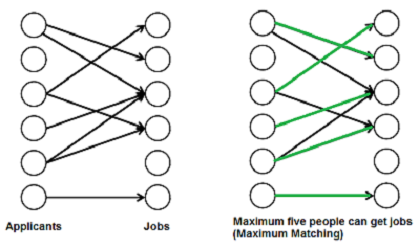

In [ ]:
def maximumMatch(G):
    # Number of applicants (rows) in the bipartite graph
    applicants = len(G)
    # Number of jobs (columns) in the bipartite graph
    jobs = len(G[0])
    # Variable to store the count of maximum matches
    res = 0
    # Array to store the matchings, initialized with -1 indicating no matches initially
    match = [-1]*jobs  

    # Iterate over each applicant
    for i in range(applicants):
        # Array to track visited status of jobs during DFS traversal
        seen = [False]*(jobs)

        # Check if a matching can be found for the current applicant by calling the DFS function
        if dfs(G, seen, match, i, applicants, jobs):
            # If a matching is found, increment the count of maximum matches
            res += 1

    # Return the count of maximum matches
    return res

def dfs(g, seen, match, u, applicants, jobs):
    # Iterate over each job connected to the current applicant
    for v in range(jobs):
        # Check if there is an edge between the current applicant u and the job v,
        # and if the job v has not been visited before during this DFS traversal
        if g[u][v] == 1 and seen[v] == False:
            # Mark the job v as visited
            seen[v] = True

            # Check if the job v is unmatched or if there exists an augmenting path
            # from the current matching (match[v]) to another applicant
            if match[v] == -1 or dfs(g, seen, match, match[v], applicants, jobs):
                # If an augmenting path is found, update the match array to match
                # the job v with the current applicant u
                match[v] = u
                # Return True to indicate that a matching has been found
                return True

    # If no matching or augmenting path is found for the current applicant u,
    # return False
    return False


# Channel Assignment Problem 

**Problem**
There are M transmitter and N receiver stations. Given a matrix that keeps track of the number of packets to be transmitted from a given transmitter to a receiver. If the (i; j)-th entry of the matrix is k, it means at that time the station i has k packets for transmission to station j. 
During a time slot, a transmitter can send only one packet and a receiver can receive only one packet. Find the channel assignments so that maximum number of packets are transferred from transmitters to receivers during the next time slot. 

In [ ]:
def bpm(table, u, seen, matchR):
    # Perform a depth-first search (DFS) to find a matching for sender 'u'
    for v in range(N):
        # Check if there is a packet to be sent from sender 'u' to receiver 'v'
        # and receiver 'v' has not been visited yet
        if table[u][v] > 0 and not seen[v]:
            seen[v] = True  # Mark receiver 'v' as visited

            # If receiver 'v' is not currently assigned to any sender ('matchR[v] < 0')
            # or if there exists an alternate sender for receiver 'v' (recursive call to bpm),
            # assign sender 'u' to receiver 'v'
            if matchR[v] < 0 or bpm(table, matchR[v], seen, matchR):
                matchR[v] = u
                return True  # Matching found for receiver 'v'

    return False  # No matching found for sender 'u'


def maxBPM(table):
    matchR = [-1] * N  # Initialize the matching array where -1 indicates no assignment
    result = 0  # Counter for the number of receivers assigned to senders

    # Iterate over each sender and try to find a matching
    for u in range(M):
        seen = [False] * N  # Array to keep track of visited receivers in each DFS

        # Call bpm function to find a matching for sender 'u'
        if bpm(table, u, seen, matchR):
            result += 1  # Increment the counter if a matching is found for sender 'u'

    return result  # Return the maximum number of packets that can be sent in the time slot


# Karger's Algorithm
Karger's algorithm is a randomized algorithm for finding the minimum cut in an undirected graph. The minimum cut of a graph is the set of edges that, if removed, divides the graph into two separate components. Karger's algorithm is based on the concept of edge contractions, where two vertices are merged by collapsing their edges into a single edge. By repeatedly contracting edges until only two vertices remain, the algorithm approximates the minimum cut of the original graph.

Here is the high-level approach of Karger's algorithm:

1. Start with an undirected graph G.
2. Repeat the following steps until there are only two vertices left:
    - Randomly choose an edge (u, v) from the graph.
    - Merge the vertices u and v by contracting the edge (u, v).
    - Remove self-loops resulting from the contraction.
3. Return the set of edges that remain in the graph as the approximate minimum cut.

Karger's algorithm is a Monte Carlo algorithm, meaning that it has a small probability of returning an incorrect result. However, by repeating the algorithm a sufficient number of times, the probability of obtaining the correct minimum cut approaches certainty.

The algorithm is efficient, with a time complexity of approximately O(V^2 * E), where V is the number of vertices and E is the number of edges in the graph. This makes it particularly suitable for large graphs.

It's worth noting that Karger's algorithm is a heuristic, and it **may not always find the exact minimum cut**. However, it provides a good approximation in practice and has been widely used in various applications, including network analysis and clustering.
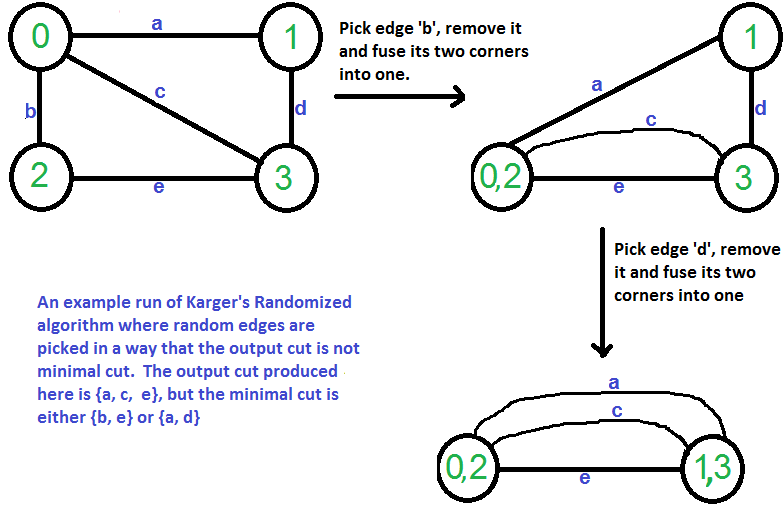
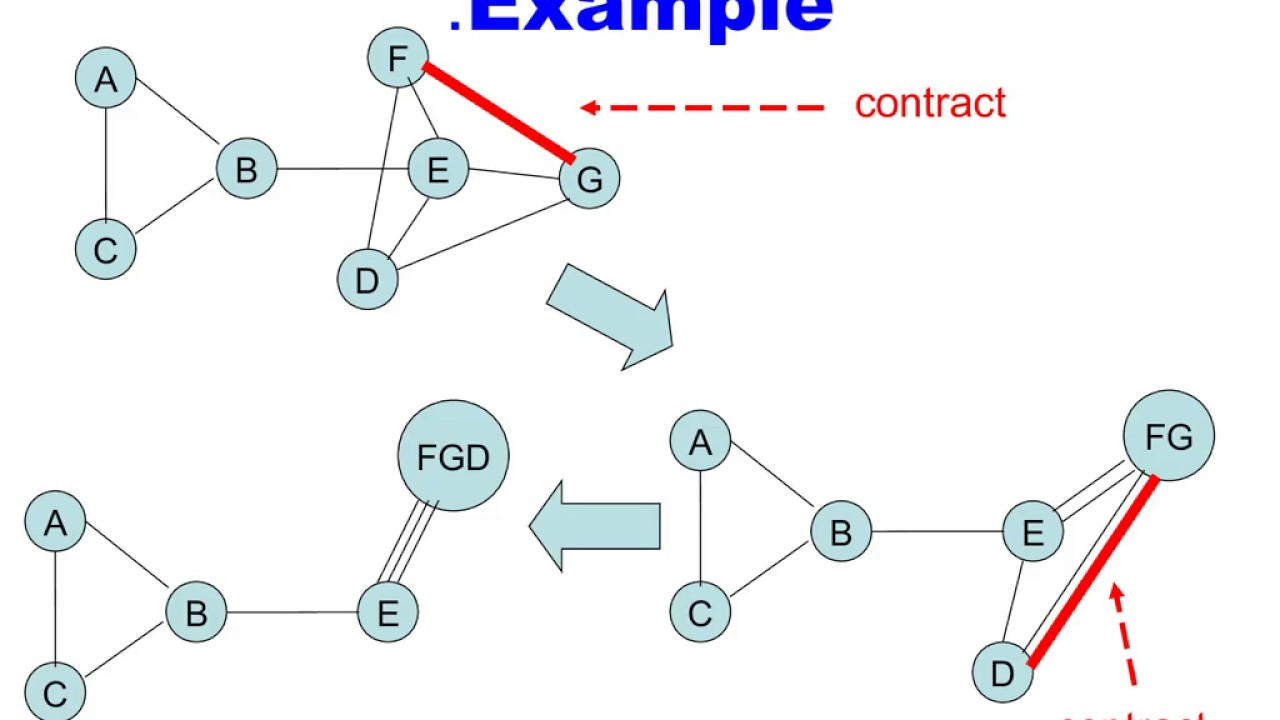



In [ ]:
import random
import math

def contract(graph, u, v):
    # Merge vertices u and v by contracting the edges
    # Remove self-loops resulting from the contraction
    for node in range(len(graph)):
        if node != u:
            graph[u][node] += graph[v][node]
            graph[node][u] += graph[node][v]
    for i in range(len(graph)):
        graph[i].pop(v)
    graph.pop(v)

def kargers_algorithm(graph, source, target):
    # Keep track of the minimum cut found so far
    min_cut = float('inf')

    # Repeat the algorithm |V|^2 * log|V| times
    n = len(graph)
    num_iterations = n**2 * int(math.log(n))
    for _ in range(num_iterations):
        # Create a copy of the graph
        current_graph = [row[:] for row in graph]

        # Contract edges until only two vertices remain
        while len(current_graph) > 2:
            # Randomly choose an edge (u, v)
            u = random.randint(0, len(current_graph) - 1)
            v = random.choice(current_graph[u])

            # Contract the edge (u, v)
            contract(current_graph, u, v)

        # Count the number of crossing edges (cuts)
        crossing_edges = sum(current_graph[source])

        # Update the minimum cut if necessary
        min_cut = min(min_cut, crossing_edges)

    return min_cut

# Example usage:
graph = [
    [0, 1, 0, 1],
    [1, 0, 1, 1],
    [0, 1, 0, 1],
    [1, 1, 1, 0]
]
source = 0
target = 3

min_cut = kargers_algorithm(graph, source, target)
print("Minimum cut from node", source, "to node", target, ":", min_cut)

# A Peterson Graph Problem

The Petersen graph is an undirected graph in the study of graph theory that has 10 vertices and 15 edges. It is a short graph that may be used as both a counterexample and an example for a variety of graph theory issues.
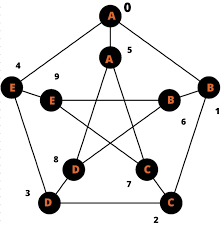

**Problem :**
Consider the graph given above as G. The graph given is the Peterson graph. The vertex numbers range from 1 to 10. Letters will be present on each vertex. Let's take a look at one walk W in the graph with L vertices. When the letter sequences in W and S are the same, the walk W realizes a string S with L letters. The vertices are accessible many times. For instance, the walk method reveals that one string S is similar to "ABBECCD" (0, 1, 6, 9, 7, 2, 3). Finding such a walk is our task, followed by finding the lexicographically least such walk if it already exists. Return -1 if there is no suck walk. 

Suppose if we take S= ”ABB”, then the output will b 016. Because we can clearly see in the graph that the path from ABB is 016.

# K Centers Problem

**Problem:**
You have given N cities numbered from 0 to N-1. The distance between each pair of cities is given by N * N matrix MAT where MAT[i][j] denotes the distance between city i and j.
The task is to select K (K<= N) ATM servers  in such a way that the maximum distance of a city from the ATM Server is minimized.
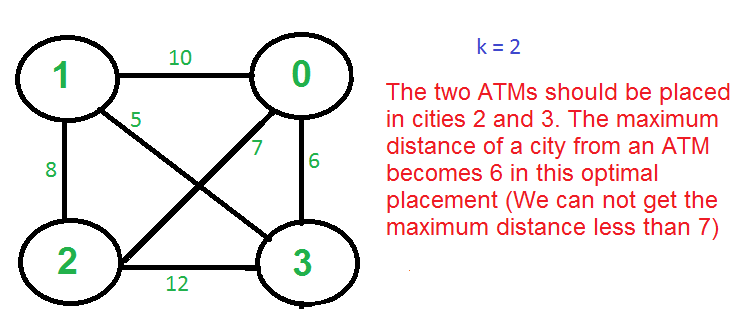
**Input:**
N = 4
K = 2
matrix = [[0, 10, 7, 6],
           [10, 0, 8, 5],
           [7, 8, 0, 12],
           [6, 5, 12, 0]]
           
**Approach:**
1. Let the first arbitrarily picked vertex be 0. 
2. The next vertex is 1 because 1 is the farthest vertex from 0. 
3. Remaining cities are 2 and 3. Calculate their distances from already selected centers (0 and 1). The greedy algorithm basically calculates the following values. 
    - Minimum of all distanced from 2 to already considered centers 
    - Min[dist(2, 0), dist(2, 1)] = Min[7, 8] = 7 
    - Minimum of all distanced from 3 to already considered centers 
    - Min[dist(3, 0), dist(3, 1)] = Min[6, 5] = 5 
4. After computing the above values, city 2 is picked as the value corresponding to 2 is maximum. 

In [ ]:
class Solution:
    def selectKcities(self, n: int, k: int, mat):
        # code here
        
        # Check if there are only 1 or 2 cities and k >= n
        if n <= 2 and k >= n:
            return 0
        
        # Check if there are exactly 2 cities and k = 1
        if n == 2 and k == 1:
            return max(max(mat))
    
        ans = 999999
        for i in range(n):
            # Call the helper function to find the minimum distance
            min_dis = self.selectKcities1(n, k, mat, i)
            
            # Update the minimum distance if necessary
            ans = min(ans, min_dis)
        
        # Check if no solution is found
        if ans == 999999:
            return -1
        
        return ans
    
    
    def selectKcities1(self, n, k, mat, node):
        # Helper function to find the minimum distance
        
        first_nod = [99999999, None]
        
        # Find the farthest node from each city
        for i in range(n):
            atms = [i]
            x, y = self.farthnode(atms, mat)
            
            # Update the farthest node if necessary
            if y < first_nod[0]:
                first_nod = [y, i]
            
        # If k = 1, return the distance to the farthest node
        if k == 1:
            return first_nod[0]
            
        atms = [node]
        
        # Select k-1 more cities
        for i in range(k-1):
            x, y = self.farthnode(atms, mat)
            atms += [x]
            
        # Find the distance to the farthest node among the selected cities
        x, y = self.farthnode(atms, mat)
        
        # If the distance is negative, return 0
        if y < 0:
            return 0
        
        return y
    
    def farthnode(self, atms, mat):
        # Helper function to find the farthest node from a set of cities
        
        set1 = set(atms)
        
        dist = [-99999 for _ in range(len(mat))]
        
        # Calculate the minimum distance from each city to the selected cities
        for pt in range(len(mat)):
            if pt not in set1:
                min1 = 9999999
                for item in set1:
                    min1 = min(min1, mat[item][pt])
                
                dist[pt] = min1
        
        max_nod = 0
        # Find the farthest node among the remaining cities
        for i in range(len(dist)):
            if dist[max_nod] < dist[i]:
                max_nod = i
        
        return max_nod, dist[max_nod]


In [ ]:
from collections import defaultdict

# Function to calculate the distance from the root to all nodes using DFS
def dfs(node, parent, distance, weights, graph):
    distance[node] = distance[parent] + weights[node]
    for neighbor in graph[node]:
        if neighbor != parent:
            dfs(neighbor, node, distance, weights, graph)

# Function to find the lowest common ancestor (LCA) of two nodes using DFS
def find_lca(node, parent, u, v, graph):
    if node == u or node == v:
        return node
    found_nodes = 0
    lca = None
    for neighbor in graph[node]:
        if neighbor != parent:
            child_lca = find_lca(neighbor, node, u, v, graph)
            if child_lca is not None:
                found_nodes += 1
                lca = child_lca
            if found_nodes == 2:
                return node
    return lca

# Function to calculate the minimum operations for a query
def calculate_operations(u, v, lca, weights):
    operations = 0
    for node in [u, v]:
        while node != lca:
            operations += abs(weights[node] - weights[lca])
            node = lca
    return operations

# Main function to solve the problem
def minimize_operations(N, edges, Q, queries):
    graph = defaultdict(list)
    weights = {}

    for u, v, w in edges:
        graph[u].append(v)
        graph[v].append(u)
        weights[v] = weights[u] = w

    distance = [0] * (N + 1)
    dfs(1, 0, distance, weights, graph)

    results = []
    for u, v in queries:
        lca = find_lca(1, 0, u, v, graph)
        operations = calculate_operations(u, v, lca, weights)
        results.append(operations)

    return results

# Example usage
N = 3
edges = [[1, 2, 3], [1, 3, 2]]
Q = 1
queries = [[2, 3]]

results = minimize_operations(N, edges, Q, queries)
for result in results:
    print(result)


In [ ]:
def calculate_max_refund(N, shoe_prices):
    max_refund = 0
    current_cost = 0

    # Iterate through each bit position from 0 to 29
    for bit in range(30):
        num_set = num_not_set = 0

        for price in shoe_prices:
            if price & (1 << bit):
                num_set += 1
            else:
                num_not_set += 1

        refund = 0

        if num_set >= num_not_set:
            refund = (1 << bit) * num_not_set
        else:
            for price in shoe_prices:
                if price & (1 << bit):
                    refund += price * price

        max_refund += refund

    # Return the maximum refund modulo 10
    return max_refund % 10

# Input
N = 5
shoe_prices = [3, 6, 5, 7, 3]

# Calculate the maximum refund
result = calculate_max_refund(N, shoe_prices)

# Output
print(result)


In [ ]:
def is_special(subarray):
    min_element = min(subarray)
    max_element = max(subarray)
    length = len(subarray)
    return (min_element * max_element) % length == 0

def count_special_subarrays(Arr):
    count = 0
    N = len(Arr)

    for start in range(N):
        for end in range(start + 1, N + 1):
            subarray = Arr[start:end]
            if is_special(subarray):
                count += 1

    return count

# Example usage:
Arr = [0, 1, 3]
result = count_special_subarrays(Arr)
print(result)  # Output: 5


In [ ]:
you are given an array of szie n and a value k, you can create an infinite size array which can contain multiples of elements of array, and later you ahev to find the kth smallest number from that infinite array.
ex: given array = [1, 2, 3] and k = 3
    your array = [1, 2, 3, 2, 4, 6, 3, 6, 9]
    
    answer output = 2


import heapq
def solver(arr, n, k):
    
    for i in range(k):
        
        arr += [arr[j]*(i+2) for j in range(n)]
        
        
    heapq.heapify(arr)
    
    for x in range(k):
        
        ans = heapq.heppop(arr)
        
    return ans
    
if __name__ == "__main__":
    
    n = int(input())
    k = int(input())
    
    arr = list(map(input().split()))
    ans = solver(arr, n, k)
    print(ans)

In [ ]:
import heapq

def kthSmallest(arr, k):
    heap = []  # Min-heap to store elements
    seen = set()  # Set to keep track of unique elements
    heapq.heappush(heap, 1)  # Start with the smallest element in the array
    seen.add(1)

    while True:
        current = heapq.heappop(heap)  # Get the smallest element
        k -= 1  # Decrement k
        if k == 0:
            return current  # Return the kth smallest element

        # Generate new elements by multiplying the current element with elements from the array
        for num in arr:
            next_num = current * num
            if next_num not in seen:
                heapq.heappush(heap, next_num)  # Add to the heap
                seen.add(next_num)  # Add to the set

if __name__ == "__main":
    n = int(input())
    k = int(input())
    arr = list(map(int, input().split()))
    ans = kthSmallest(arr, k)
    print(ans)

In [ ]:
def find_max_elements(matrix, k):
    n = len(matrix)
    max_elements = []

    for i in range(n - k + 1):
        for j in range(n - k + 1):
            max_element = -float('inf')  # Initialize to negative infinity

            for x in range(i, i + k):
                for y in range(j, j + k):
                    max_element = max(max_element, matrix[x][y])

            max_elements.append(max_element)

    return max_elements

# Function to find P, count elements >= P, max element > P, and min element < P
def find_values(matrix, k):
    max_elements = find_max_elements(matrix, k)
    P = max(max_elements)
    count_greater_equal_P = sum(1 for element in max_elements if element >= P)
    max_greater_P = max(element for element in max_elements if element > P)
    min_less_P = min(element for element in max_elements if element < P)
    
    return P, count_greater_equal_P, max_greater_P, min_less_P



if __name__ == "__main":
    n = int(input())
    k = int(input())
    
    for i in range(n):
        matrix += [list(map(int, input().split()))]
    ans = [find_values(matrix, k)]
    print(ans)


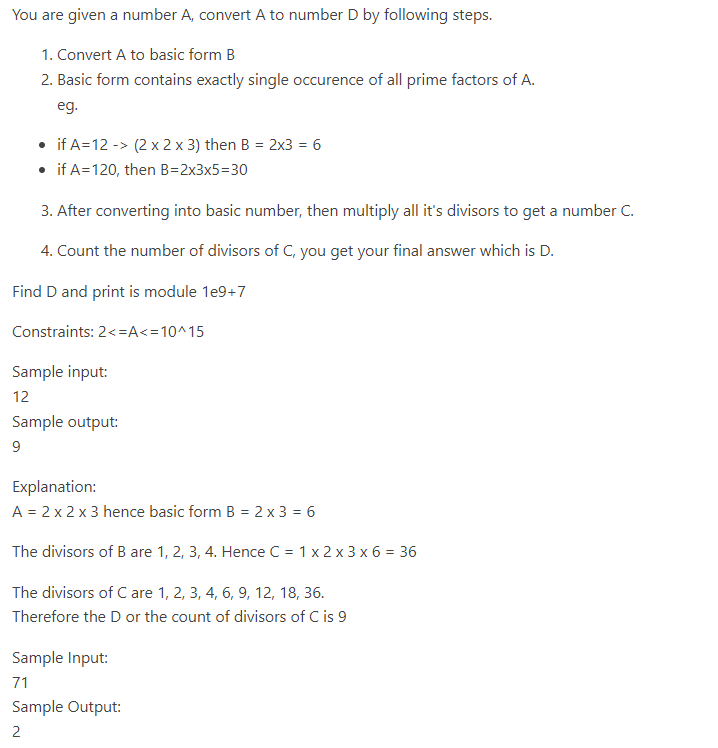

In [271]:
def factors(num):
    i = 2
    num1  = num
    set1 = set()
    max1 = None
    while num > 0 and i <= num1:
        
        while num%i == 0 :
            num = num//i
            if i not in set1:
                set1.add(i)
            max1 = i
        
        i += 1
    
    B = 1
    for item in set1:
        B = B*item
    print(set1)
    divisors(B, set1, max1)
    
    max1 = B
    C = 1
    for item in set1:
        C = C*item
    print(set1)
    divisors(C, set1, max1)
    print(set1)
    return len(set1) + 1
    
def divisors(num, set1, x):
    
    for i in range(x+1, num+1):
        if num%i == 0 :
            set1.add(i)
        

In [272]:
factors(6)

{2, 3}
{2, 3, 6}
{2, 3, 36, 6, 9, 12, 18}


8

In [273]:
def factors_op(num):
    # calculating B as the multiplication of all unique factors of a 
    i = 2
    set1 = set()
    num1 = num
    
    while num > 0 and i <= num1:
        
        while num%i == 0 :
            num = num//i
            if i not in set1:
                set1.add(i)

        i += 1
    k = len(set1)
    
    ans = ((2**(k-1)) + 1)**k
    
    return ans

In [274]:
factors_op(555)

125

# --------------Solved By - Suraj------------------